In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import my_utils.gainratio as gr # my own realization of gain ratio
import my_utils.statistics as stat # some functions to get info about pd.DataFrame

In [79]:
PATH_ROW_DATA = 'row/ID_data_mass_18122012.xlsx'
data_frame = pd.read_excel(PATH_ROW_DATA, sheet_name='VU')
data_frame

C:\Users\AMats\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Unnamed: 0           Unnamed: 1         Unnamed: 2 Unnamed: 3  \
0          NaN                  NaN  Глубина манометра        Dшт   
1            №           дд.мм.гггг                  м         мм   
2          804  2008-06-05 00:00:00             3576.3       7.94   
3          804  2008-06-06 00:00:00             3576.3       9.53   
4          804  2008-06-07 00:00:00             3576.3      11.11   
..         ...                  ...                ...        ...   
182      22505  2009-09-23 00:00:00               3678       12.7   
183      22505  2009-09-27 00:00:00               3678      14.29   
184      22505  2010-04-09 00:00:00             3679.5       7.94   
185      22505  2010-04-14 00:00:00             3679.5       9.53   
186      22505  2010-04-17 00:00:00             3679.5      11.11   

    осредненные параметры Unnamed: 5 Unnamed: 6 На конец режима Unnamed: 8  \
0                    Руст       Рзаб       Pлин            Руст       Рзаб   
1                    бара       бара       бара             бар        бар   
2                   249.6      370.1      101.8             249      359.6   
3                   233.5      364.6      101.3             231      338.1   
4                   213.4      357.1      101.6             211      314.8   
..                    ...        ...        ...             ...        ...   
182                 182.2    271.586  93.255111             179      258.6   
183                   157    249.076  96.472143             153      233.5   
184                 211.9   289.3877  91.131226             208      289.6   
185                   204   282.8709  91.173008             201      275.3   
186                 187.5   267.4787  91.530262             184        255   

     Unnamed: 9  ...           Unnamed: 24 Unnamed: 25 Unnamed: 26  \
0          Рлин  ...  Рпл. Тек (Карноухов)         Pсб         Pсб   
1           бар  ...                   МПа         атм         бар   
2         101.8  ...                     -        93.6   92.376018   
3         102.4  ...                     -        92.9   91.685171   
4         100.6  ...                     -        91.4   90.204787   
..          ...  ...                   ...         ...         ...   
182   92.702141  ...                  60.8        89.7   88.527017   
183  100.060417  ...                  60.8        87.3   86.158401   
184   91.304642  ...                  61.3        88.2   87.046632   
185   91.616821  ...                  61.3        88.5   87.342709   
186   89.507935  ...                  61.3        89.8   88.625709   

    Unnamed: 27 Unnamed: 28 Unnamed: 29               Unnamed: 30 Unnamed: 31  \
0          Ro_g        Ro_c        Ro_w  Удельная плотность газа      G_total   
1         кг/м3       кг/м3       кг/м3                       б/р        кг/с   
2      0.806017         801        1000                  0.669449    2.782623   
3      0.806017         801        1000                  0.669449    3.697781   
4      0.806017         801        1000                  0.669449    4.515073   
..          ...         ...         ...                       ...         ...   
182         NaN         NaN         NaN                       NaN         NaN   
183         NaN         NaN         NaN                       NaN         NaN   
184         NaN         NaN         NaN                       NaN         NaN   
185         NaN         NaN         NaN                       NaN         NaN   
186         NaN         NaN         NaN                       NaN         NaN   

    Unnamed: 32 Unnamed: 33  
0           КГФ         КГФ  
1          г/м3    т/тыс.м3  
2      311.9094         NaN  
3      288.6003         NaN  
4      248.7906         NaN  
..          ...         ...  
182         NaN         NaN  
183         NaN         NaN  
184         NaN         NaN  
185         NaN         NaN  
186         NaN         NaN  

[187 rows x 34 columns]

In [80]:
data_frame.index

RangeIndex(start=0, stop=187, step=1)

In [81]:
data_frame.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'осредненные параметры', 'Unnamed: 5', 'Unnamed: 6', 'На конец режима',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Стандартные условия', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Линейные условия', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33'],
      dtype='object')

<ul>
    <li> У столбцов неправильные названия </li>
    <li> Строки, которые не являются данными находятся в датасете </li>
</ul>


Исправим это:

In [82]:
new_df = data_frame.copy(deep=True)
new_columns = list(new_df.loc[0])
new_columns_measures = list(new_df.loc[1])
for i in range(len(new_columns)):
    new_columns[i] = ''.join([str(new_columns[i]), ' ', str(new_columns_measures[i]), ' ', str(i)])
    new_columns[i] = str(new_columns[i]).replace(' ', '_')
    new_columns[i] = new_columns[i].replace('.', '')
new_df.columns = new_columns
new_df = new_df.drop(labels=[0, 1], axis=0)
new_df = new_df.drop(new_df.columns[[0, 1]], axis=1)
new_df = new_df.reset_index(drop=True)
new_df

Глубина_манометра_м_2 Dшт_мм_3 Руст_бара_4 Рзаб_бара_5 Pлин_бара_6  \
0                  3576.3     7.94       249.6       370.1       101.8   
1                  3576.3     9.53       233.5       364.6       101.3   
2                  3576.3    11.11       213.4       357.1       101.6   
3                  3576.3     12.7       191.6       347.4        98.4   
4                  3576.3    14.29       171.9       337.7        99.2   
..                    ...      ...         ...         ...         ...   
180                  3678     12.7       182.2     271.586   93.255111   
181                  3678    14.29         157     249.076   96.472143   
182                3679.5     7.94       211.9    289.3877   91.131226   
183                3679.5     9.53         204    282.8709   91.173008   
184                3679.5    11.11       187.5    267.4787   91.530262   

    Руст_бар_7 Рзаб_бар_8  Рлин_бар_9 Туст__С_10 Тна_шлейфе__С_11  ...  \
0          249      359.6       101.8         53             31.7  ...   
1          231      338.1       102.4       58.8             37.6  ...   
2          211      314.8       100.6       63.6             42.8  ...   
3          187      291.5          99       64.7             46.2  ...   
4          169      270.3        99.5         64             49.4  ...   
..         ...        ...         ...        ...              ...  ...   
180        179      258.6   92.702141       55.6             41.8  ...   
181        153      233.5  100.060417       56.7             47.6  ...   
182        208      289.6   91.304642         47             24.4  ...   
183        201      275.3   91.616821       48.9             26.7  ...   
184        184        255   89.507935       53.5             33.3  ...   

    Рпл_Тек_(Карноухов)_МПа_24 Pсб__атм_25 Pсб__бар_26 Ro_g_кг/м3_27  \
0                            -        93.6   92.376018      0.806017   
1                            -        92.9   91.685171      0.806017   
2                            -        91.4   90.204787      0.806017   
3                            -        89.2   88.033555      0.806017   
4                            -        89.7   88.527017      0.806017   
..                         ...         ...         ...           ...   
180                       60.8        89.7   88.527017           NaN   
181                       60.8        87.3   86.158401           NaN   
182                       61.3        88.2   87.046632           NaN   
183                       61.3        88.5   87.342709           NaN   
184                       61.3        89.8   88.625709           NaN   

    Ro_c_кг/м3_28 Ro_w_кг/м3_29 Удельная_плотность_газа__б/р_30  \
0             801          1000                        0.669449   
1             801          1000                        0.669449   
2             801          1000                        0.669449   
3             801          1000                        0.669449   
4             801          1000                        0.669449   
..            ...           ...                             ...   
180           NaN           NaN                             NaN   
181           NaN           NaN                             NaN   
182           NaN           NaN                             NaN   
183           NaN           NaN                             NaN   
184           NaN           NaN                             NaN   

    G_total_кг/с_31 КГФ_г/м3_32 КГФ_т/тысм3_33  
0          2.782623    311.9094            NaN  
1          3.697781    288.6003            NaN  
2          4.515073    248.7906            NaN  
3          5.217673    223.5591            NaN  
4          5.765092    215.1486            NaN  
..              ...         ...            ...  
180             NaN         NaN            NaN  
181             NaN         NaN            NaN  
182             NaN         NaN            NaN  
183             NaN         NaN            NaN  
184             N

Конвертируем значения в числовые

In [83]:
series_list = []
for label, content in new_df.items():
    series_list.append(pd.to_numeric(content, errors='coerce'))
for i in range(len(new_df.columns)):
    series_list[i].name = new_df.columns[i]
new_df = pd.concat(series_list, axis=1, join='inner')
new_df

Глубина_манометра_м_2  Dшт_мм_3  Руст_бара_4  Рзаб_бара_5  Pлин_бара_6  \
0                   3576.3      7.94        249.6     370.1000   101.800000   
1                   3576.3      9.53        233.5     364.6000   101.300000   
2                   3576.3     11.11        213.4     357.1000   101.600000   
3                   3576.3     12.70        191.6     347.4000    98.400000   
4                   3576.3     14.29        171.9     337.7000    99.200000   
..                     ...       ...          ...          ...          ...   
180                 3678.0     12.70        182.2     271.5860    93.255111   
181                 3678.0     14.29        157.0     249.0760    96.472143   
182                 3679.5      7.94        211.9     289.3877    91.131226   
183                 3679.5      9.53        204.0     282.8709    91.173008   
184                 3679.5     11.11        187.5     267.4787    91.530262   

     Руст_бар_7  Рзаб_бар_8  Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  ...  \
0         249.0       359.6  101.800000        53.0              31.7  ...   
1         231.0       338.1  102.400000        58.8              37.6  ...   
2         211.0       314.8  100.600000        63.6              42.8  ...   
3         187.0       291.5   99.000000        64.7              46.2  ...   
4         169.0       270.3   99.500000        64.0              49.4  ...   
..          ...         ...         ...         ...               ...  ...   
180       179.0       258.6   92.702141        55.6              41.8  ...   
181       153.0       233.5  100.060417        56.7              47.6  ...   
182       208.0       289.6   91.304642        47.0              24.4  ...   
183       201.0       275.3   91.616821        48.9              26.7  ...   
184       184.0       255.0   89.507935        53.5              33.3  ...   

     Рпл_Тек_(Карноухов)_МПа_24  Pсб__атм_25  Pсб__бар_26  Ro_g_кг/м3_27  \
0                           NaN         93.6    92.376018       0.806017   
1                           NaN         92.9    91.685171       0.806017   
2                           NaN         91.4    90.204787       0.806017   
3                           NaN         89.2    88.033555       0.806017   
4                           NaN         89.7    88.527017       0.806017   
..                          ...          ...          ...            ...   
180                        60.8         89.7    88.527017            NaN   
181                        60.8         87.3    86.158401            NaN   
182                        61.3         88.2    87.046632            NaN   
183                        61.3         88.5    87.342709            NaN   
184                        61.3         89.8    88.625709            NaN   

     Ro_c_кг/м3_28  Ro_w_кг/м3_29  Удельная_плотность_газа__б/р_30  \
0            801.0         1000.0                         0.669449   
1            801.0         1000.0                         0.669449   
2            801.0         1000.0                         0.669449   
3            801.0         1000.0                         0.669449   
4            801.0         1000.0                         0.669449   
..             ...            ...                              ...   
180            NaN            NaN                              NaN   
181            NaN            NaN                              NaN   
182            NaN            NaN                              NaN   
183            NaN            NaN                              NaN   
184            NaN            NaN                              NaN   

     G_total_кг/с_31  КГФ_г/м3_32  КГФ_т/тысм3_33  
0           2.782623     311.9094             NaN  
1           3.697781     288.6003             NaN  
2           4.515073     248.7906             NaN  
3           5.217673     223.5591             NaN  
4           5.765092     215.1486             NaN  
..               ...          ...             ...  
1

Заметим, что последние два столбца обозначают один и тот же параметр, но с разными единицами измерения (первый г/м^3^, второй т/1000*м^3^).
Если в первом столбце будет пропуск, можно заменить его на значение (если оно есть) из соответсвующей ячейки второго столбца, умноженного на 1000

In [84]:
sum_cols = new_df['КГФ_г/м3_32'].to_list()
to_sum = new_df['КГФ_т/тысм3_33'].to_list()
for i in range(len(to_sum)):
    if np.isnan(sum_cols[i]) and not np.isnan(to_sum[i]):
        sum_cols[i] = 1000 * to_sum[i]
new_df['КГФ_г/м3_32'] = pd.DataFrame(sum_cols)
new_df = new_df.drop(new_df.columns[[-1]], axis=1)
new_df

Глубина_манометра_м_2  Dшт_мм_3  Руст_бара_4  Рзаб_бара_5  Pлин_бара_6  \
0                   3576.3      7.94        249.6     370.1000   101.800000   
1                   3576.3      9.53        233.5     364.6000   101.300000   
2                   3576.3     11.11        213.4     357.1000   101.600000   
3                   3576.3     12.70        191.6     347.4000    98.400000   
4                   3576.3     14.29        171.9     337.7000    99.200000   
..                     ...       ...          ...          ...          ...   
180                 3678.0     12.70        182.2     271.5860    93.255111   
181                 3678.0     14.29        157.0     249.0760    96.472143   
182                 3679.5      7.94        211.9     289.3877    91.131226   
183                 3679.5      9.53        204.0     282.8709    91.173008   
184                 3679.5     11.11        187.5     267.4787    91.530262   

     Руст_бар_7  Рзаб_бар_8  Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  ...  \
0         249.0       359.6  101.800000        53.0              31.7  ...   
1         231.0       338.1  102.400000        58.8              37.6  ...   
2         211.0       314.8  100.600000        63.6              42.8  ...   
3         187.0       291.5   99.000000        64.7              46.2  ...   
4         169.0       270.3   99.500000        64.0              49.4  ...   
..          ...         ...         ...         ...               ...  ...   
180       179.0       258.6   92.702141        55.6              41.8  ...   
181       153.0       233.5  100.060417        56.7              47.6  ...   
182       208.0       289.6   91.304642        47.0              24.4  ...   
183       201.0       275.3   91.616821        48.9              26.7  ...   
184       184.0       255.0   89.507935        53.5              33.3  ...   

     Рпл_Тек_(Расчет_по_КВД)_МПа_23  Рпл_Тек_(Карноухов)_МПа_24  Pсб__атм_25  \
0                              56.5                         NaN         93.6   
1                              56.5                         NaN         92.9   
2                              56.5                         NaN         91.4   
3                              56.5                         NaN         89.2   
4                              56.5                         NaN         89.7   
..                              ...                         ...          ...   
180                            60.9                        60.8         89.7   
181                            60.9                        60.8         87.3   
182                            64.1                        61.3         88.2   
183                            64.1                        61.3         88.5   
184                            64.1                        61.3         89.8   

     Pсб__бар_26  Ro_g_кг/м3_27  Ro_c_кг/м3_28  Ro_w_кг/м3_29  \
0      92.376018       0.806017          801.0         1000.0   
1      91.685171       0.806017          801.0         1000.0   
2      90.204787       0.806017          801.0         1000.0   
3      88.033555       0.806017          801.0         1000.0   
4      88.527017       0.806017          801.0         1000.0   
..           ...            ...            ...            ...   
180    88.527017            NaN            NaN            NaN   
181    86.158401            NaN            NaN            NaN   
182    87.046632            NaN            NaN            NaN   
183    87.342709            NaN            NaN            NaN   
184    88.625709            NaN            NaN            NaN   

     Удельная_плотность_газа__б/р_30  G_total_кг/с_31  КГФ_г/м3_32  
0                           0.669449         2.782623     311.9094  
1                           0.669449         3.697781     288.6003  
2                           0.669449         4.515073     248.7906  
3                           0.669449         5.217673     223.5591  
4                           0.66

Посмотрим на некоторые параметры датасета

In [85]:
frame = stat.get_some_statistics(new_df)
frame

Глубина_манометра_м_2    Dшт_мм_3  Руст_бара_4  \
Количество                          181.000000  185.000000   185.000000   
Процент_пропусков                     2.162162    0.000000     0.000000   
Минимум                            3276.000000    6.350000   111.100000   
Первый_квартиль                    3548.500000    9.530000   200.000000   
Среднее                            3565.568508   10.997405   229.597848   
Медиана                            3577.500000   11.110000   232.000000   
Третий_квартиль                    3653.000000   12.700000   260.305556   
Максимум                           3952.000000   17.460000   348.000000   
Стандартное_отклонение              126.201874    2.493816    48.864049   
Мощность                             37.000000   14.000000   173.000000   
Интерквартильный_размах             104.500000    3.170000    60.305556   

                         Рзаб_бара_5  Pлин_бара_6  Руст_бар_7  Рзаб_бар_8  \
Количество                181.000000   178.000000  185.000000  181.000000   
Процент_пропусков           2.162162     3.783784    0.000000    2.162162   
Минимум                   169.250000    19.600000  109.000000  160.000000   
Первый_квартиль           296.800000    94.925000  200.000000  293.900000   
Среднее                   330.836999    97.588175  228.768131  328.707200   
Медиана                   338.830800    99.645512  231.000000  337.000000   
Третий_квартиль           372.620000   103.167190  259.392000  372.100000   
Максимум                  458.600000   121.682930  348.000000  458.500000   
Стандартное_отклонение     63.501186    12.464947   48.902445   64.582742   
Мощность                  178.000000   176.000000  139.000000  172.000000   
Интерквартильный_размах    75.820000     8.242190   59.392000   78.200000   

                         Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  ...  \
Количество               174.000000  185.000000        123.000000  ...   
Процент_пропусков          5.945946    0.000000         33.513514  ...   
Минимум                   40.739839   24.200000         14.000000  ...   
Первый_квартиль           94.431548   48.200000         32.050000  ...   
Среднее                   98.147579   55.284865         40.335772  ...   
Медиана                   99.400000   56.500000         38.500000  ...   
Третий_квартиль          103.487823   64.000000         46.100000  ...   
Максимум                 123.616800   75.000000        110.200000  ...   
Стандартное_отклонение     9.800728   10.959738         15.322736  ...   
Мощность                 168.000000   94.000000        102.000000  ...   
Интерквартильный_размах    9.056274   15.800000         14.050000  ...   

                         Рпл_Тек_(Расчет_по_КВД)_МПа_23  \
Количество                                   158.000000   
Процент_пропусков                             14.594595   
Минимум                                       34.000000   
Первый_квартиль                               48.150000   
Среднее                                       51.279357   
Медиана                                       49.800000   
Третий_квартиль                               55.900000   
Максимум                                      64.100000   
Стандартное_отклонение                         5.724079   
Мощность                                      34.000000   
Интерквартильный_размах                        7.750000   

                         Рпл_Тек_(Карноухов)_МПа_24  Pсб__атм_25  Pсб__бар_26  \
Количество                               135.000000   178.000000   178.000000   
Процент_пропусков                         27.027027     3.783784     3.783784   
Минимум                                   41.600000    83.700000    82.605477   
Первый_квартиль                           48.600000    90.311538    89.130559   
Среднее                                   52.077037    94.987597    93.745470   
Медиана                                   50.700000    94.800000    93.560326   
Третий_квартиль                   

Много пропусков имеют:
<ul>
    <li> Ro_g_кг/м3_27 </li>
    <li> Ro_w_кг/м3_29 </li>
</ul>

Мощность == 1 имеют:
<ul>
    <li> Ro_w_кг/м3_29 </li>
</ul>

Удалим их:

In [86]:
new_df = new_df.drop(['Ro_g_кг/м3_27', 'Ro_w_кг/м3_29'], axis=1)

In [87]:
def show_statistics(df: pd.DataFrame) -> None:
    info_df = get_some_statistics(df)
    for i in df.columns:
        plt.figure(i)
        sns.histplot(df[i], kde=True, stat="density")
        plt.axvline(info_df.iloc[3][i] - 1.5 * info_df.iloc[10][i], color="indigo", ls='--') #q1-1.5*iqr
        plt.axvline(info_df.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
        plt.axvline(info_df.iloc[4][i], color="red", ls='--') #среднее
        plt.axvline(info_df.iloc[5][i], color="goldenrod", ls='--') #медиана
        plt.axvline(info_df.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
        plt.axvline(info_df.iloc[6][i] + 1.5 * info_df.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
        plt.show()

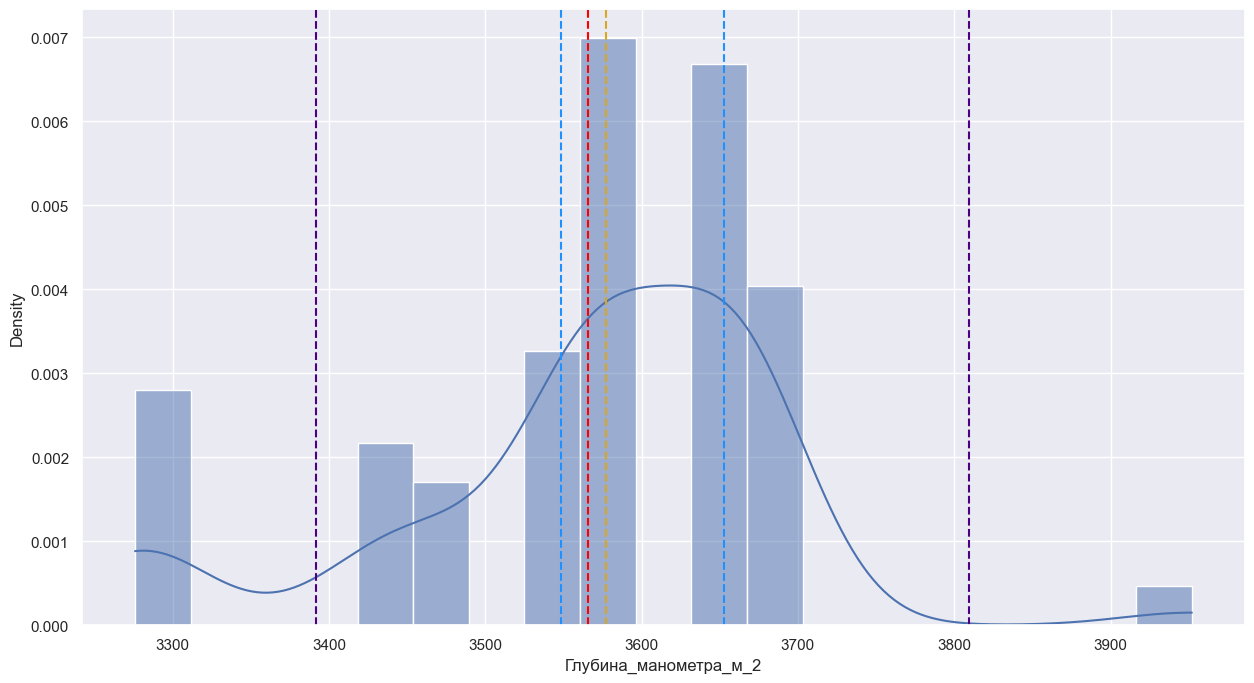

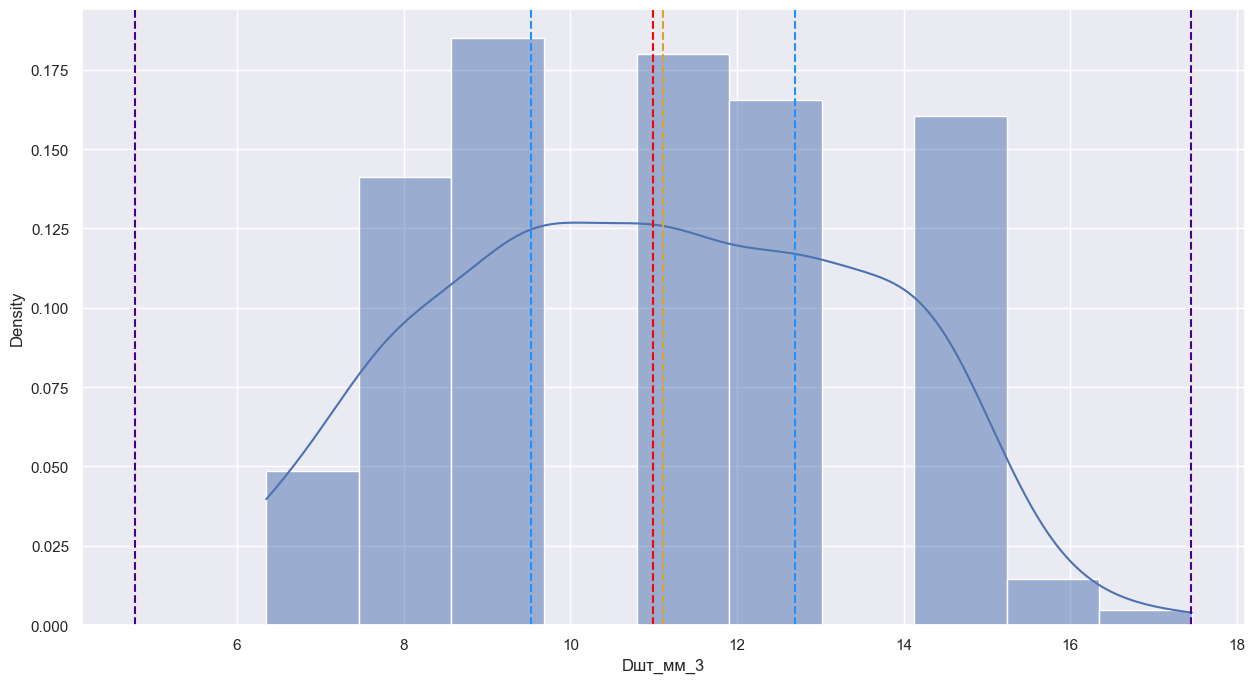

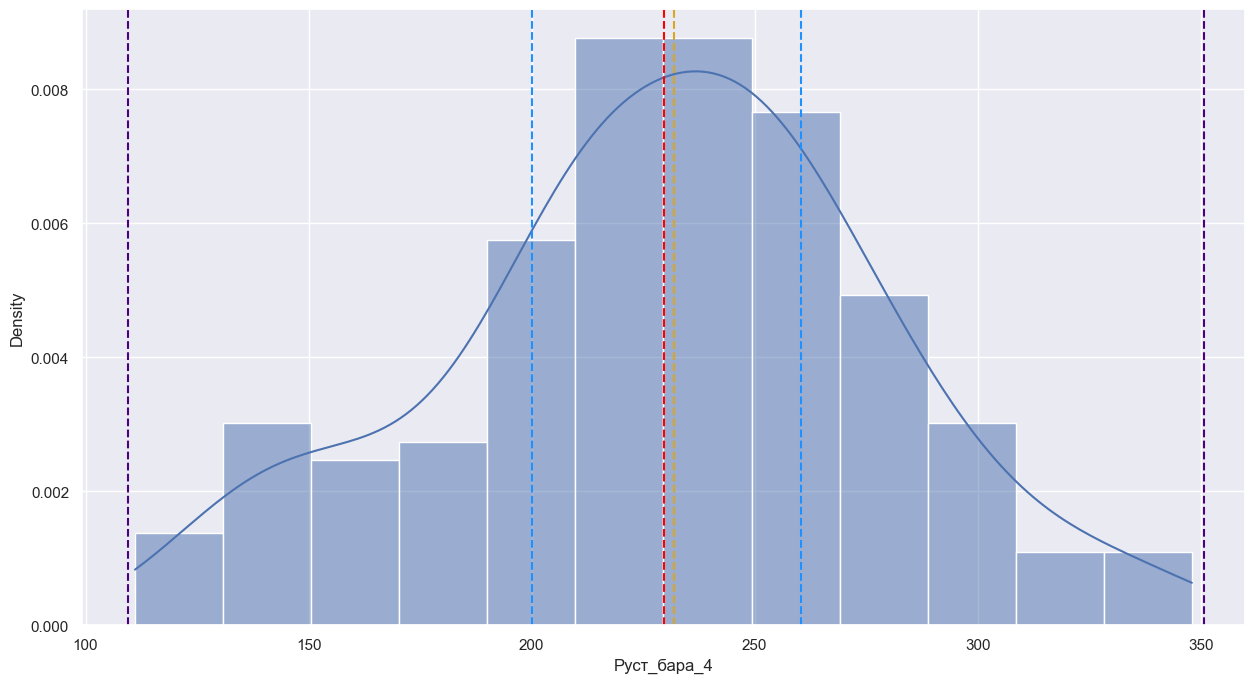

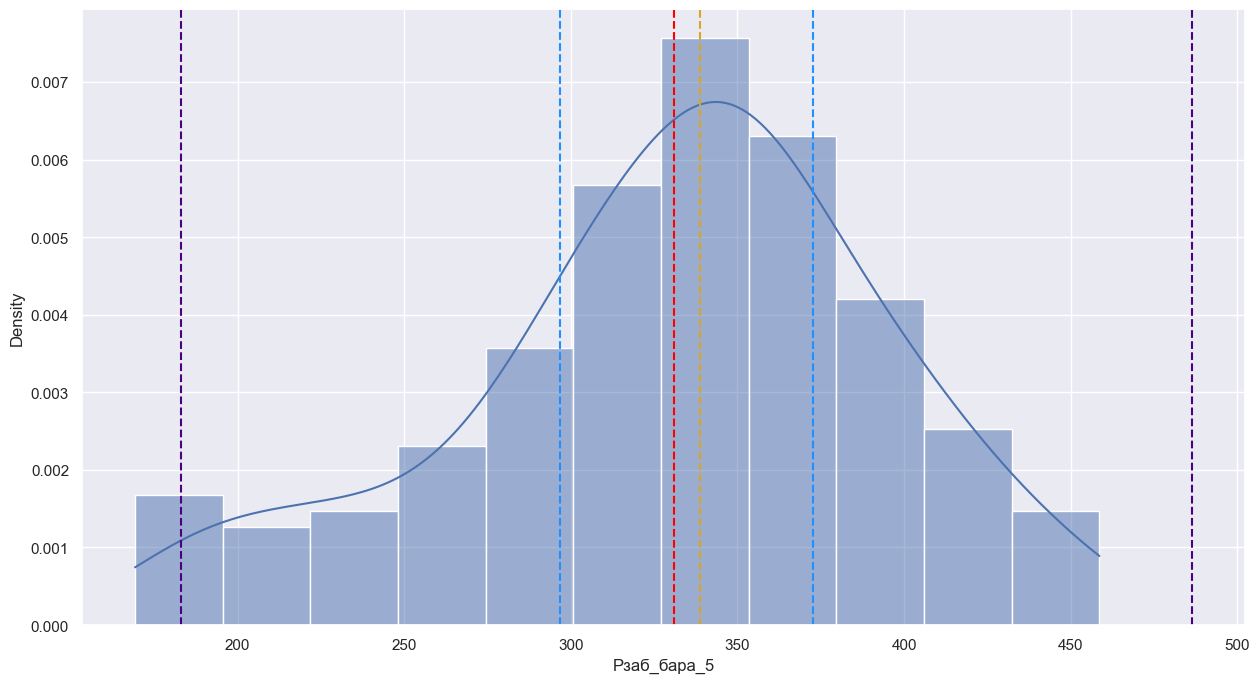

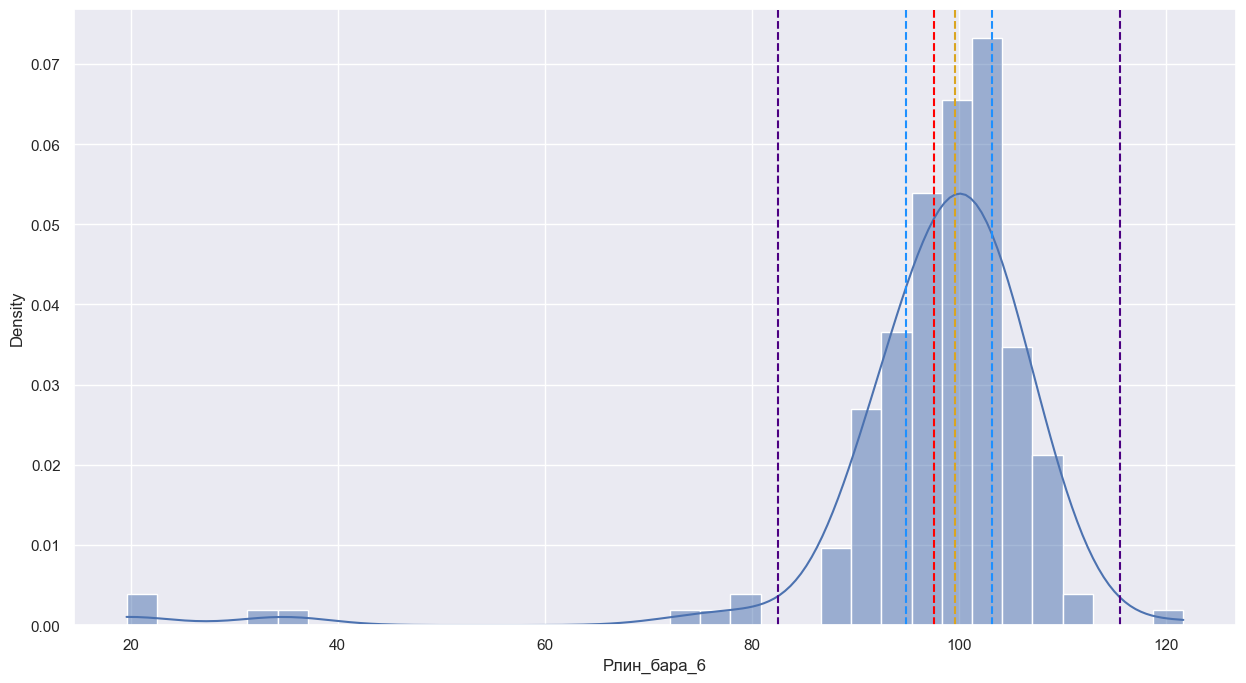

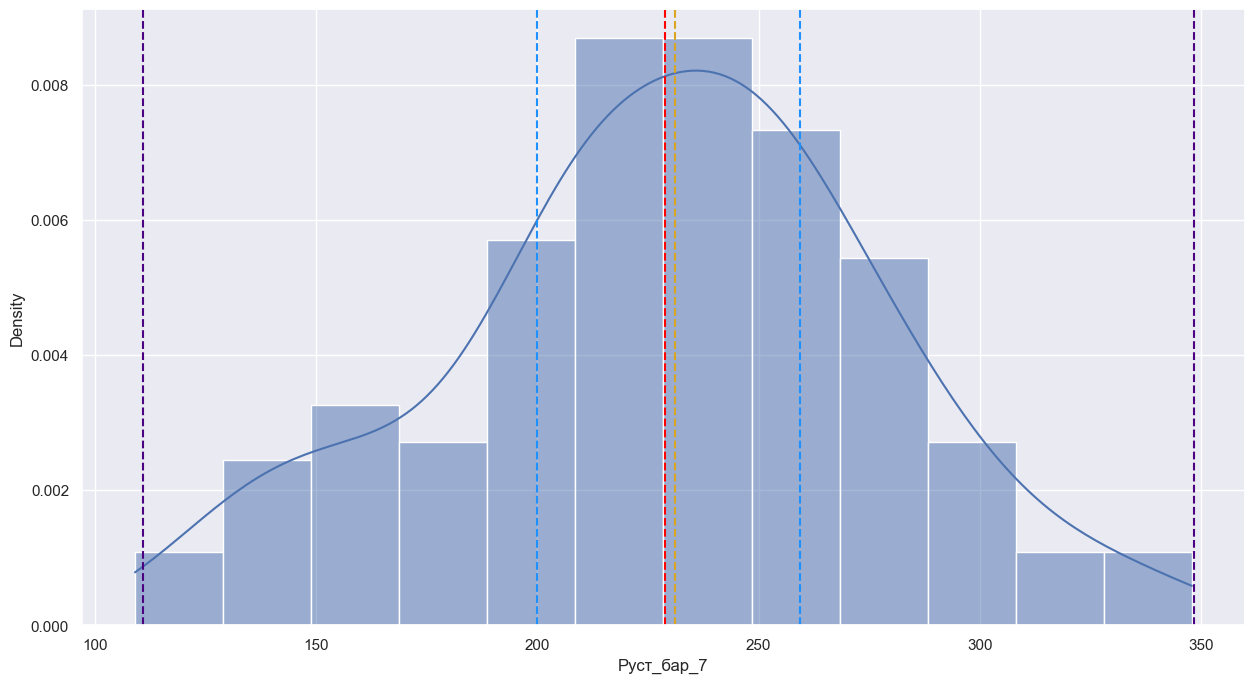

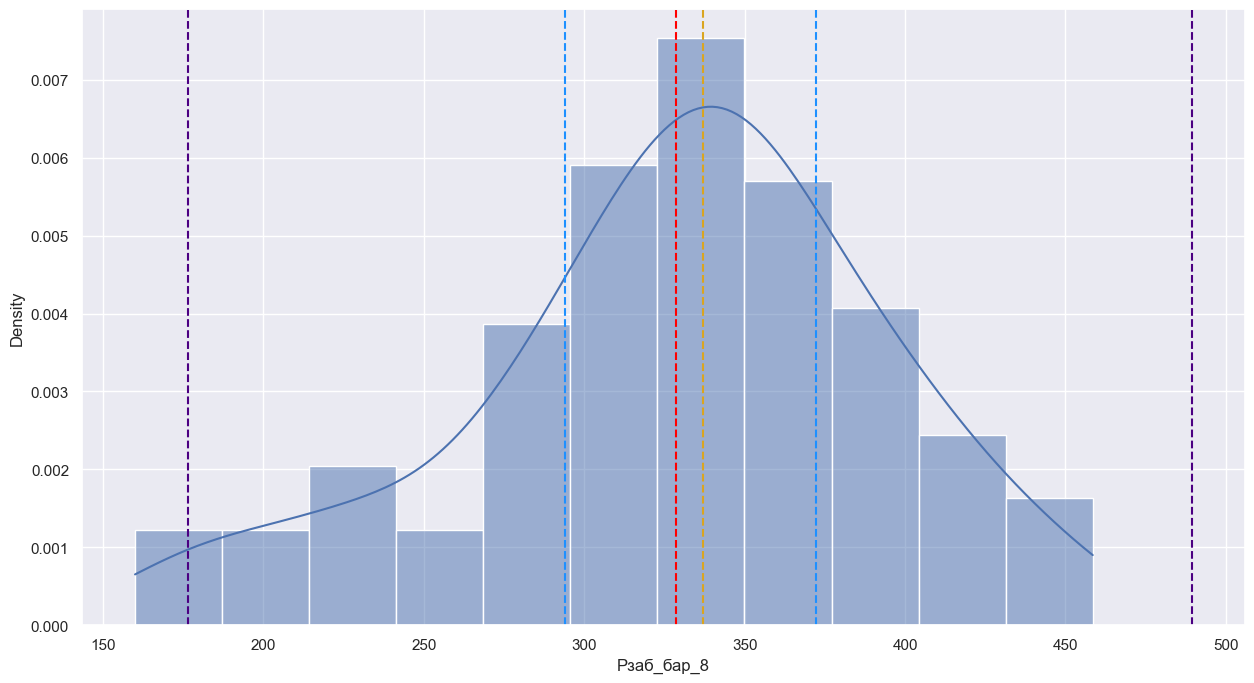

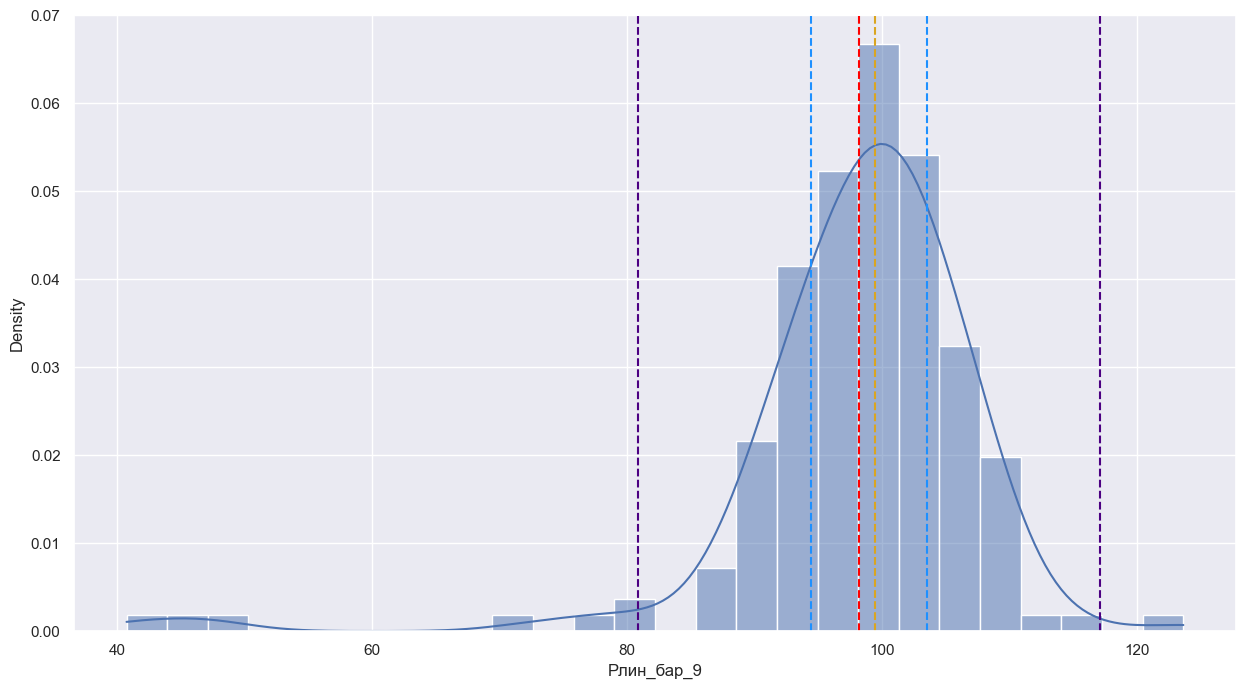

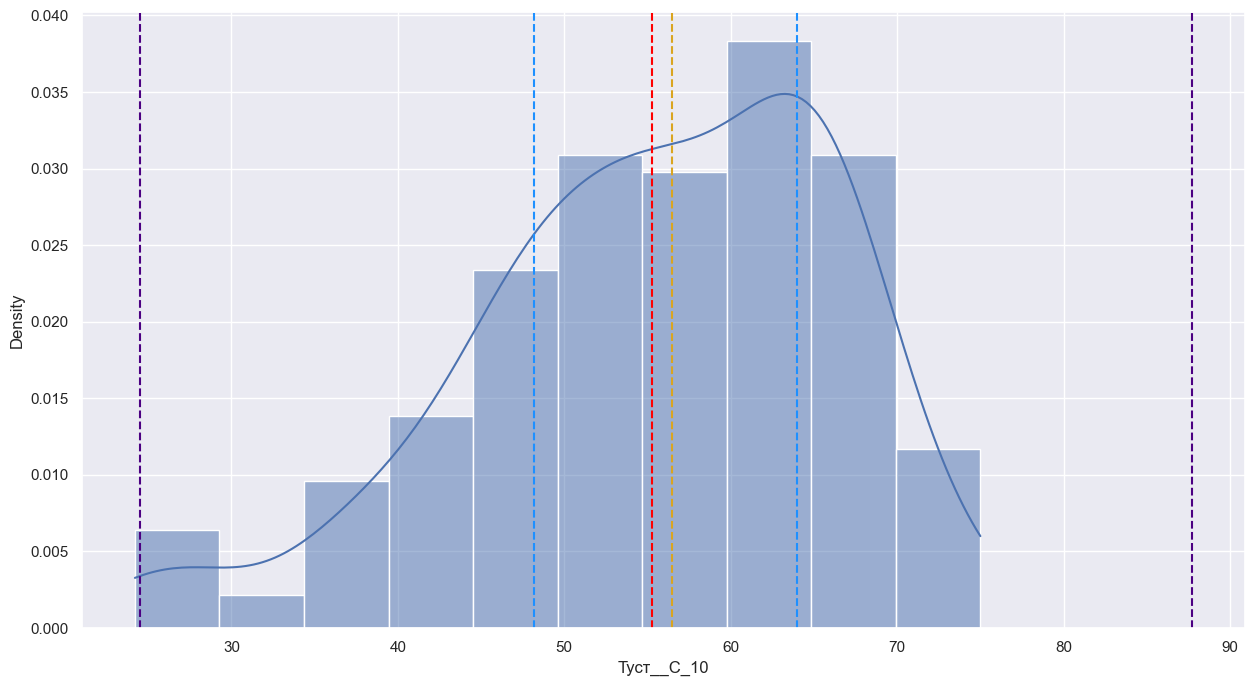

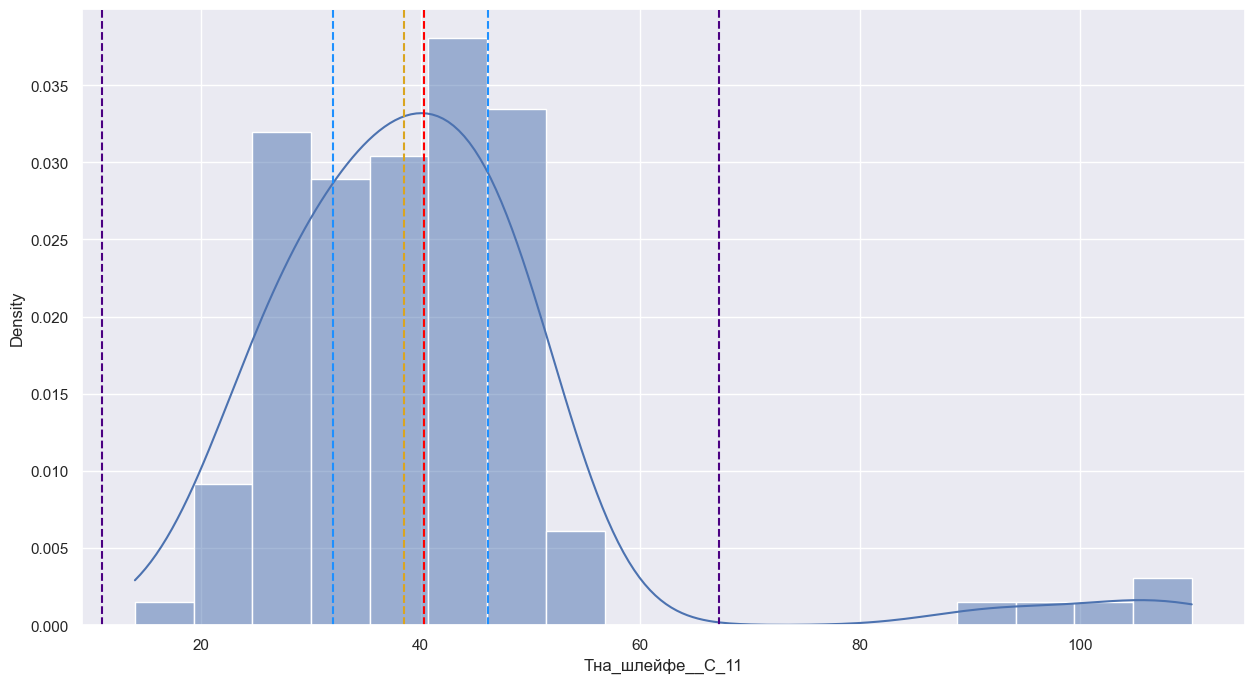

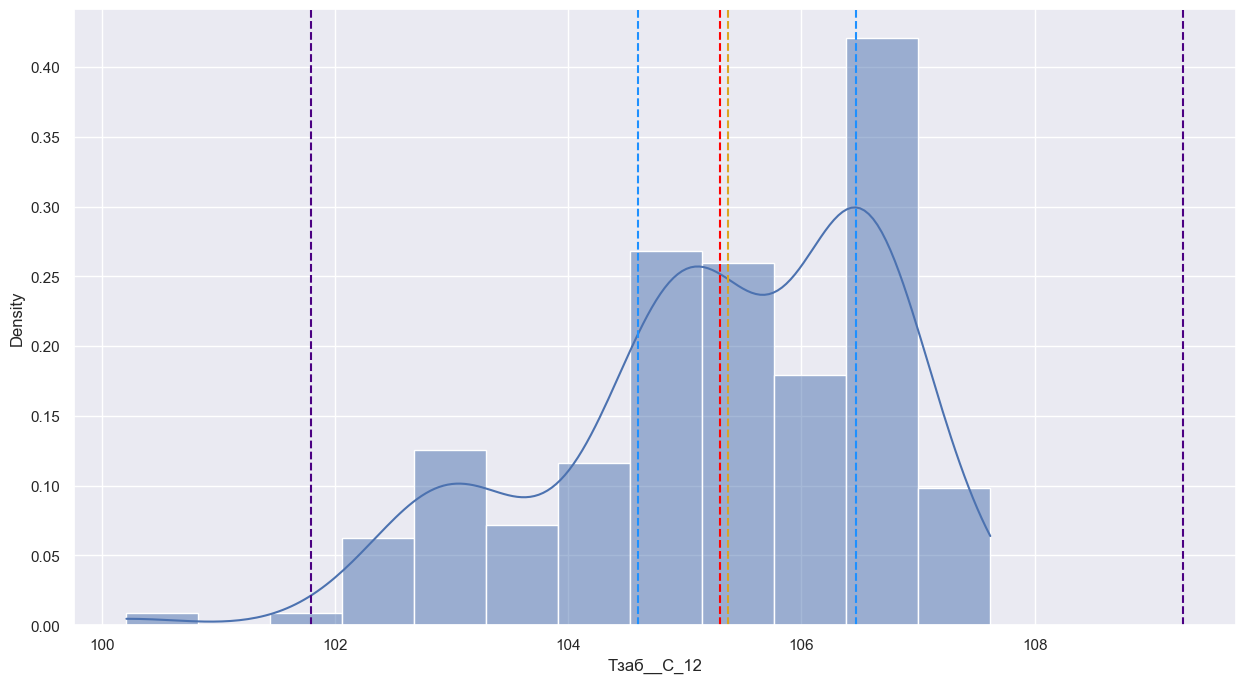

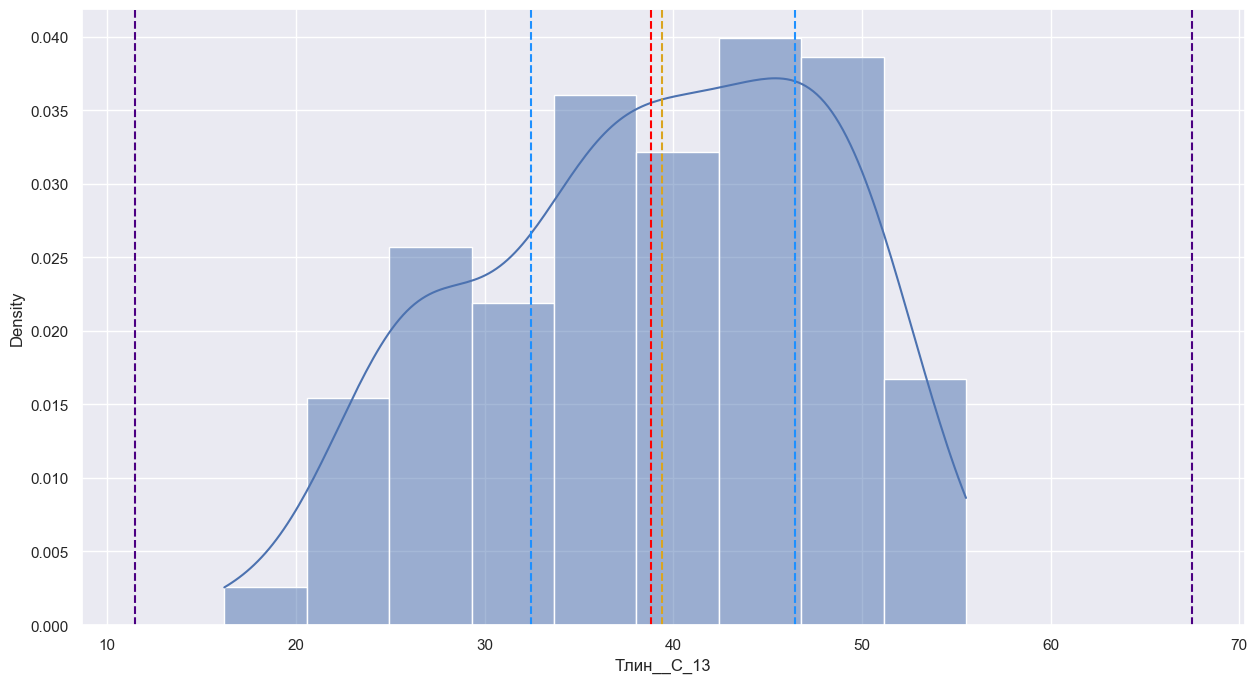

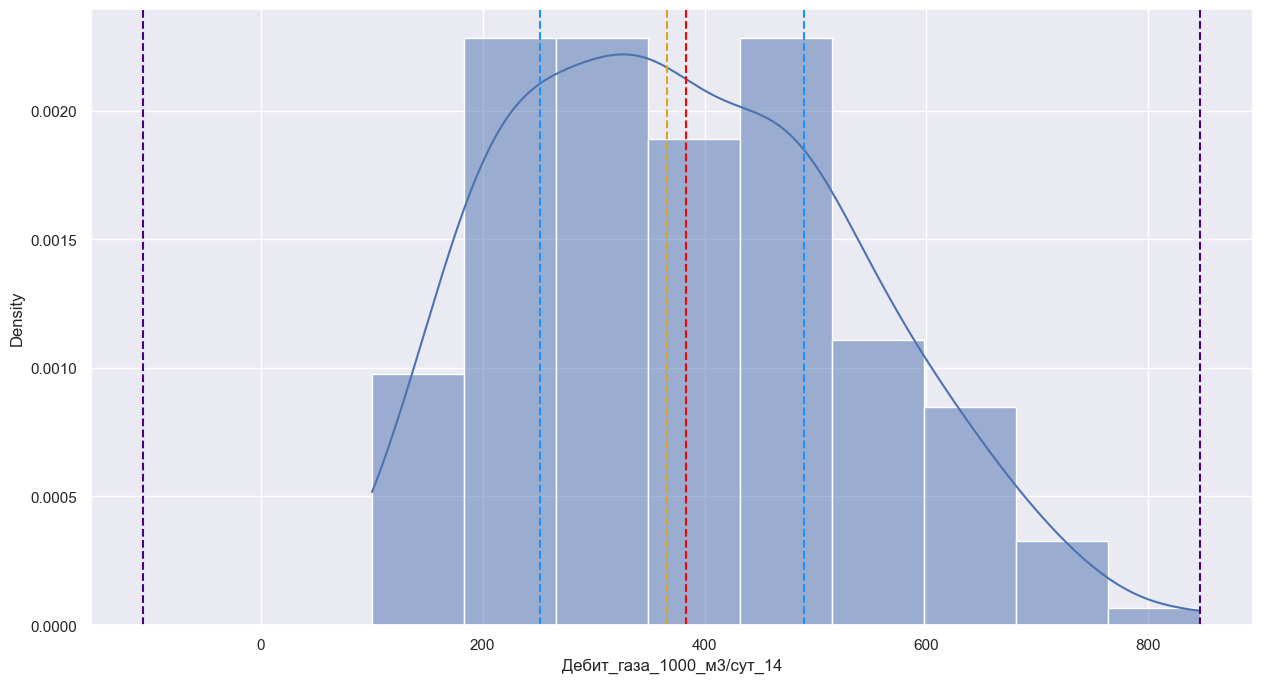

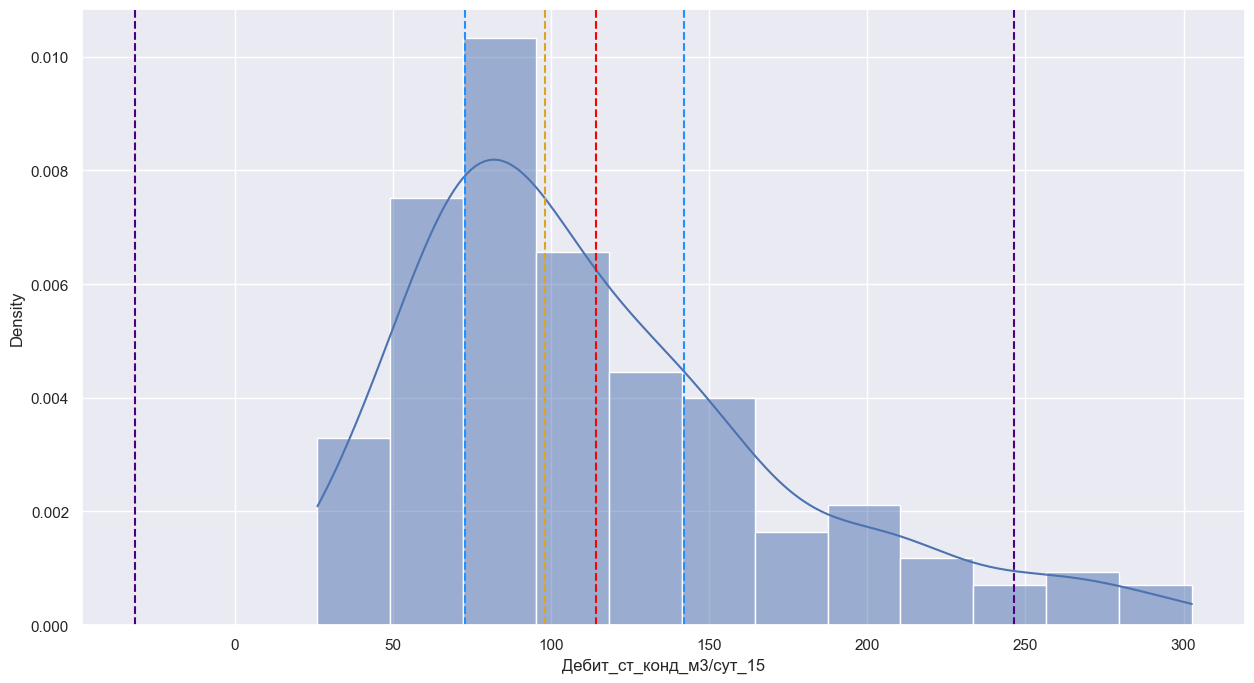

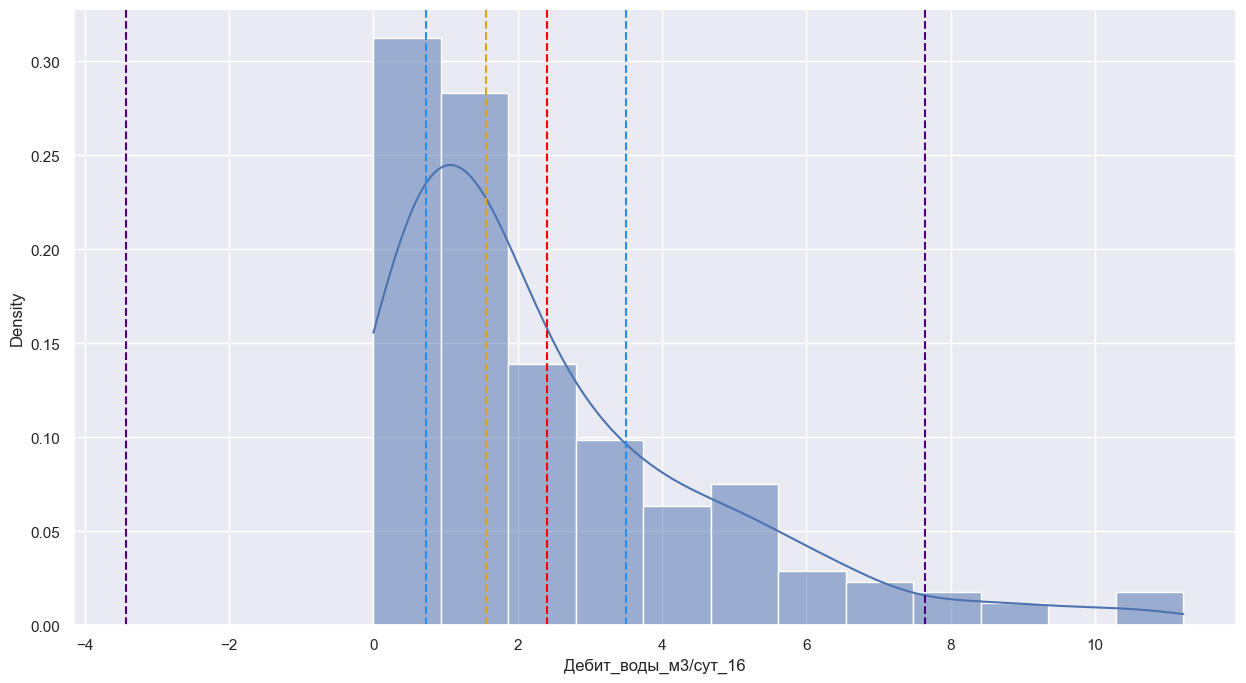

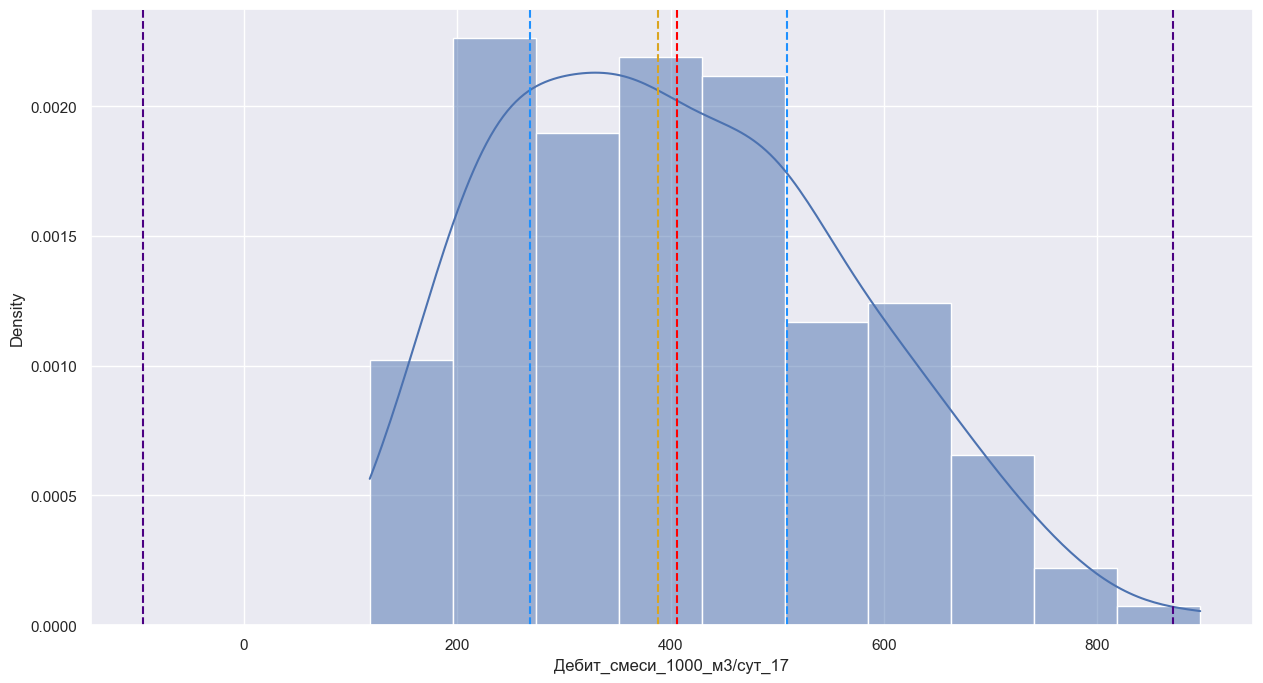

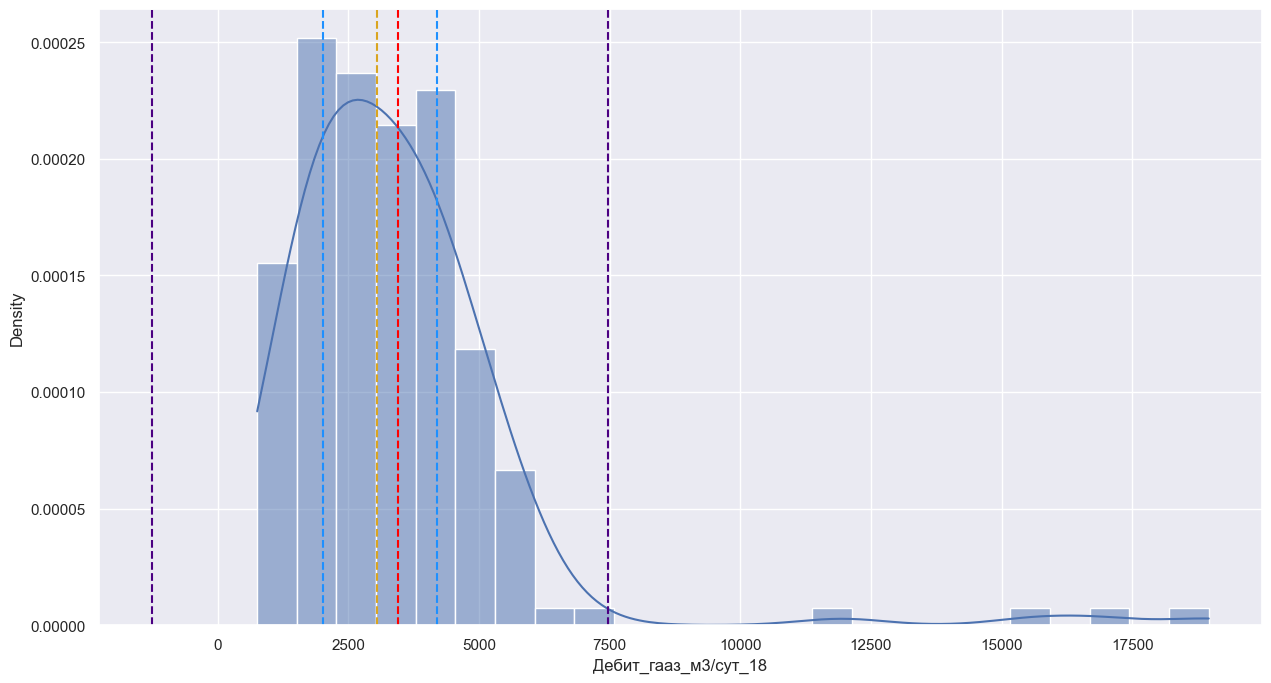

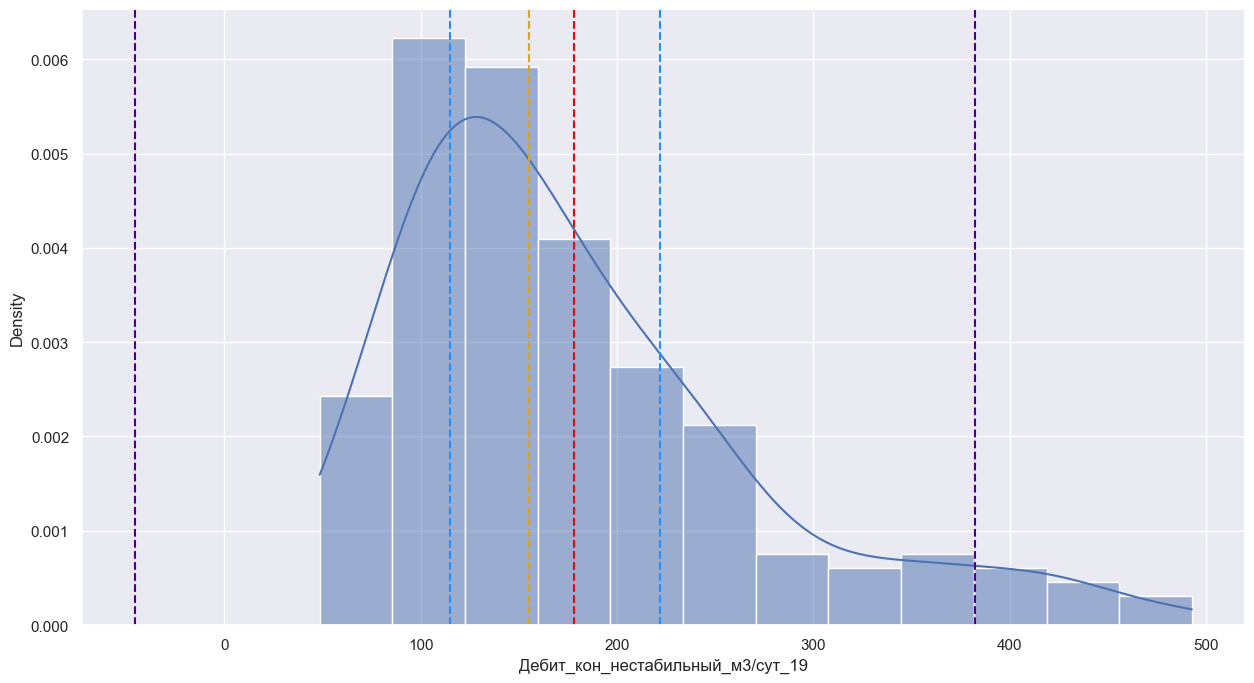

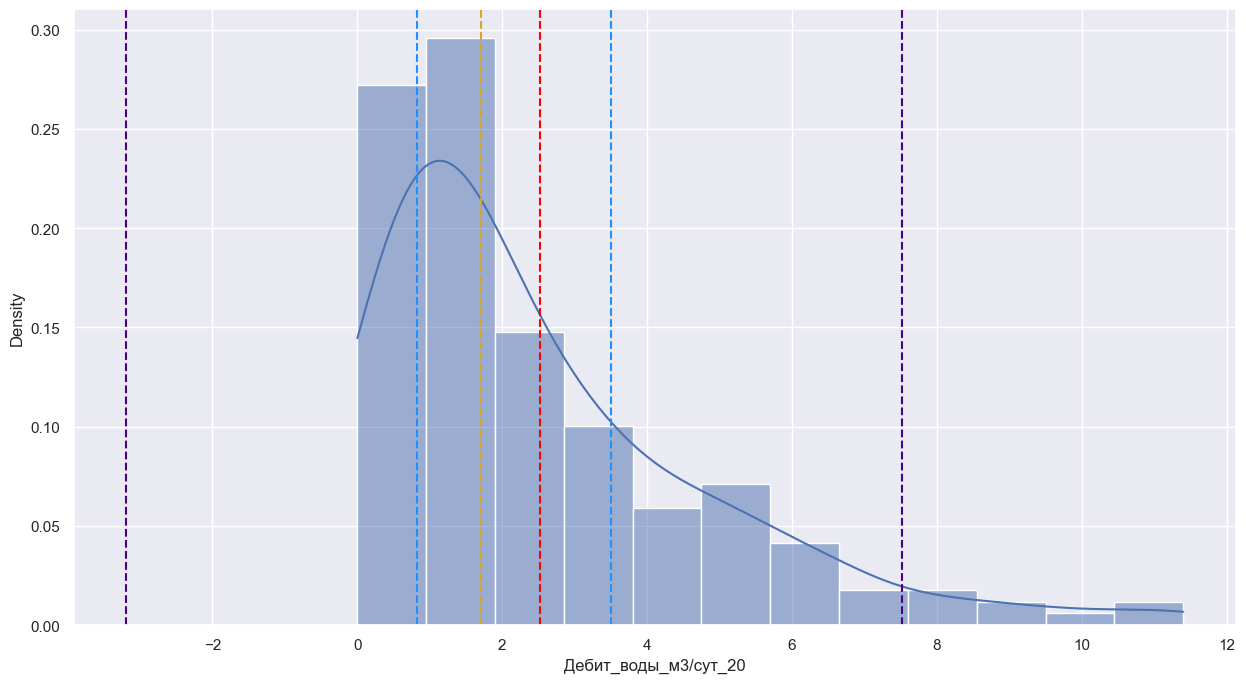

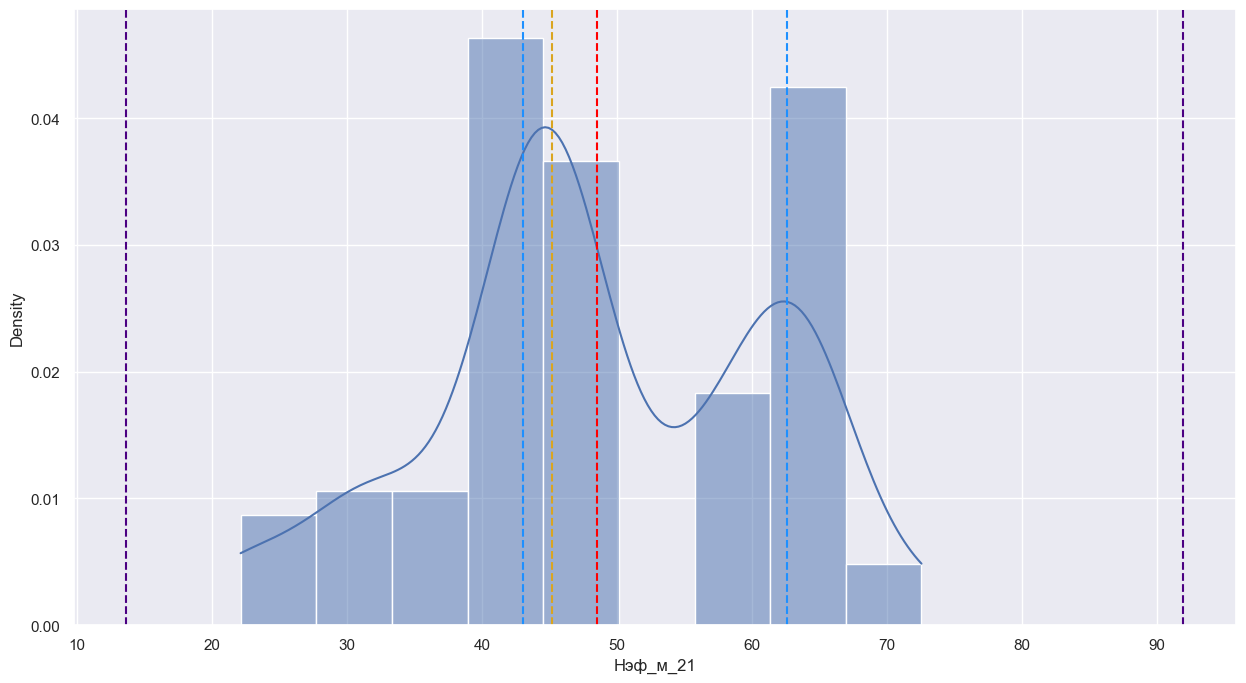

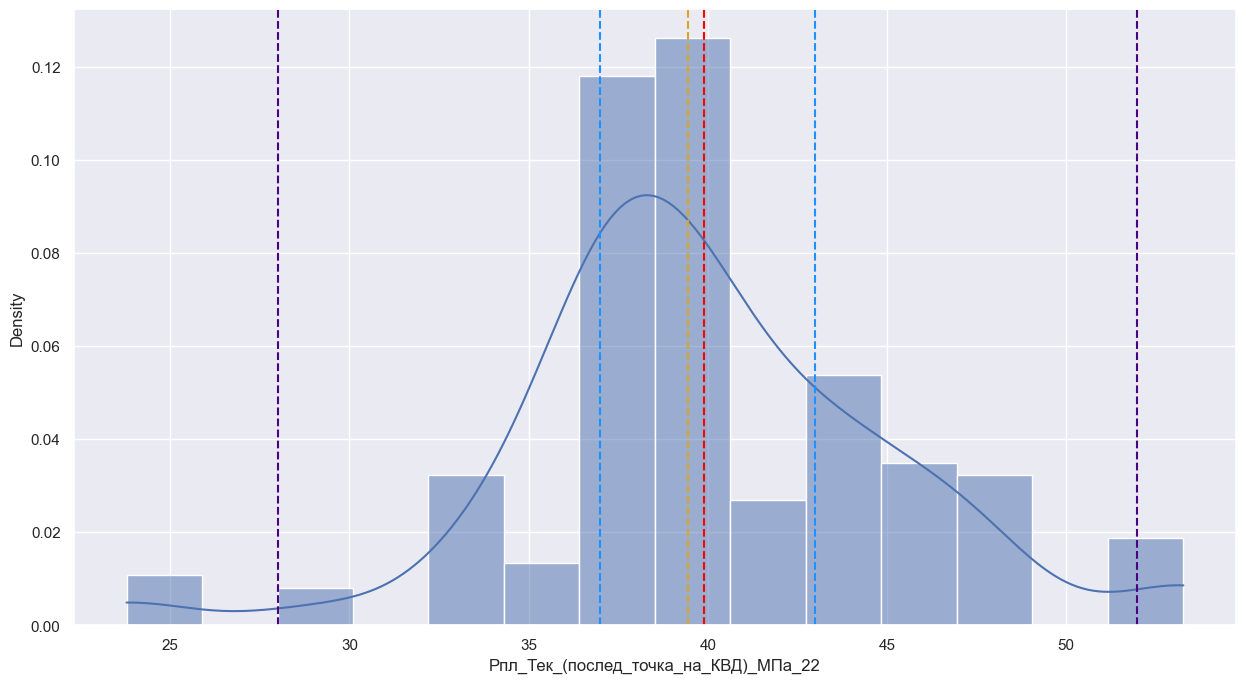

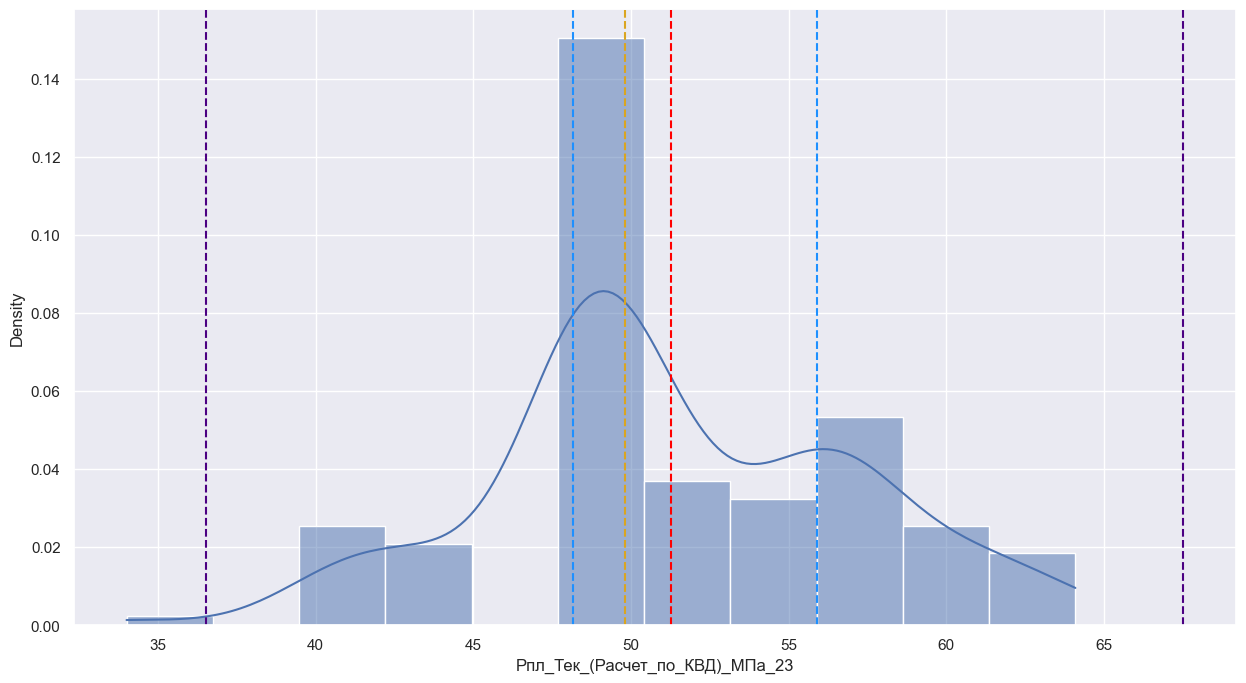

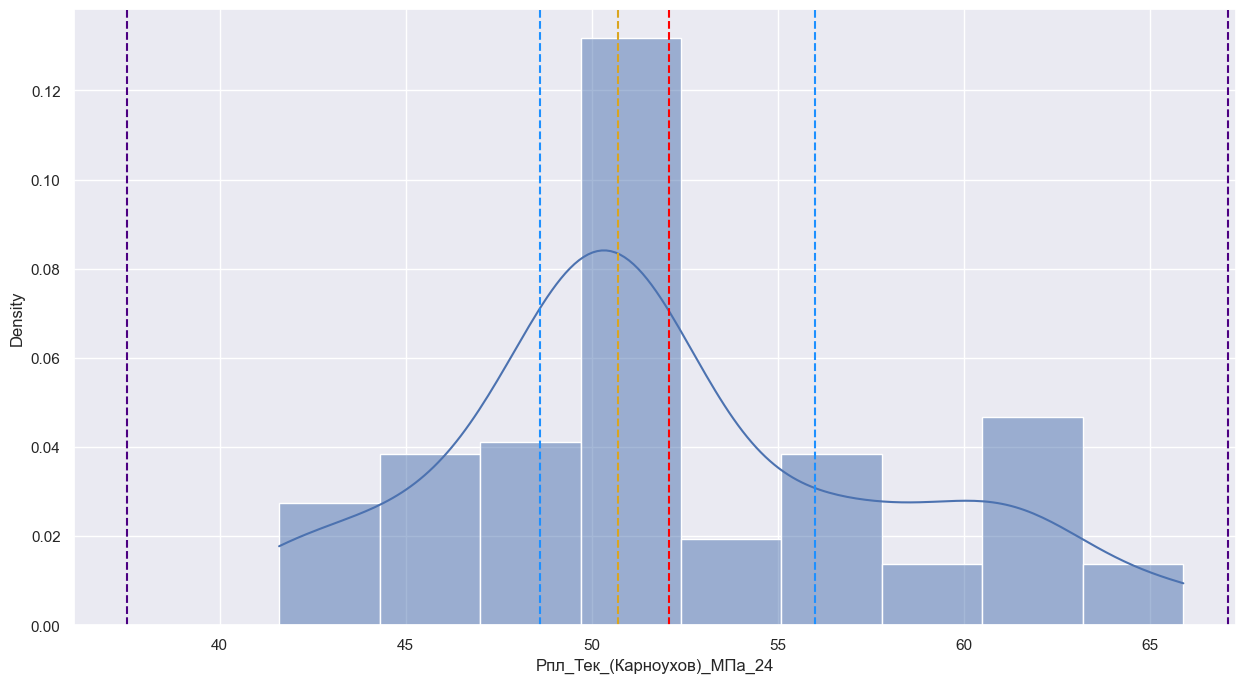

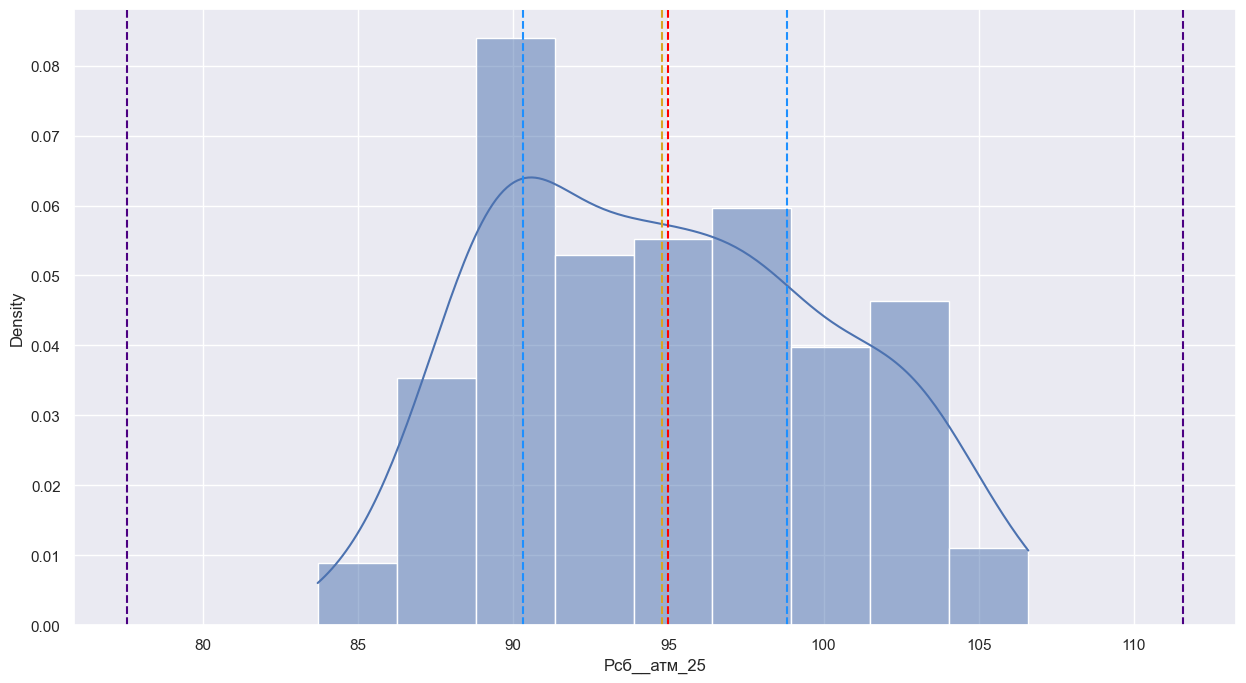

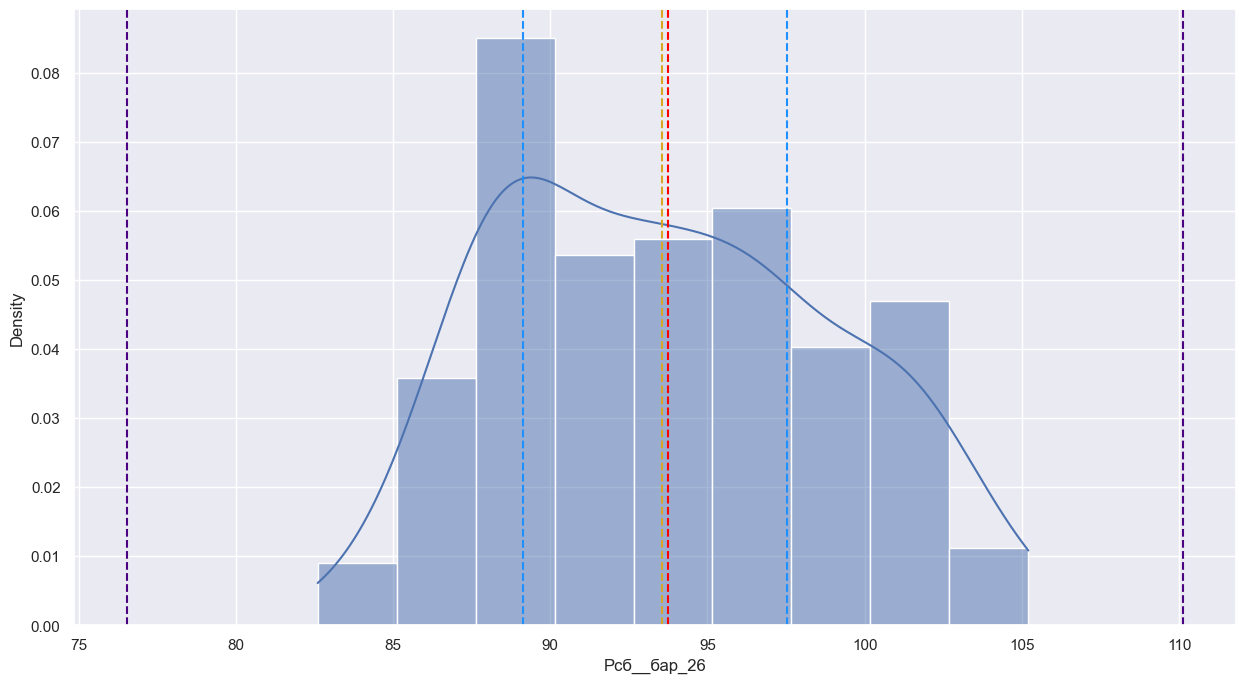

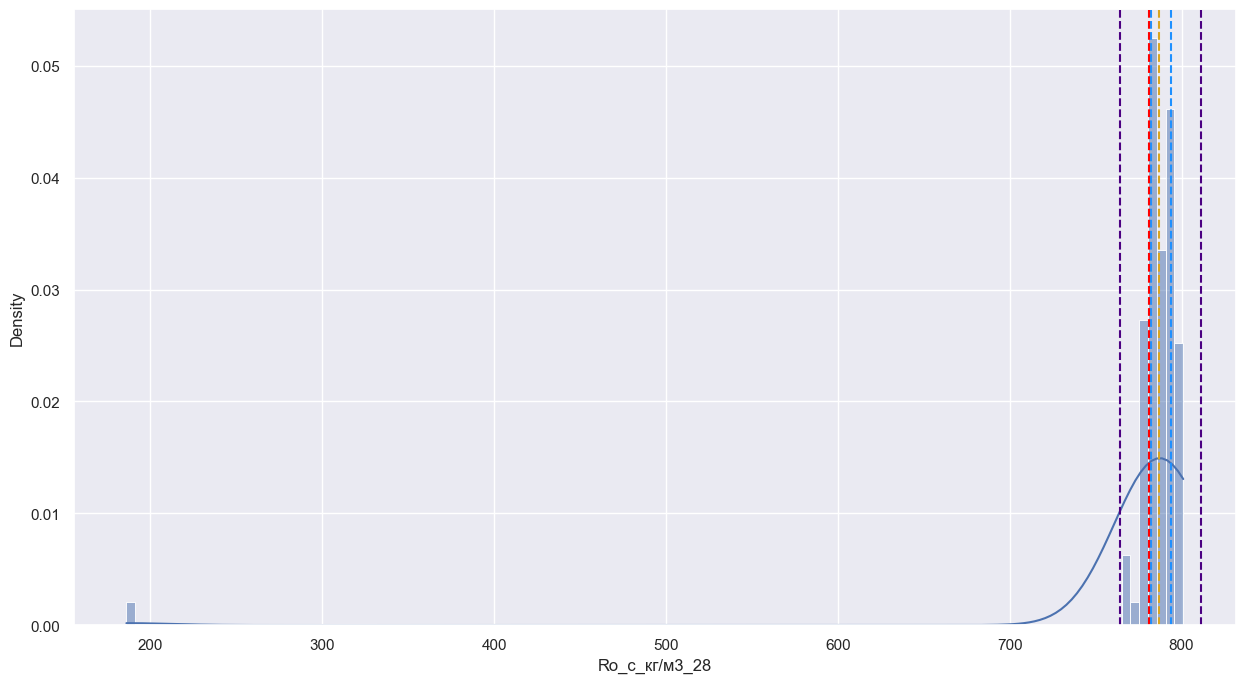

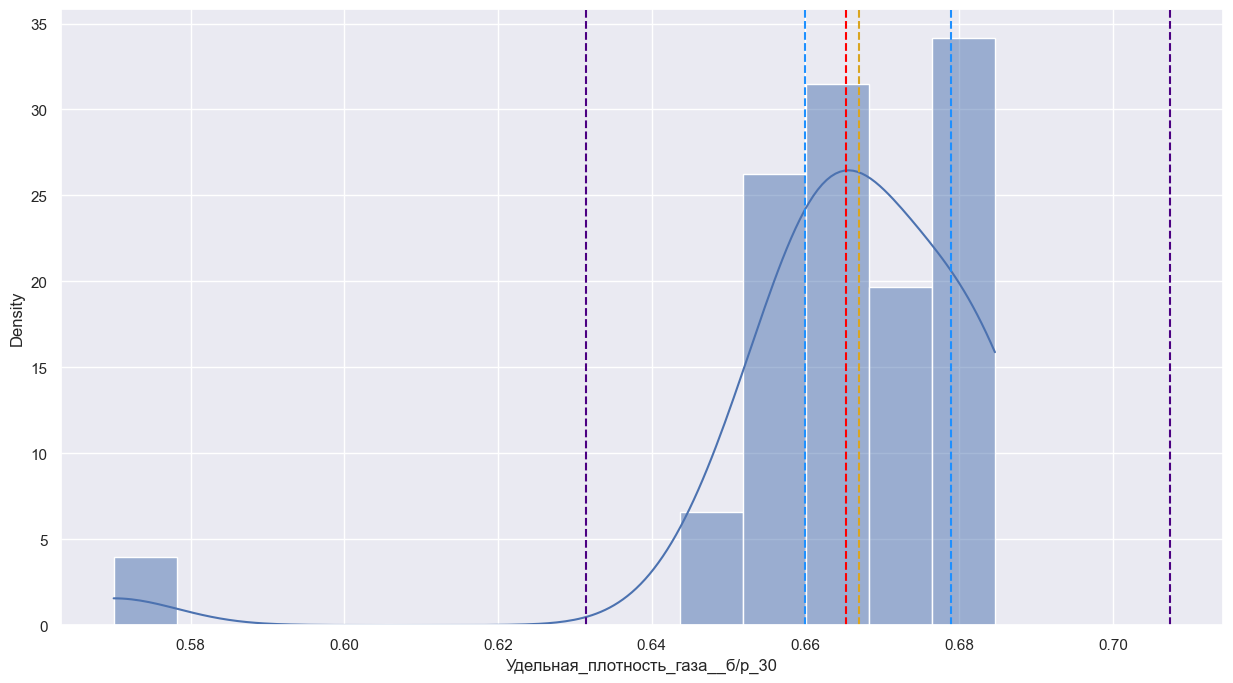

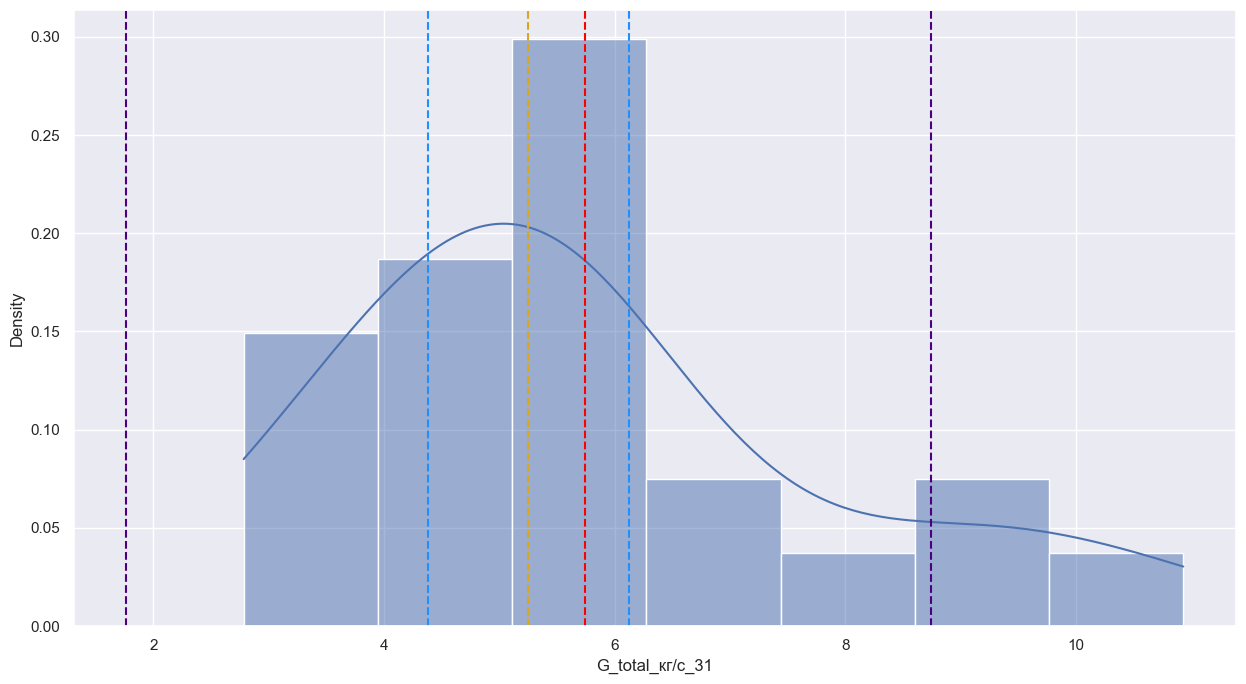

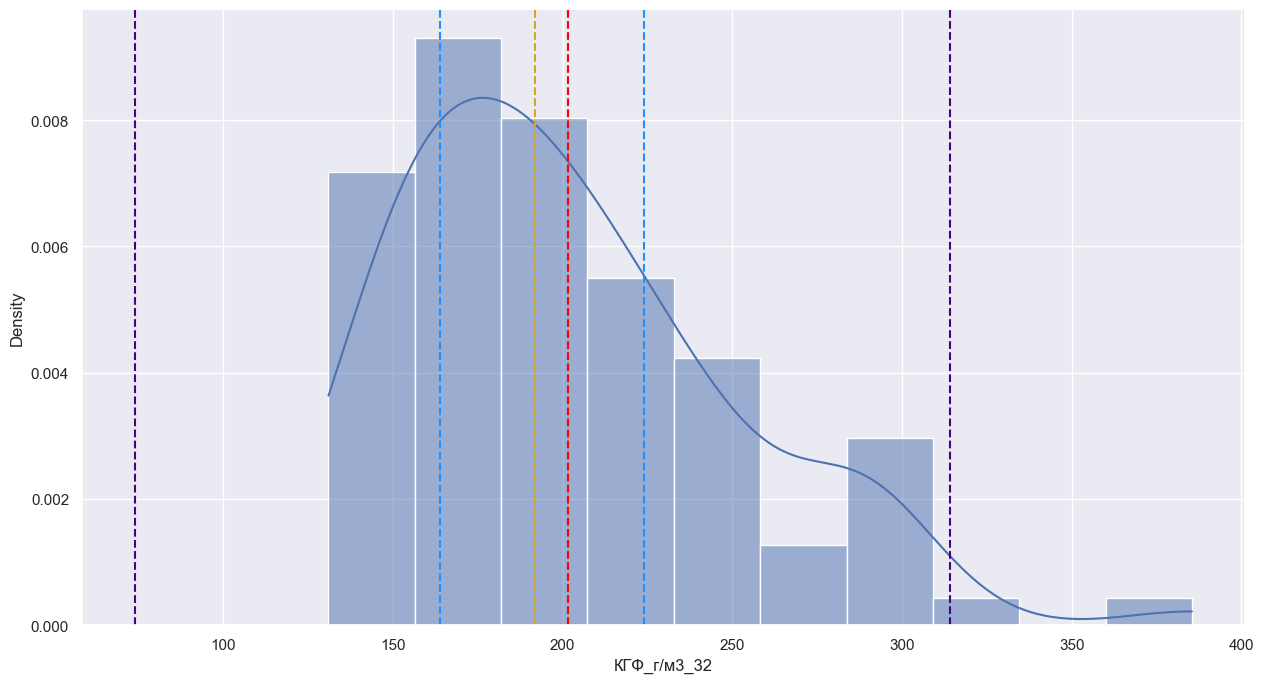

In [88]:
show_statistics(new_df)

Избавляемся от выбросов (выброс остаётся, если один из целевых параметров не является NaN)

Также одна из функций для очистки выбросов выкидывает строки с NaN в очищаемой колонке

In [89]:
def clear_deviations_and_nans(df: pd.DataFrame, attr_name: str, target_names: list, lower: float, higher: float) -> pd.DataFrame:
    df_ = df[(~np.isnan(df[target_names]).all(axis=1)) | ((df[attr_name] >= lower) & (df[attr_name] <= higher))]
    return df_

def clear_deviations(df: pd.DataFrame, attr_name: str, target_names: list, lower: float, higher: float) -> pd.DataFrame:
    df_ = df[(~np.isnan(df[target_names]).all(axis=1)) | ((df[attr_name] >= lower) & (df[attr_name] <= higher) | np.isnan(df[attr_name]))]
    return df_

In [90]:
target_columns = list(new_df.columns[-2:])
df_no_nans = new_df.copy(deep=True)
df_with_nans = new_df.copy(deep=True)

df_with_nans = clear_deviations(df_with_nans, 'Глубина_манометра_м_2', target_columns, -np.inf, 3800)
df_with_nans = clear_deviations(df_with_nans, 'Pлин_бара_6', target_columns, 60, np.inf)
df_with_nans = clear_deviations(df_with_nans, 'Рлин_бар_9', target_columns, 60, np.inf)
df_with_nans = clear_deviations(df_with_nans, 'Тна_шлейфе__С_11', target_columns, -np.inf, 80)
df_with_nans = clear_deviations(df_with_nans, 'Дебит_гааз_м3/сут_18', target_columns, -np.inf, 10000)
df_with_nans = clear_deviations(df_with_nans, 'Ro_c_кг/м3_28', target_columns, 600, np.inf)
df_with_nans = clear_deviations(df_with_nans, 'Удельная_плотность_газа__б/р_30', target_columns, 0.6, np.inf)

df_no_nans = clear_deviations_and_nans(df_no_nans, 'Глубина_манометра_м_2', target_columns, -np.inf, 3800)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Pлин_бара_6', target_columns, 60, np.inf)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Рлин_бар_9', target_columns, 60, np.inf)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Тна_шлейфе__С_11', target_columns, -np.inf, 80)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Дебит_гааз_м3/сут_18', target_columns, -np.inf, 10000)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Ro_c_кг/м3_28', target_columns, 600, np.inf)
df_no_nans = clear_deviations_and_nans(df_no_nans, 'Удельная_плотность_газа__б/р_30', target_columns, 0.6, np.inf)

Рассматриваем датасет, из которого выкинули выбросы и NaN в соответствующих колонках

In [91]:
no_deviations_frame = stat.get_some_statistics(df_no_nans)
no_deviations_frame

Глубина_манометра_м_2   Dшт_мм_3  Руст_бара_4  \
Количество                           90.000000  93.000000    93.000000   
Процент_пропусков                     3.225806   0.000000     0.000000   
Минимум                            3276.000000   6.350000   138.157895   
Первый_квартиль                    3427.625000   9.530000   201.636750   
Среднее                            3524.086667  10.951183   228.293412   
Медиана                            3579.000000  11.110000   229.894737   
Третий_квартиль                    3652.250000  12.700000   252.000000   
Максимум                           3670.000000  15.880000   337.108108   
Стандартное_отклонение              144.474862   2.423172    41.897238   
Мощность                             20.000000  10.000000    87.000000   
Интерквартильный_размах             224.625000   3.170000    50.363250   

                         Рзаб_бара_5  Pлин_бара_6  Руст_бар_7  Рзаб_бар_8  \
Количество                 90.000000    93.000000   93.000000   90.000000   
Процент_пропусков           3.225806     0.000000    0.000000    3.225806   
Минимум                   174.000000    73.306638  136.000000  174.000000   
Первый_квартиль           297.797500    95.945951  200.000000  294.625000   
Среднее                   331.762255    99.860962  227.644269  330.334444   
Медиана                   337.789172   100.800000  228.000000  334.250000   
Третий_квартиль           364.150000   103.865199  252.000000  362.150000   
Максимум                  458.600000   121.682930  333.000000  458.500000   
Стандартное_отклонение     56.481235     7.300663   41.757127   56.357493   
Мощность                   88.000000    91.000000   73.000000   89.000000   
Интерквартильный_размах    66.352500     7.919248   52.000000   67.525000   

                         Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  ...  \
Количество                93.000000   93.000000         60.000000  ...   
Процент_пропусков          0.000000    0.000000         35.483871  ...   
Минимум                   40.739839   24.200000         14.000000  ...   
Первый_квартиль           95.335032   50.300000         33.300000  ...   
Среднее                   98.005453   56.172043         43.091667  ...   
Медиана                  100.260000   58.000000         38.700000  ...   
Третий_квартиль          104.000000   64.000000         46.375000  ...   
Максимум                 123.616800   75.000000        110.200000  ...   
Стандартное_отклонение    12.425851   11.250781         19.602337  ...   
Мощность                  88.000000   51.000000         57.000000  ...   
Интерквартильный_размах    8.664968   13.700000         13.075000  ...   

                          Нэф_м_21  Рпл_Тек_(послед_точка_на_КВД)_МПа_22  \
Количество               93.000000                             88.000000   
Процент_пропусков         0.000000                              5.376344   
Минимум                  30.000000                             29.170000   
Первый_квартиль          44.200000                             37.210000   
Среднее                  52.703325                             40.682881   
Медиана                  56.800000                             39.466050   
Третий_квартиль          63.500000                             42.860000   
Максимум                 72.539800                             53.270000   
Стандартное_отклонение   12.149424                              5.374353   
Мощность                 14.000000                             21.000000   
Интерквартильный_размах  19.300000                              5.650000   

                         Рпл_Тек_(Расчет_по_КВД)_МПа_23  \
Количество                                    81.000000   
Процент_пропусков                             12.903226   
Минимум                                       39.900000   
Первый_квартиль                               48.300000   
Среднее                                       50.943684   
Медиана                                       50.800000

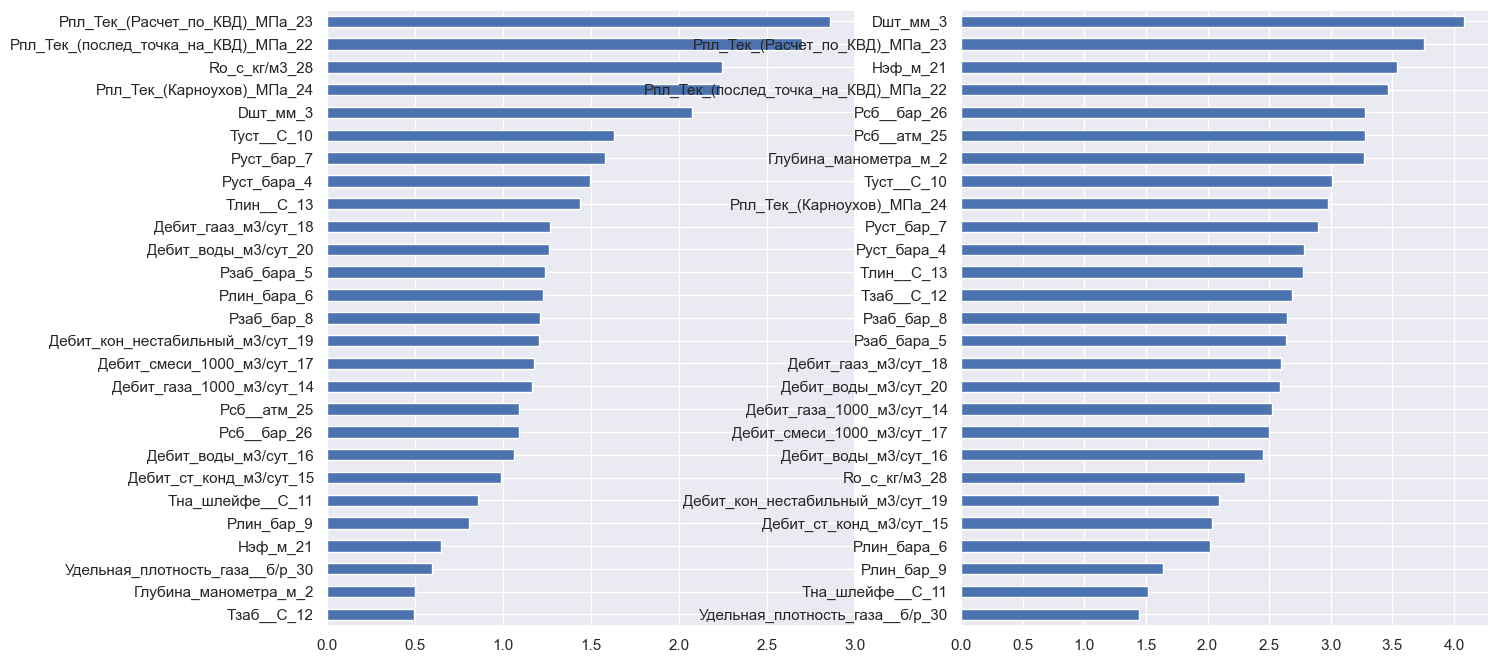

In [92]:
fig, axs = plt.subplots(1, 2)
G_feature_importance = gr.data_set_gain_ratio(df_no_nans, df_no_nans.columns[-2], 2)
G_feature_importance.sort_values(inplace=True)
G_feature_importance.plot(kind='barh', ax=axs[0])
K_feature_importance = gr.data_set_gain_ratio(df_no_nans, df_no_nans.columns[-1], 2)
K_feature_importance.sort_values(inplace=True)
K_feature_importance.plot(kind='barh', ax=axs[1])
#for ax in axs.flat:
#   ax.label_outer()
plt.show()

<Axes: >

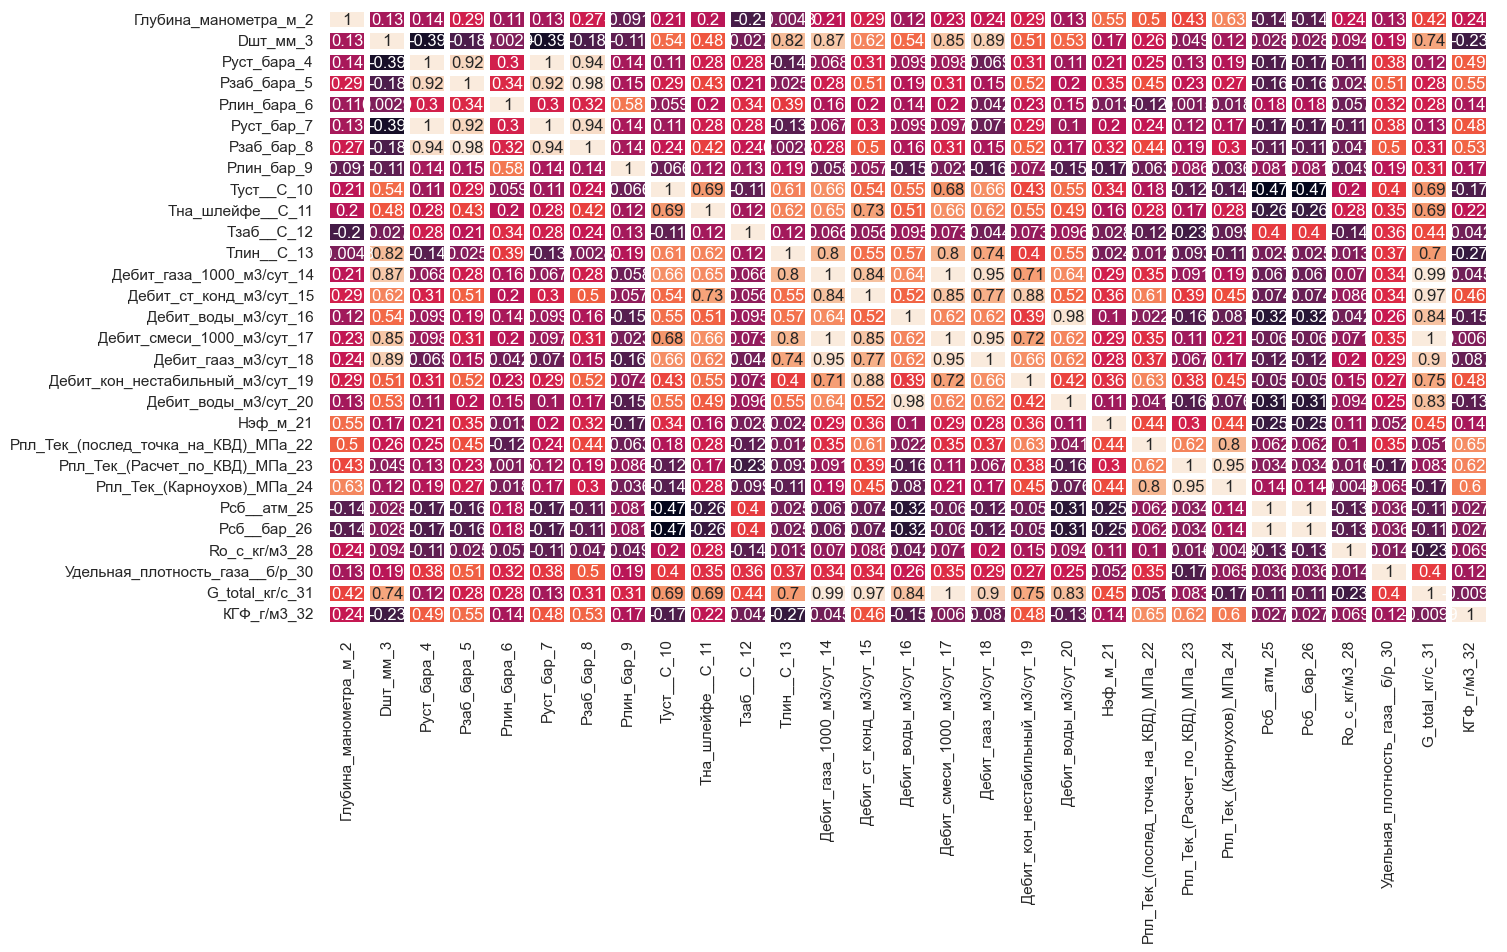

In [93]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_no_nans.corr(), annot=True, linewidths=3, cbar=False)

Ищем сильно (> 0.95) коррелирующие величины:
<ul>
    <li> Руст_бара_4 и <b> Руст_бар_7 </b> (1) </li>
    <li> <b> Рзаб_бара_5 </b> и Рзаб_бар_8 (0.99) </li>
    <li> Дебит_газа_1000_м3/сут_14 и Дебит_смеси_1000_м3/сут_17 (1) </li>
    <li> Дебит_газа_1000_м3/сут_14 и <b> G_total_кг/с_31 </b> (0.99) </li>
    <li> Дебит_ст._конд._м3/сут_15 и <b> G_total_кг/с_31 </b> (0.97) </li>
    <li> Дебит_воды_м3/сут_16 и <b> Дебит_воды_м3/сут_20 </b> (0.98) </li>
    <li> Дебит_смеси_1000_м3/сут_17 и <b> G_total_кг/с_31 </b> (1) </li>
    <li> <b> Pсб__атм_25 </b> и Pсб__бар_26 (1) </li>
</ul>


In [94]:
df_no_nans = df_no_nans.drop(['Руст_бара_4', 'Рзаб_бар_8', 'Дебит_газа_1000_м3/сут_14', 'Дебит_ст_конд_м3/сут_15', 'Дебит_смеси_1000_м3/сут_17', 'Дебит_воды_м3/сут_16', 'Pсб__бар_26'], axis=1)

<Axes: >

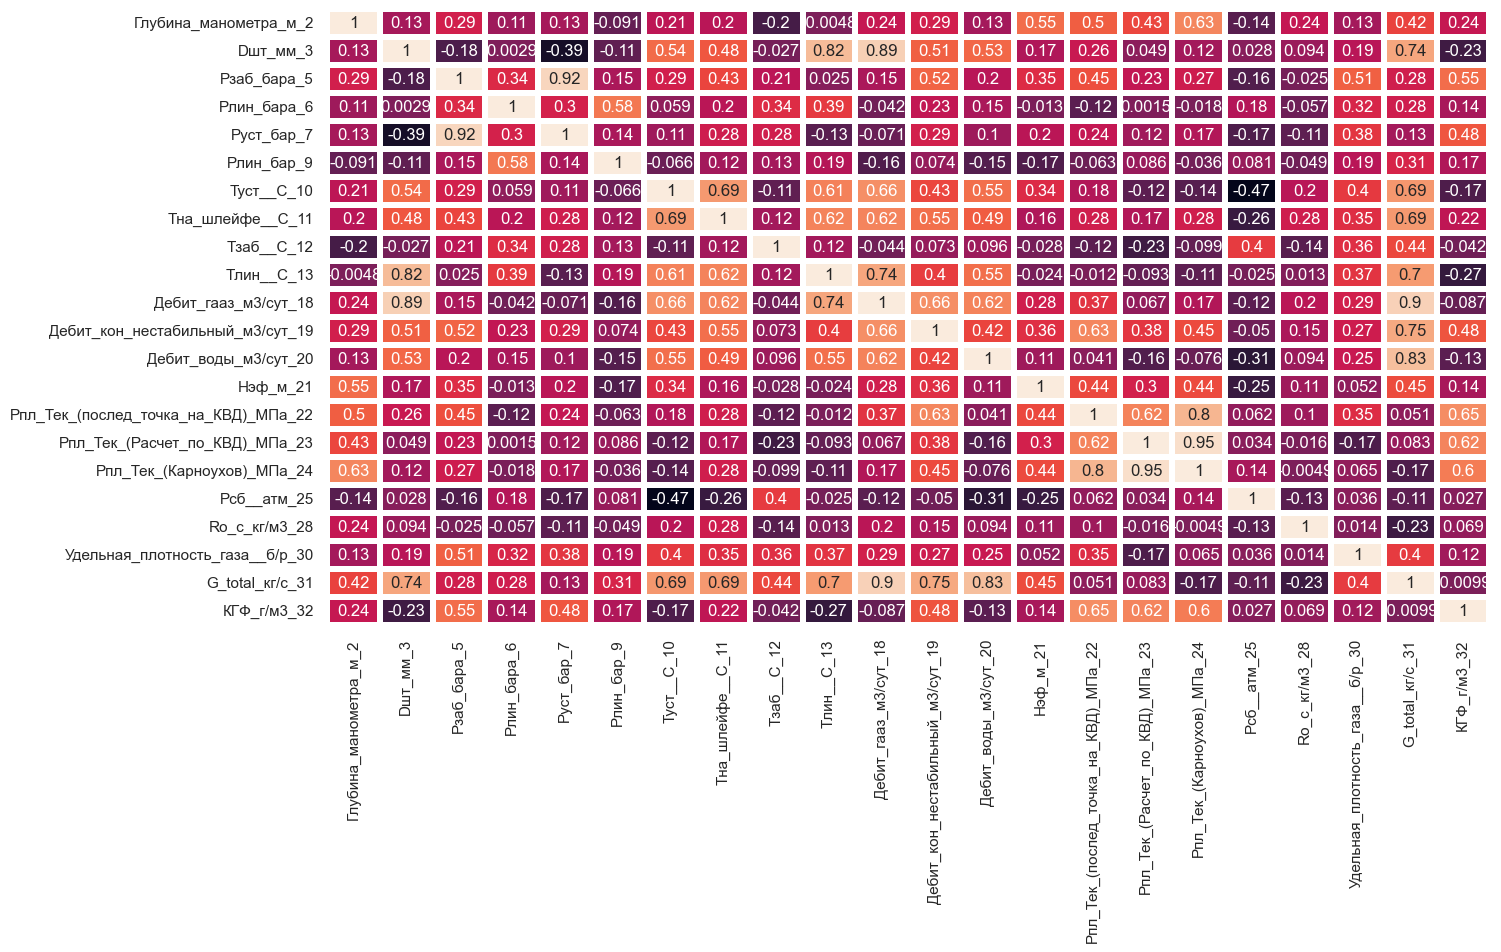

In [95]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_no_nans.corr(), annot=True, linewidths=3, cbar=False)

In [96]:
#non_std_df = (df_no_nans - df_no_nans.median()) / (df_no_nans.quantile(q=0.75) - df_no_nans.quantile(q=0.25))
#std_df = (df_no_nans - df_no_nans.mean()) / df_no_nans.std()
#print(non_std_df.mean())
#print('\n##################\n')
#print(std_df.mean()) # лучше

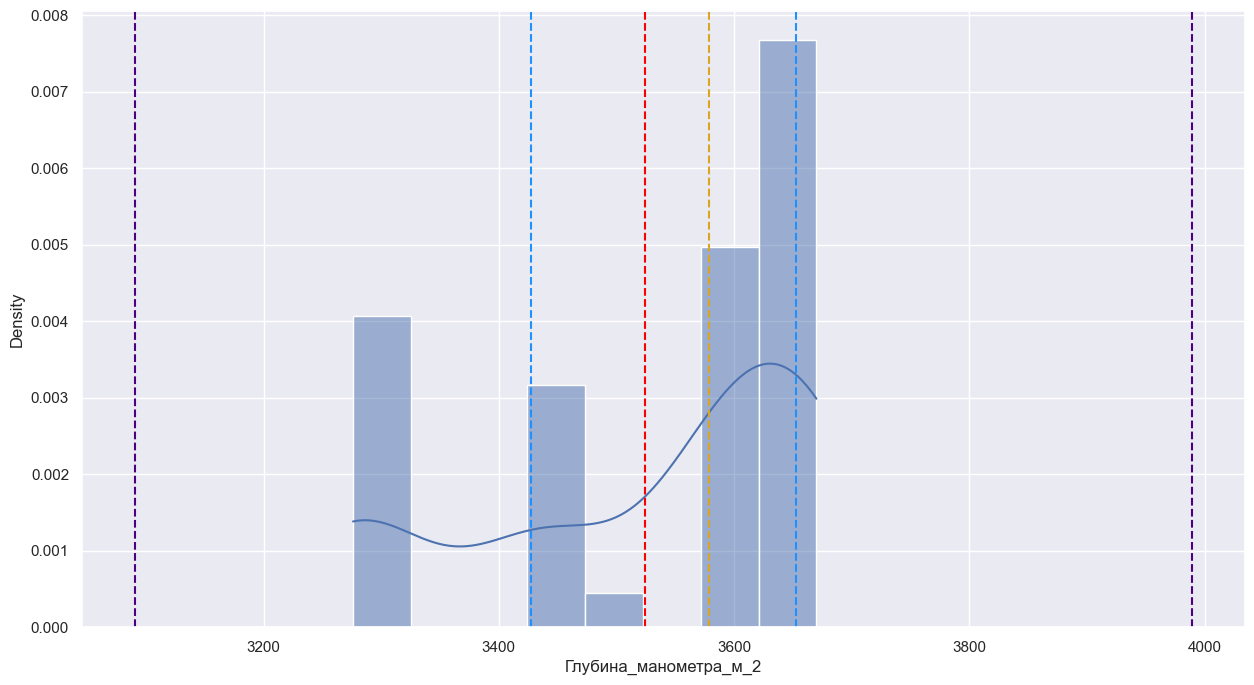

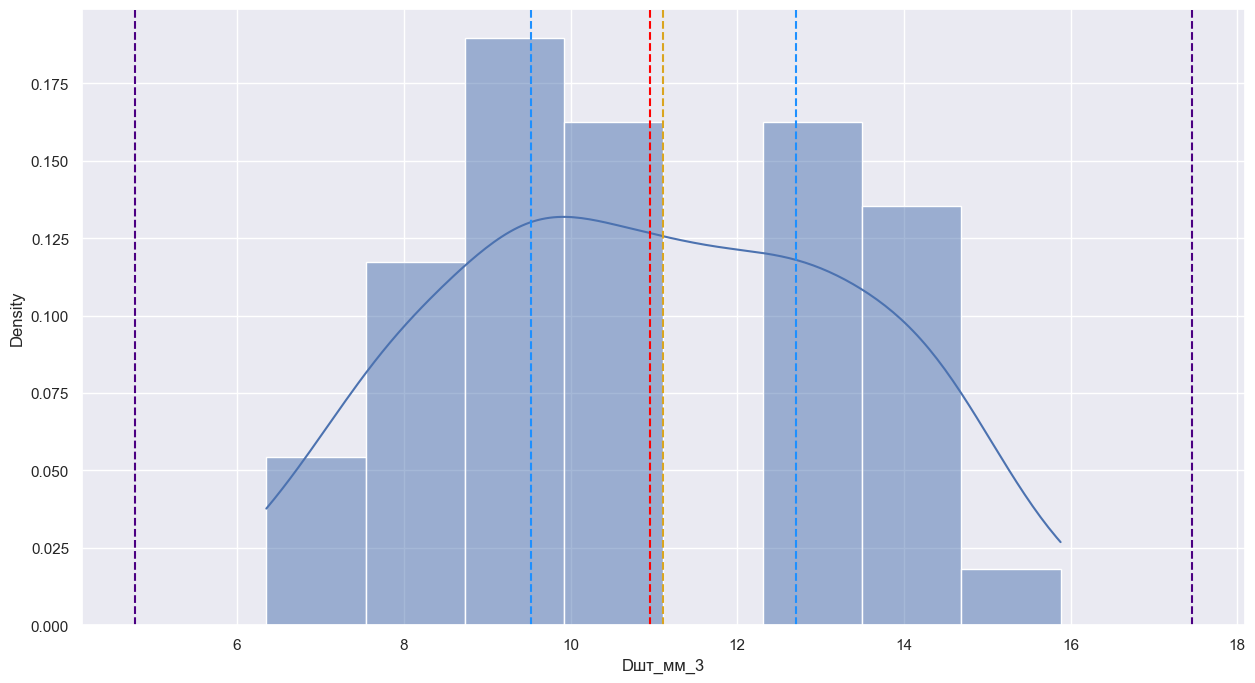

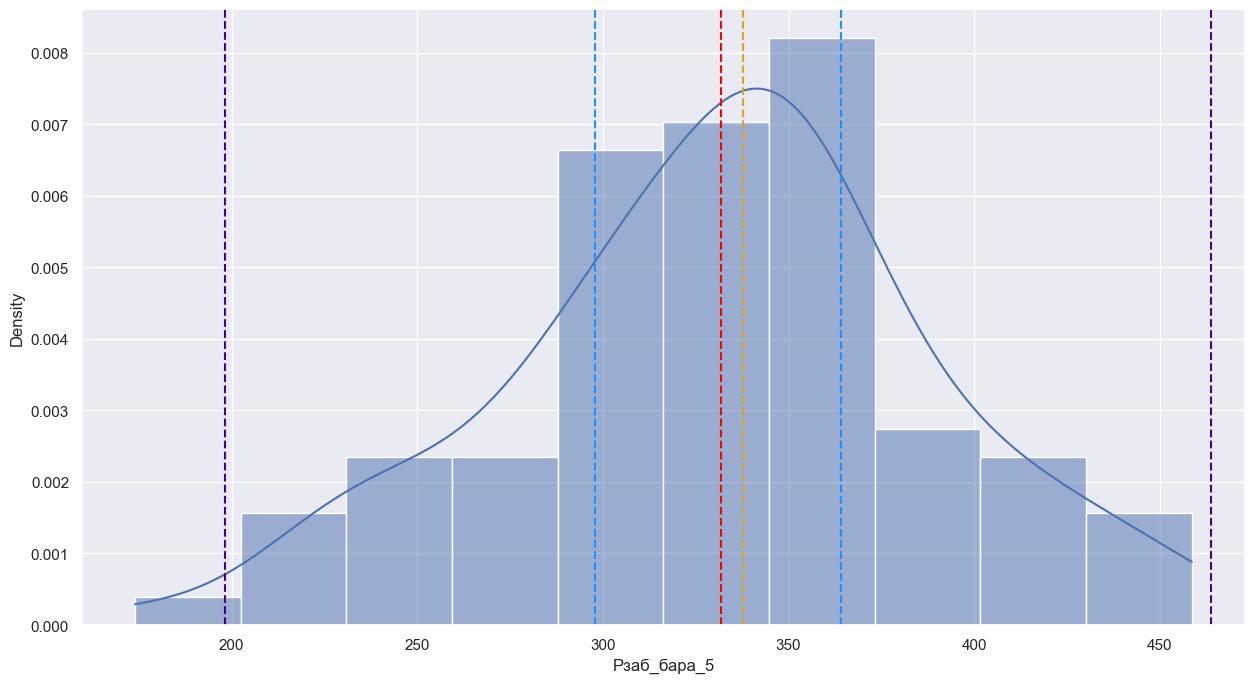

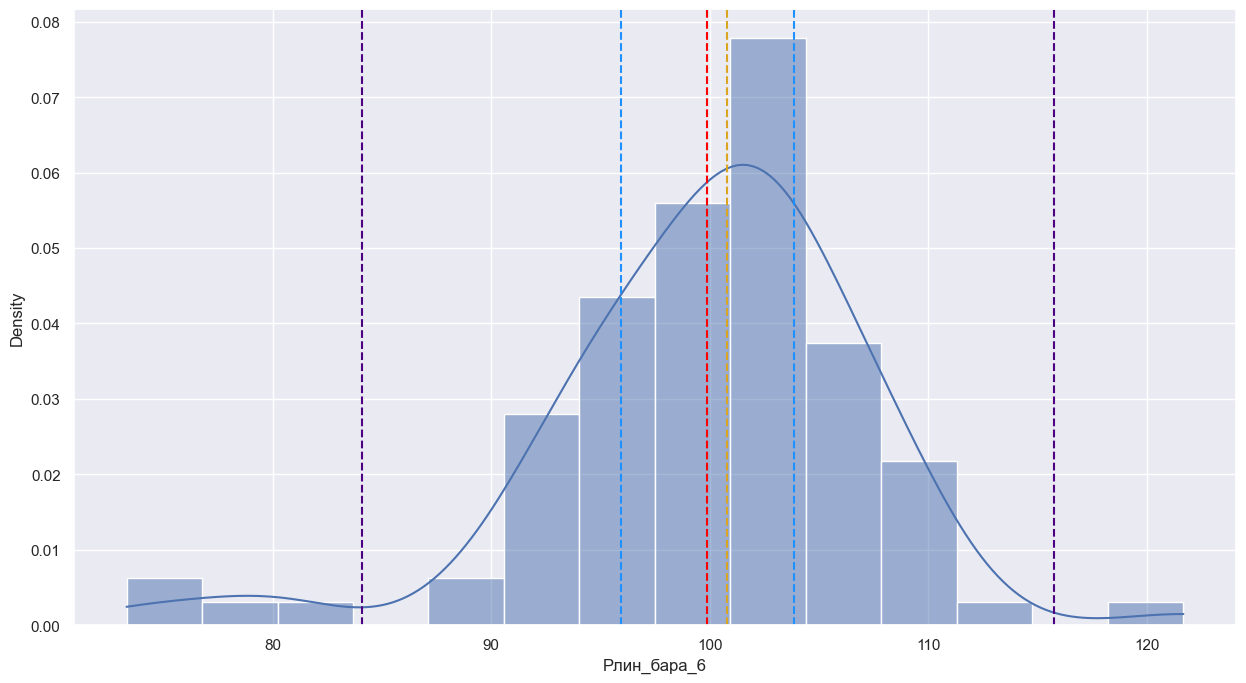

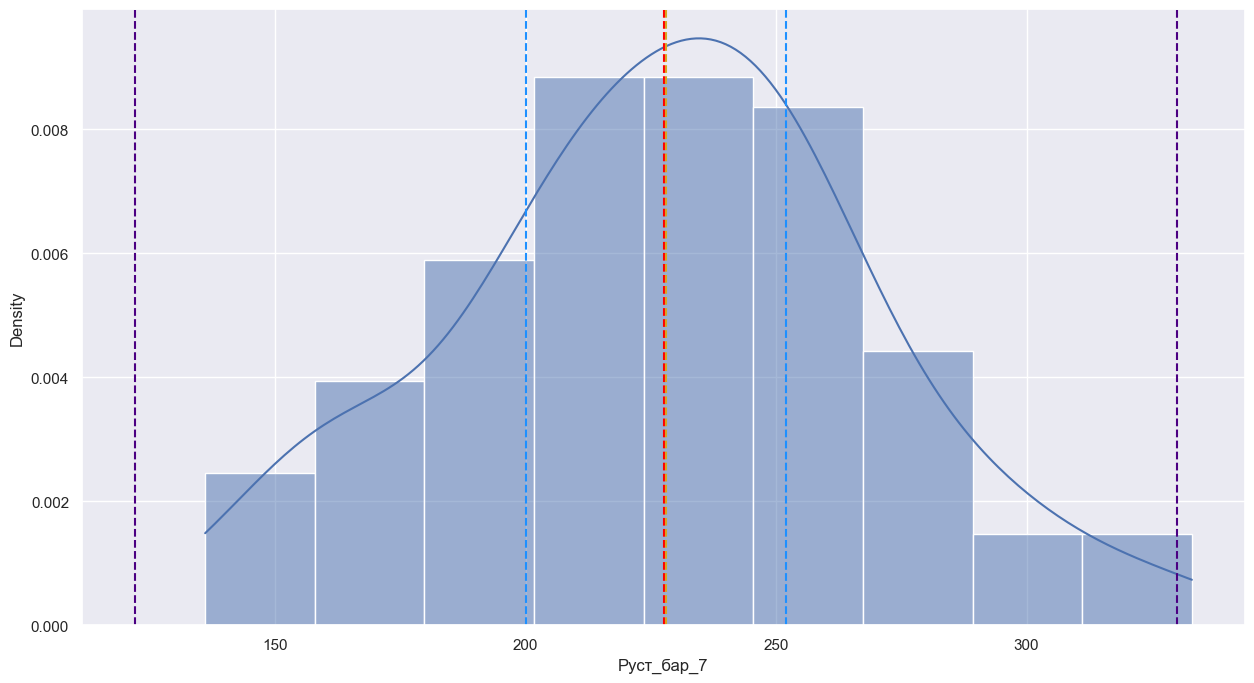

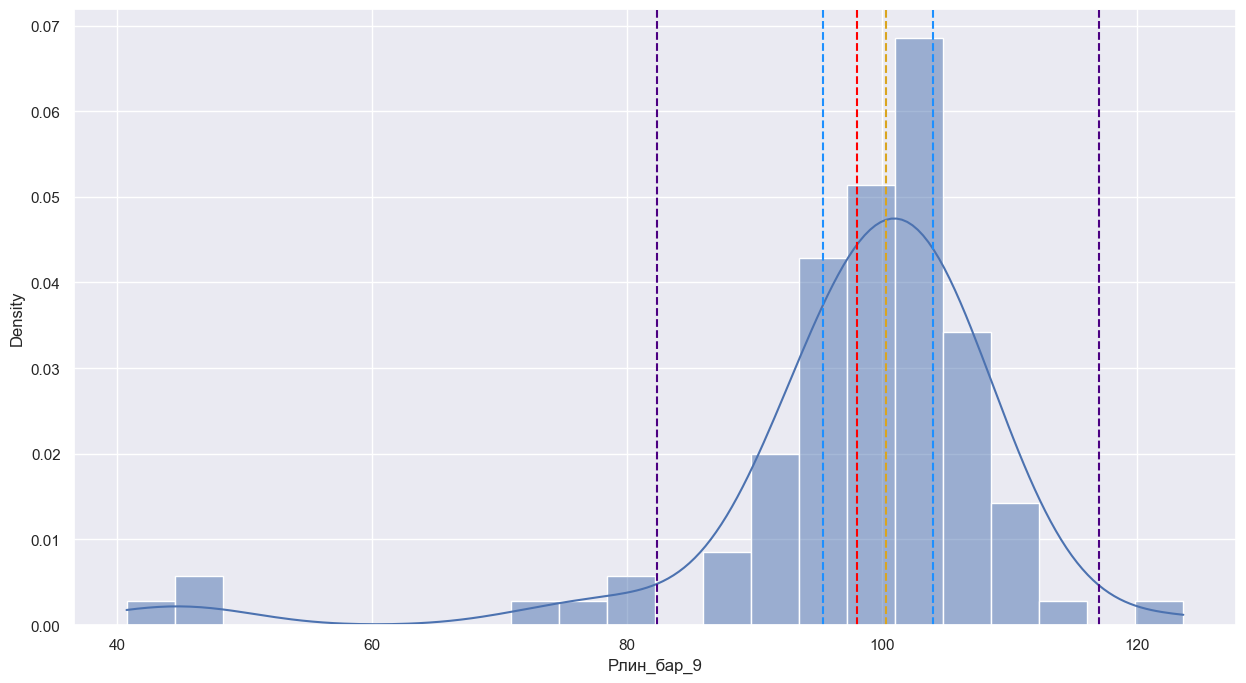

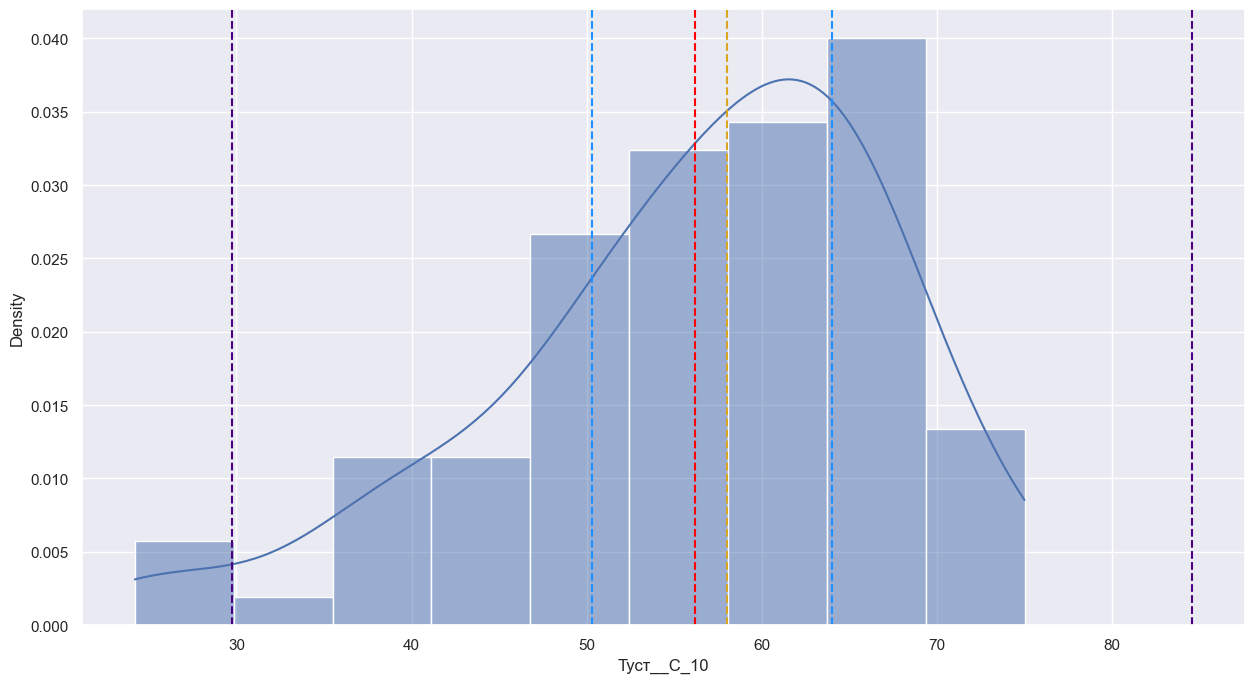

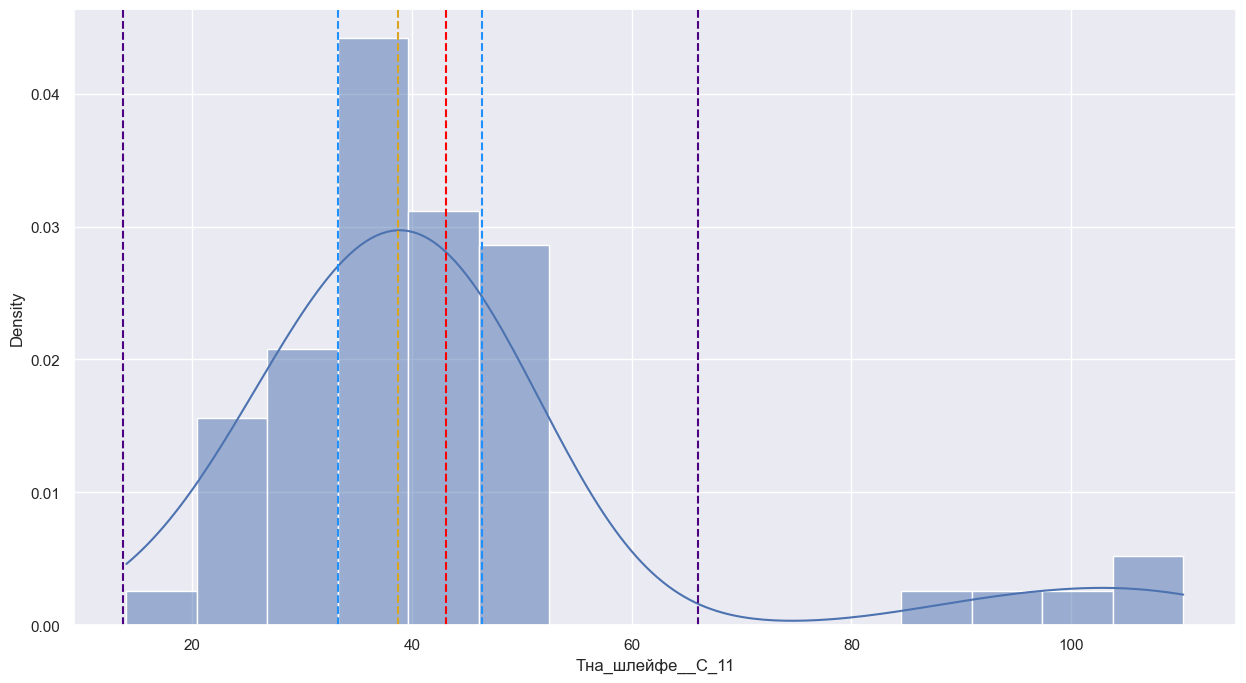

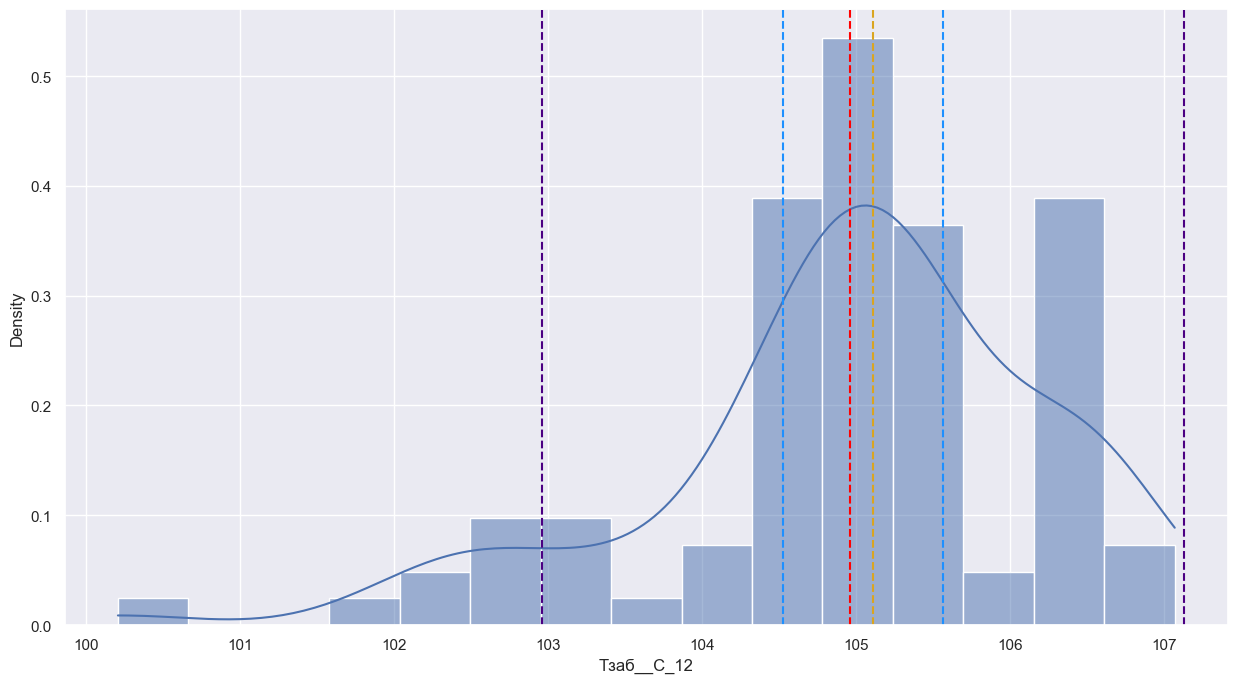

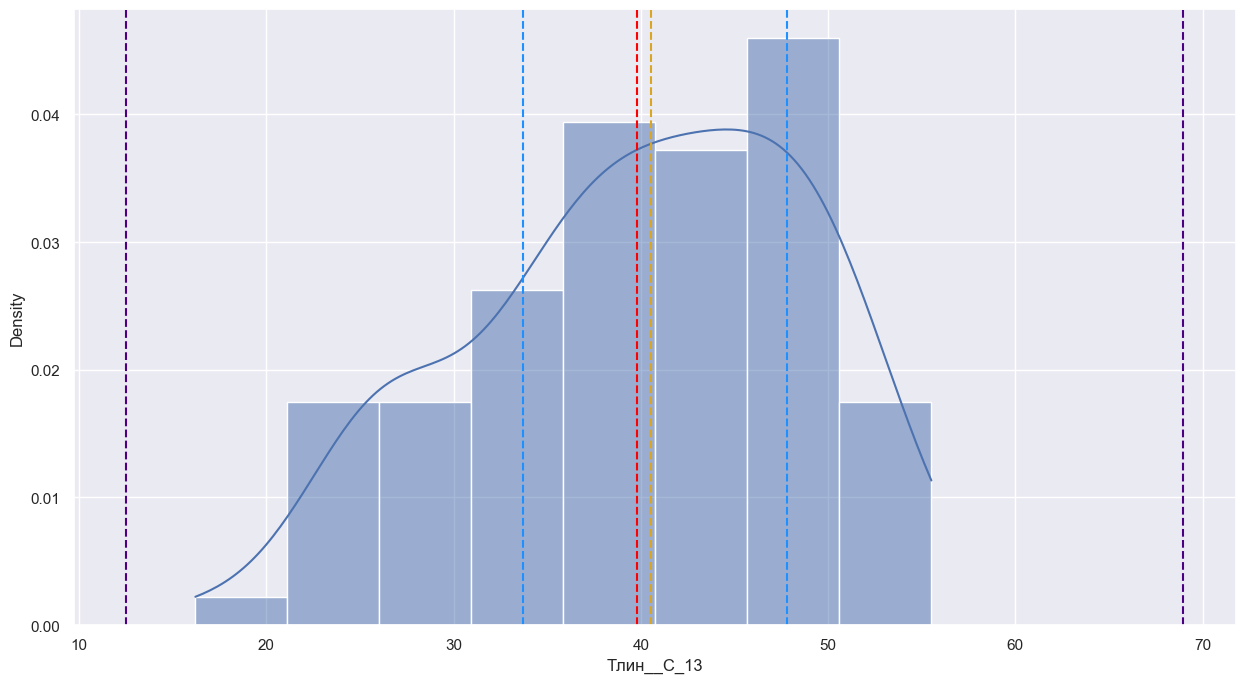

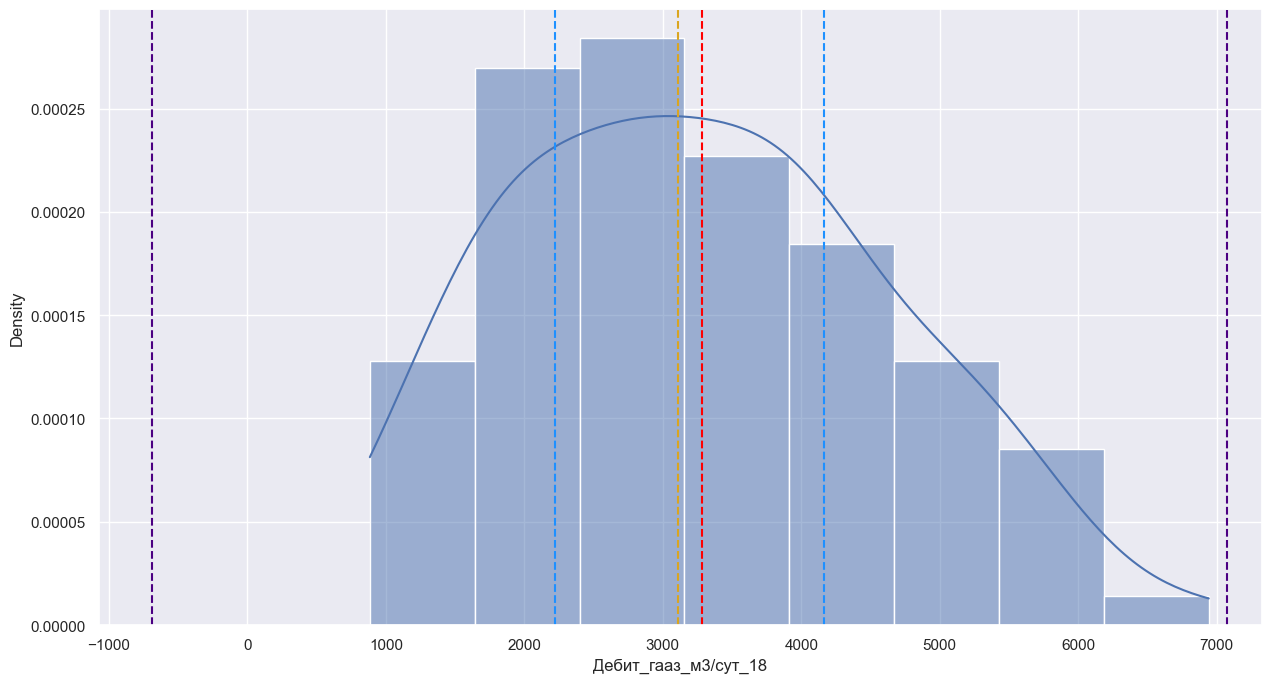

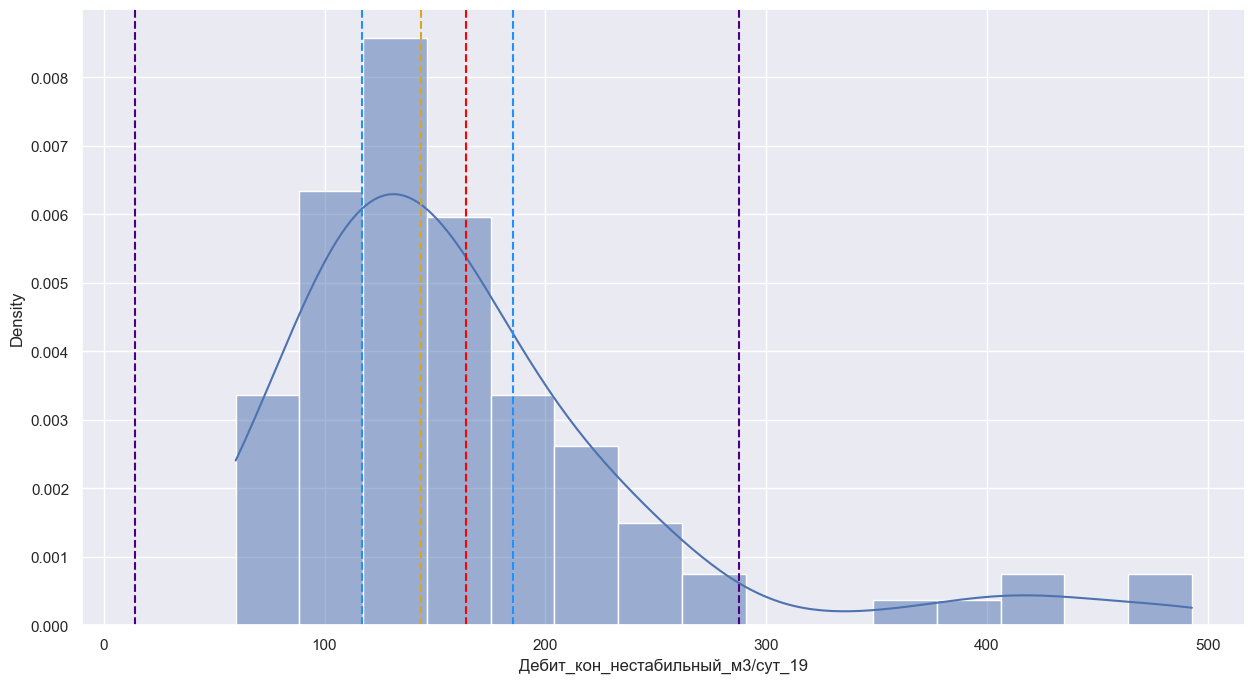

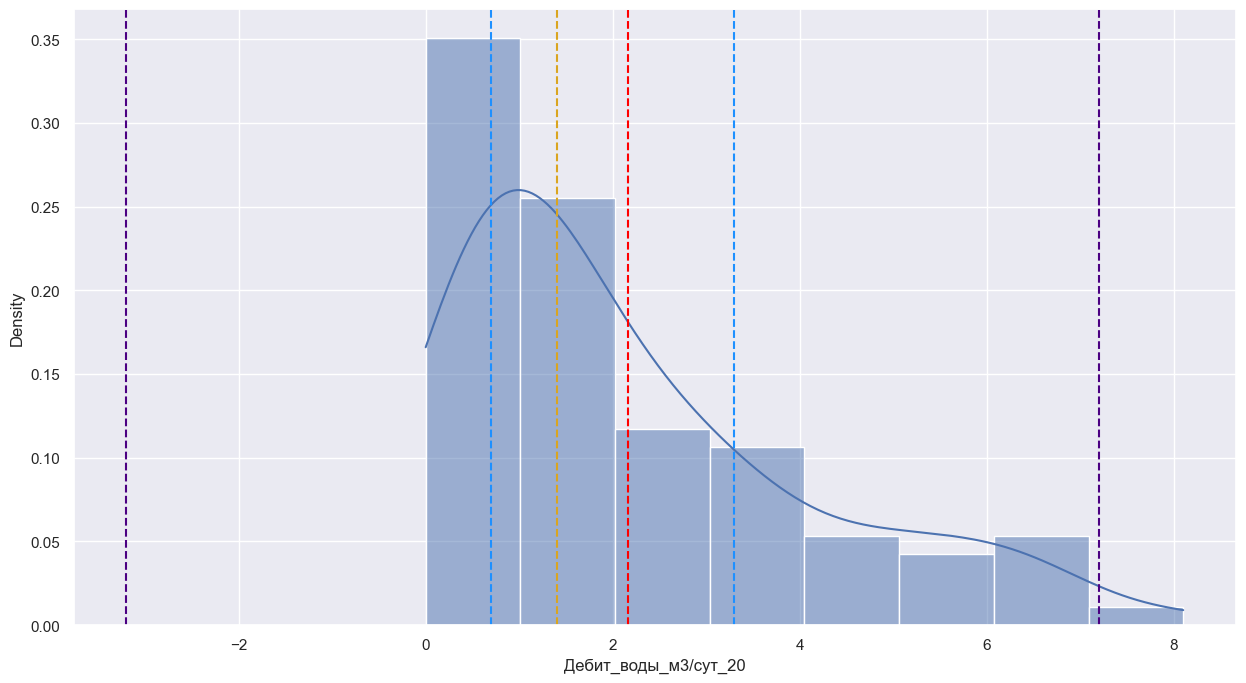

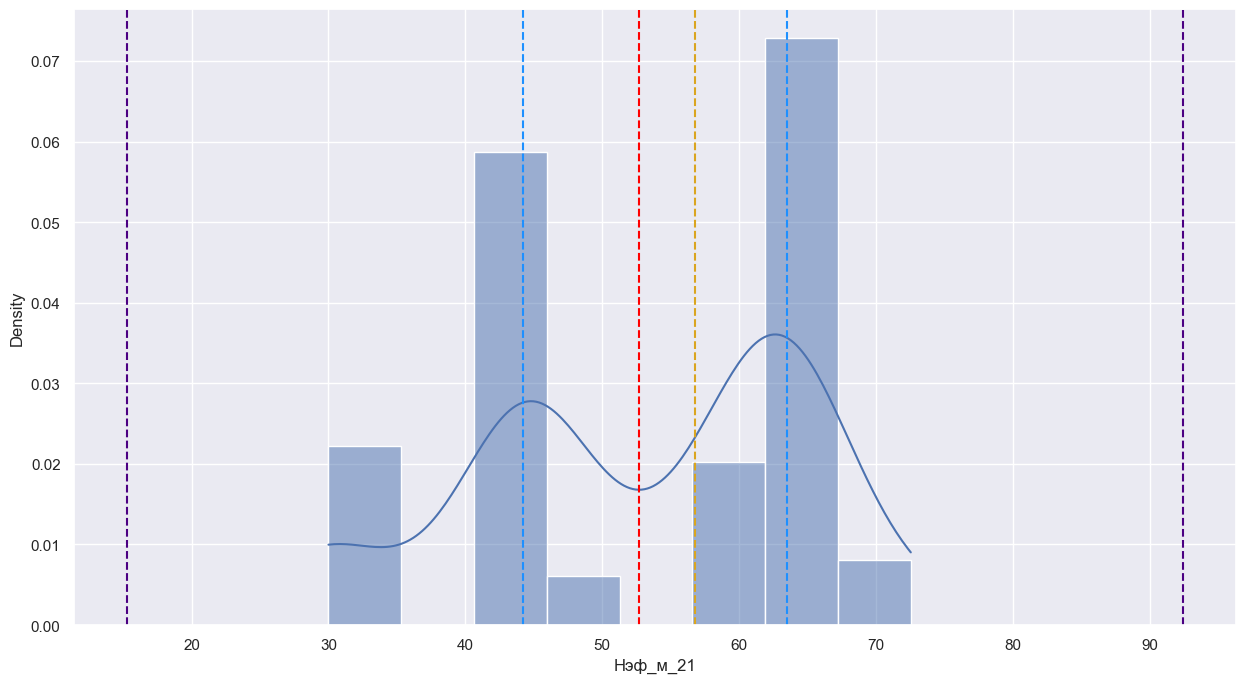

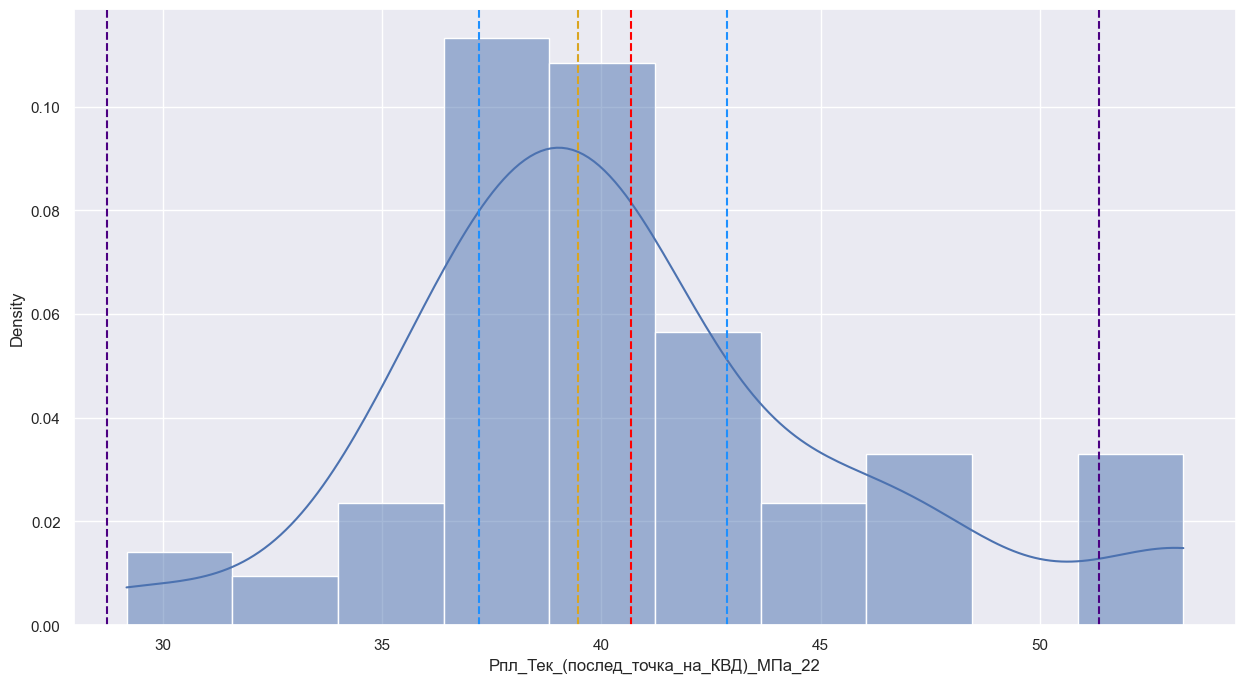

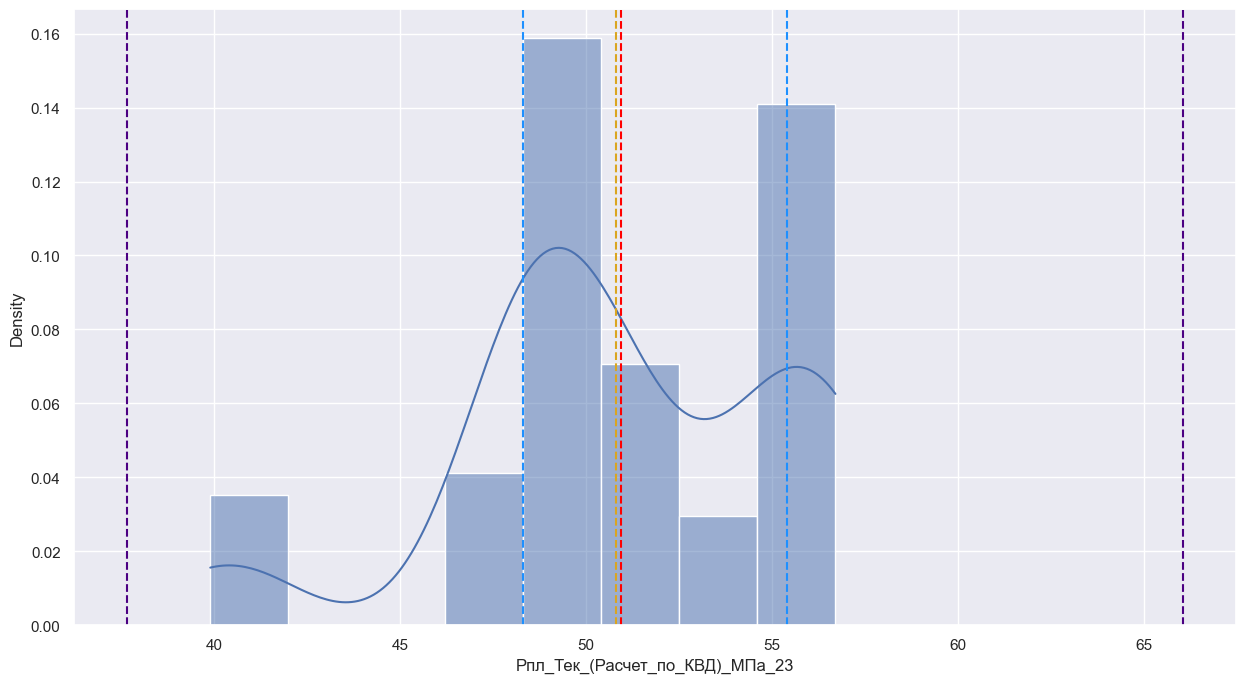

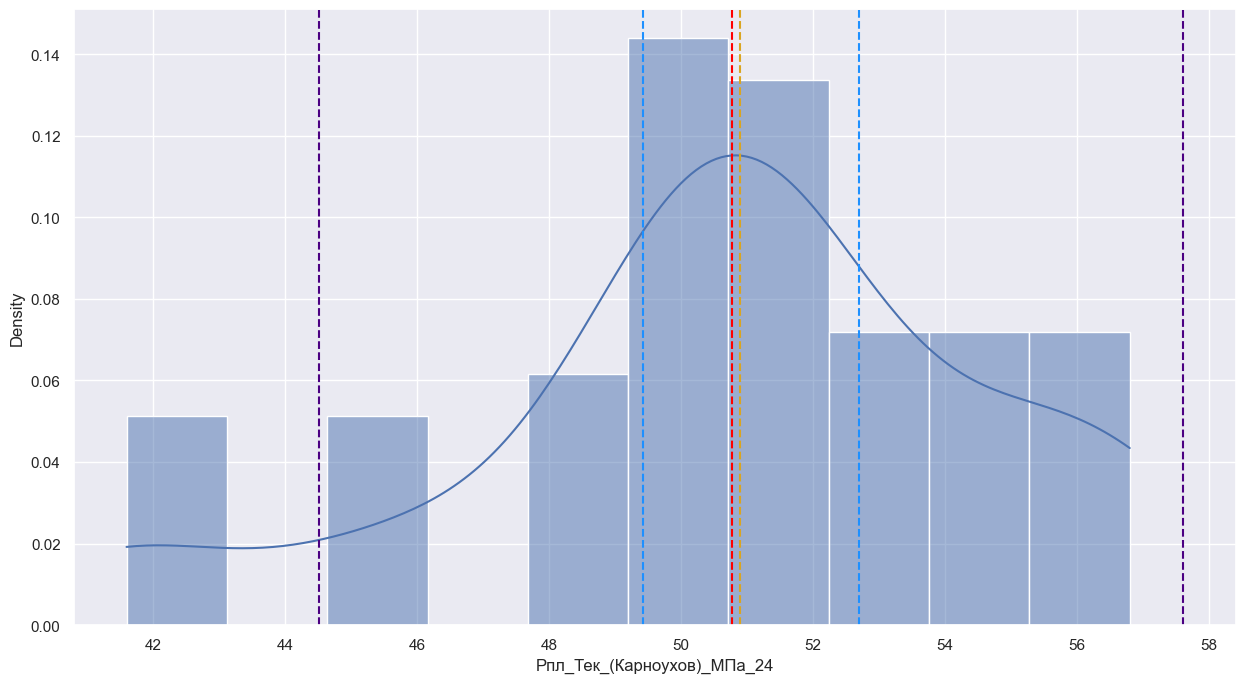

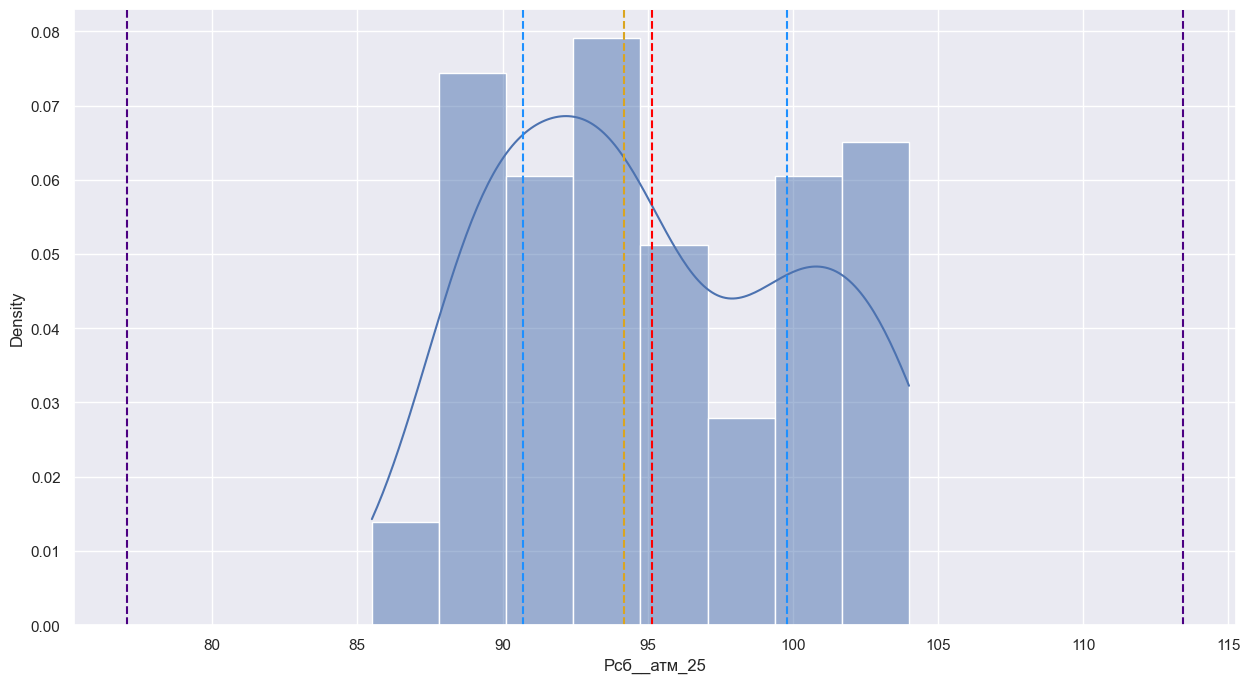

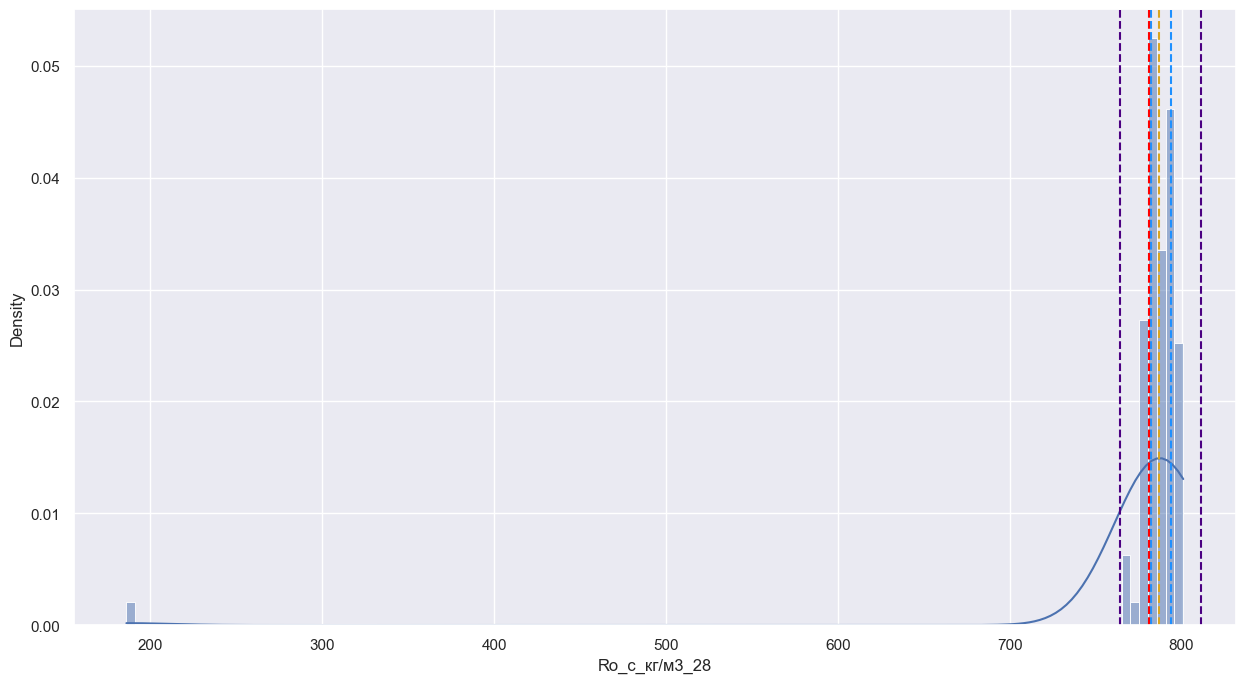

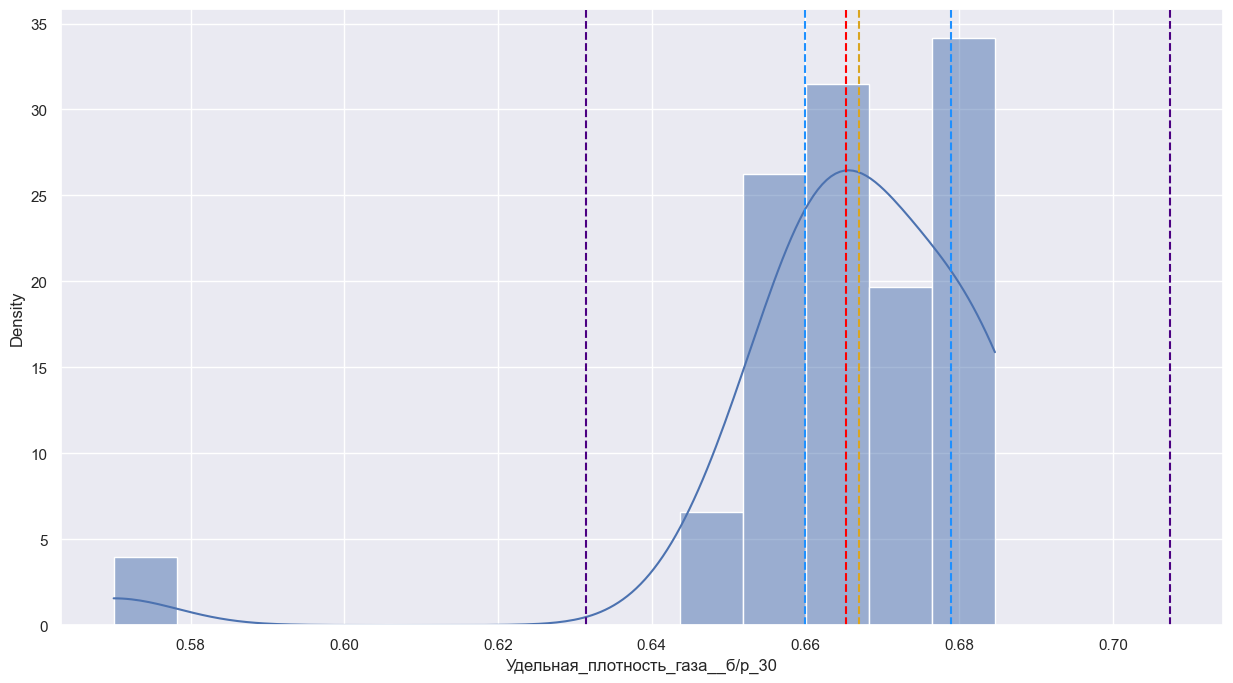

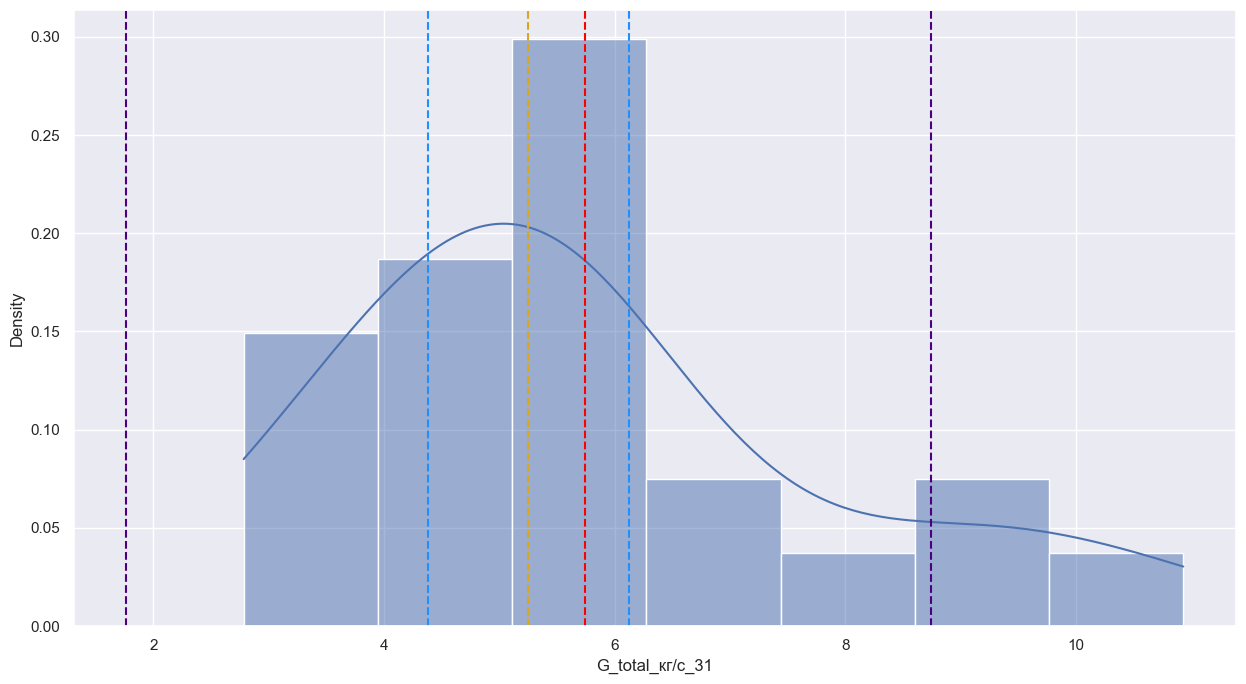

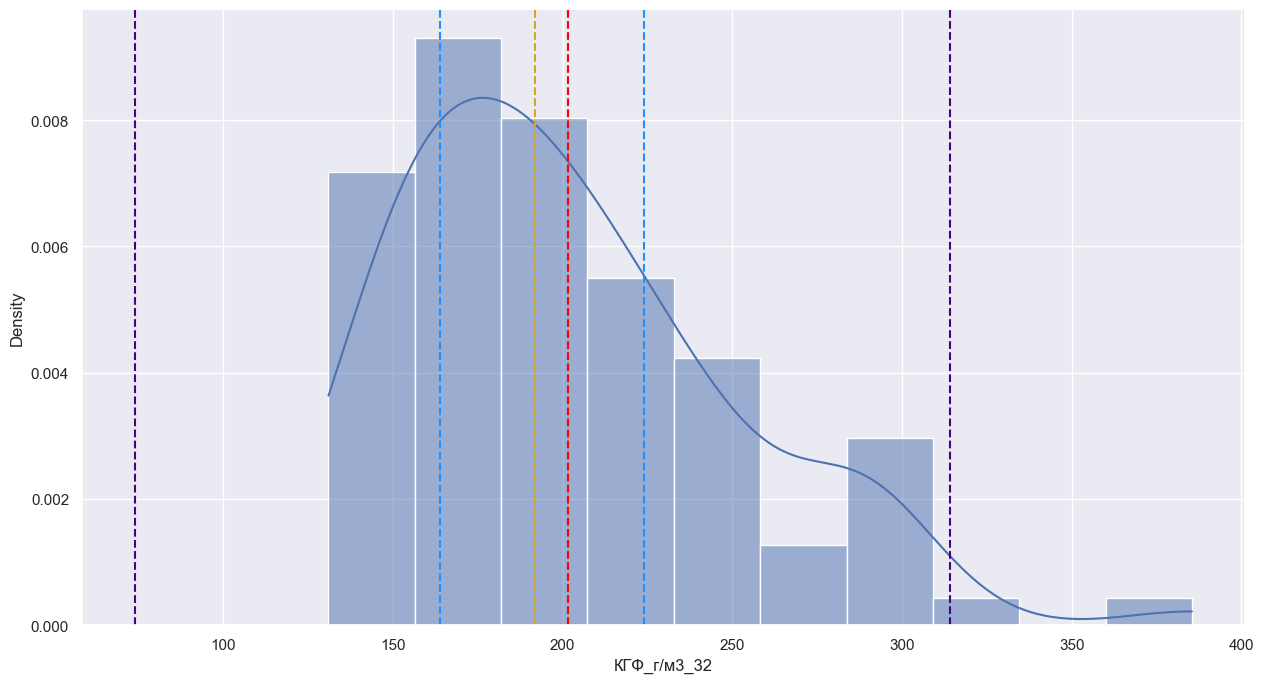

In [97]:
show_statistics(df_no_nans)

Рассматриваем датасет, в котором почищены выбросы, но оставлено большинство NaN

In [98]:
no_deviations_frame = stat.get_some_statistics(df_with_nans)
no_deviations_frame

Глубина_манометра_м_2    Dшт_мм_3  Руст_бара_4  \
Количество                          174.000000  178.000000   178.000000   
Процент_пропусков                     2.247191    0.000000     0.000000   
Минимум                            3276.000000    6.350000   111.100000   
Первый_квартиль                    3548.500000    9.530000   199.125000   
Среднее                            3557.176437   10.966404   228.888676   
Медиана                            3577.300000   11.110000   231.581046   
Третий_квартиль                    3652.250000   12.700000   260.229167   
Максимум                           3679.500000   17.460000   348.000000   
Стандартное_отклонение              117.388813    2.470786    49.353791   
Мощность                             36.000000   13.000000   167.000000   
Интерквартильный_размах             103.750000    3.170000    61.104167   

                         Рзаб_бара_5  Pлин_бара_6  Руст_бар_7  Рзаб_бар_8  \
Количество                174.000000   174.000000  178.000000  174.000000   
Процент_пропусков           2.247191     2.247191    0.000000    2.247191   
Минимум                   169.250000    73.306638  109.000000  160.000000   
Первый_квартиль           294.070543    95.580095  199.125000  292.475000   
Среднее                   329.383364    99.205197  228.026331  327.167883   
Медиана                   337.789172    99.950648  230.000000  334.400000   
Третий_квартиль           371.459299   103.187059  259.000000  371.459299   
Максимум                  458.600000   121.682930  348.000000  458.500000   
Стандартное_отклонение     64.109654     6.373613   49.380570   65.172952   
Мощность                  171.000000   172.000000  133.000000  165.000000   
Интерквартильный_размах    77.388756     7.606964   59.875000   78.984299   

                         Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  ...  \
Количество               174.000000  178.000000        123.000000  ...   
Процент_пропусков          2.247191    0.000000         30.898876  ...   
Минимум                   40.739839   24.200000         14.000000  ...   
Первый_квартиль           94.431548   48.125000         32.050000  ...   
Среднее                   98.147579   55.219101         40.335772  ...   
Медиана                   99.400000   56.350000         38.500000  ...   
Третий_квартиль          103.487823   64.000000         46.100000  ...   
Максимум                 123.616800   75.000000        110.200000  ...   
Стандартное_отклонение     9.800728   11.024317         15.322736  ...   
Мощность                 168.000000   91.000000        102.000000  ...   
Интерквартильный_размах    9.056274   15.875000         14.050000  ...   

                           Нэф_м_21  Рпл_Тек_(послед_точка_на_КВД)_МПа_22  \
Количество               178.000000                            170.000000   
Процент_пропусков          0.000000                              4.494382   
Минимум                   22.100000                             23.780000   
Первый_квартиль           43.000000                             36.960000   
Среднее                   48.607142                             39.829018   
Медиана                   45.400000                             39.440000   
Третий_квартиль           62.572400                             42.980000   
Максимум                  72.539800                             53.270000   
Стандартное_отклонение    12.549434                              5.356033   
Мощность                  25.000000                             37.000000   
Интерквартильный_размах   19.572400                              6.020000   

                         Рпл_Тек_(Расчет_по_КВД)_МПа_23  \
Количество                                   151.000000   
Процент_пропусков                             15.168539   
Минимум                                       34.000000   
Первый_квартиль                               48.100000   
Среднее                                       51.226744   
Медиана                        

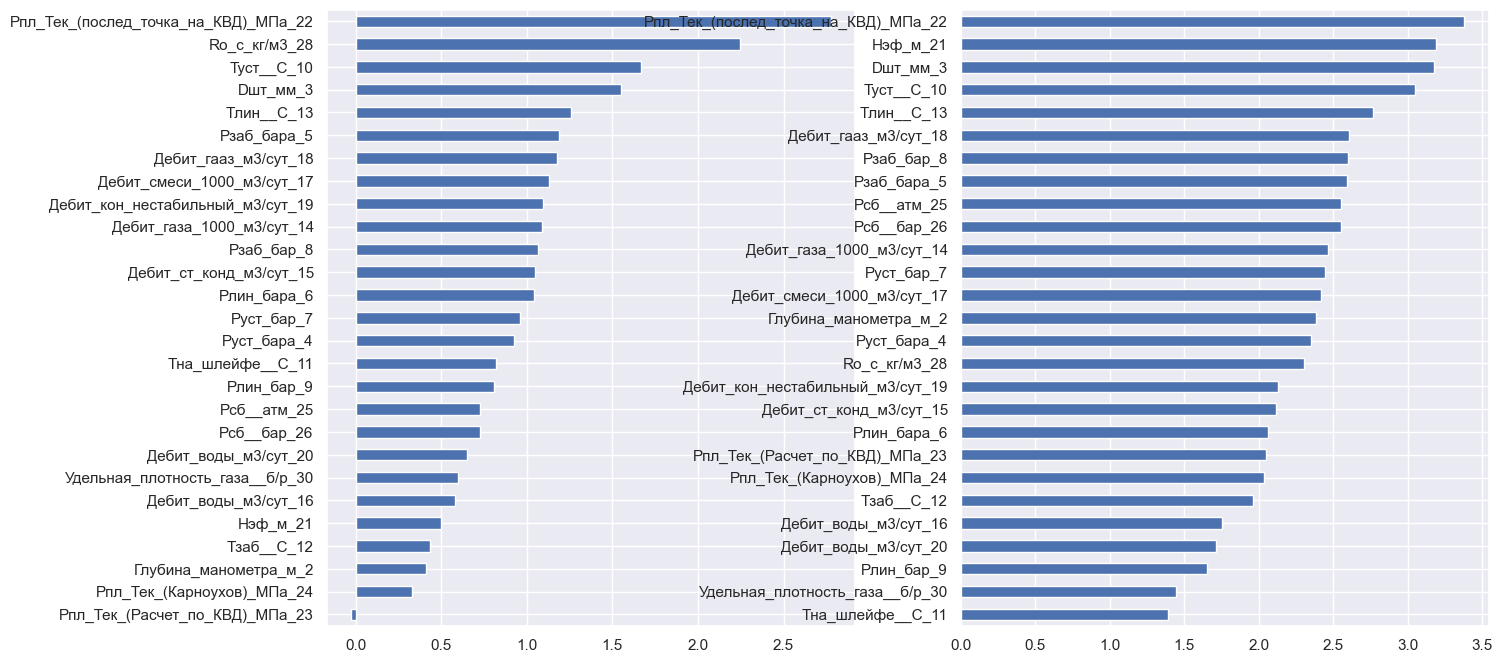

In [99]:
fig1, axs = plt.subplots(1, 2)
G_feature_importance = gr.data_set_gain_ratio(df_with_nans, df_with_nans.columns[-2], 2)
G_feature_importance.sort_values(inplace=True)
G_feature_importance.plot(kind='barh', ax=axs[0])
K_feature_importance = gr.data_set_gain_ratio(df_with_nans, df_with_nans.columns[-1], 2)
K_feature_importance.sort_values(inplace=True)
K_feature_importance.plot(kind='barh', ax=axs[1])
#for ax in axs.flat:
#    ax.label_outer()
plt.show()

<Axes: >

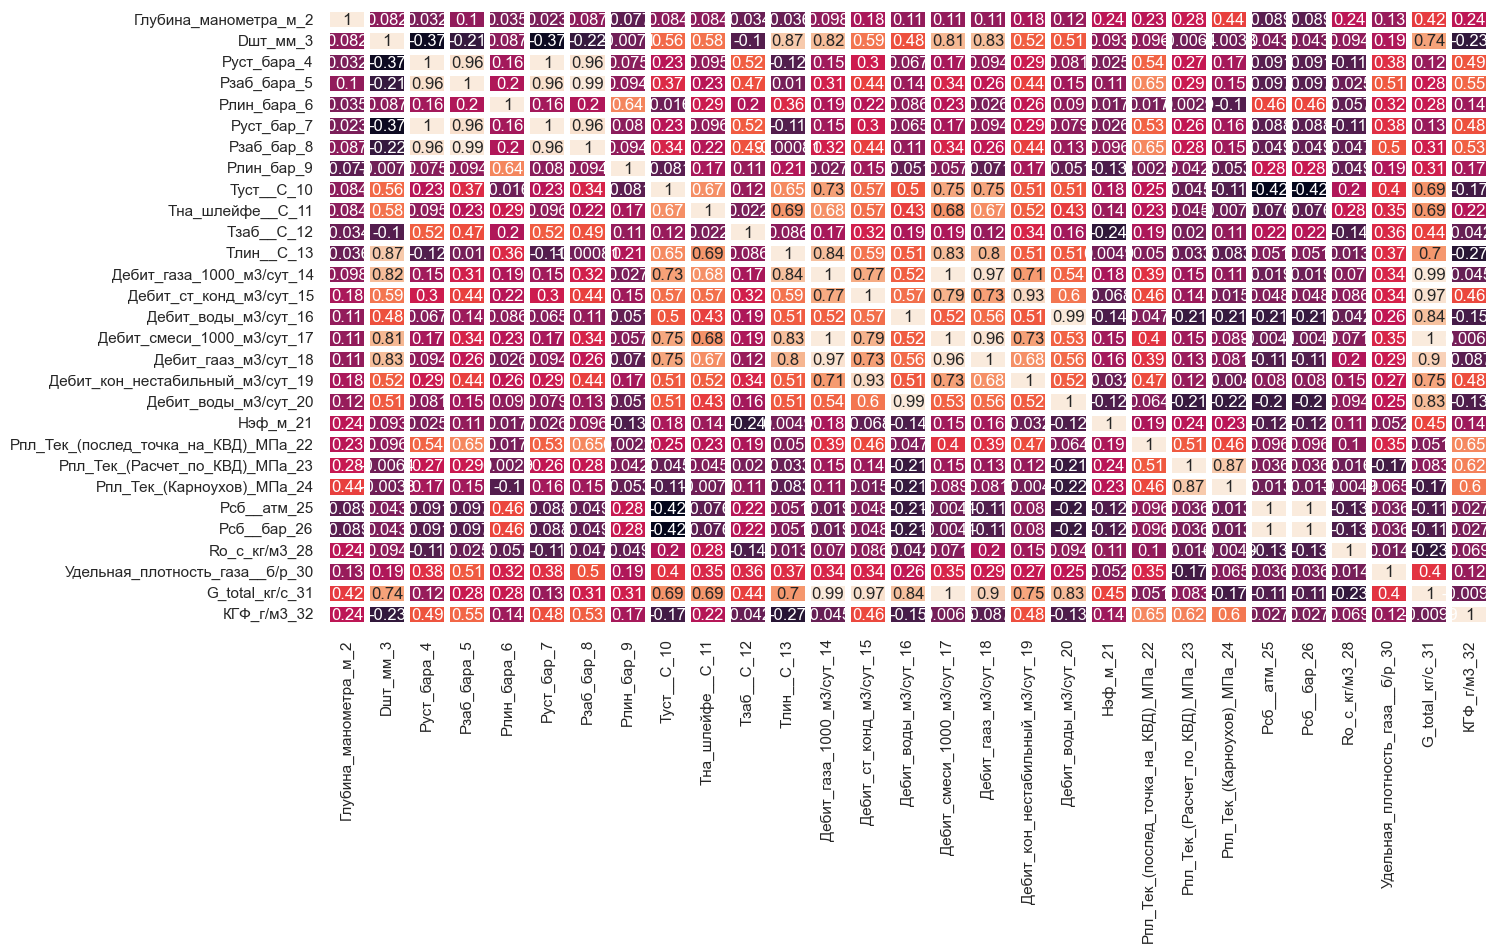

In [100]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_with_nans.corr(), annot=True, linewidths=3, cbar=False)

Ищем сильно (> 0.95) коррелирующие величины:
<ul>
    <li> Руст_бара_4 и <b> Рзаб_бара_5 </b> (0.96) </li>
    <li> Руст_бара_4 и Руст_бар_7 (1) </li>
    <li> Руст_бара_4 и Рзаб_бар_8 (0.96) </li>
    <li> <b> Рзаб_бара_5 </b> и Руст_бар_7 (0.96) </li>
    <li> <b> Рзаб_бара_5 </b> и Рзаб_бар_8 (0.99) </li>
    <li> Руст_бар_7 и Рзаб_бар_8 (0.96) </li>
    <li> Дебит_газа_1000_м3/сут_14 и Дебит_смеси_1000_м3/сут_17 (1) </li>
    <li> Дебит_газа_1000_м3/сут_14 и <b> Дебит_гааз_м3/сут_18 </b> (0.97) </li>
    <li> Дебит_газа_1000_м3/сут_14 и <b> G_total_кг/с_31 </b> (0.99) </li>
    <li> Дебит_ст._конд._м3/сут_15 и <b> G_total_кг/с_31 </b> (0.97) </li>
    <li> <b> Дебит_воды_м3/сут_16 </b> и Дебит_воды_м3/сут_20 (0.98) </li>
    <li> Дебит_смеси_1000_м3/сут_17 и <b> Дебит_гааз_м3/сут_18 </b> (0.97) </li>
    <li> Дебит_смеси_1000_м3/сут_17 и <b> G_total_кг/с_31 </b> (1) </li>
    <li> <b> Pсб__атм_25 </b> и Pсб__бар_26 (1) </li>
</ul>

In [101]:
df_with_nans = df_with_nans.drop(['Руст_бара_4', 'Руст_бар_7', 'Рзаб_бар_8', 'Дебит_газа_1000_м3/сут_14', 'Дебит_ст_конд_м3/сут_15', 'Дебит_смеси_1000_м3/сут_17', 'Дебит_воды_м3/сут_20', 'Pсб__бар_26'], axis=1)

<Axes: >

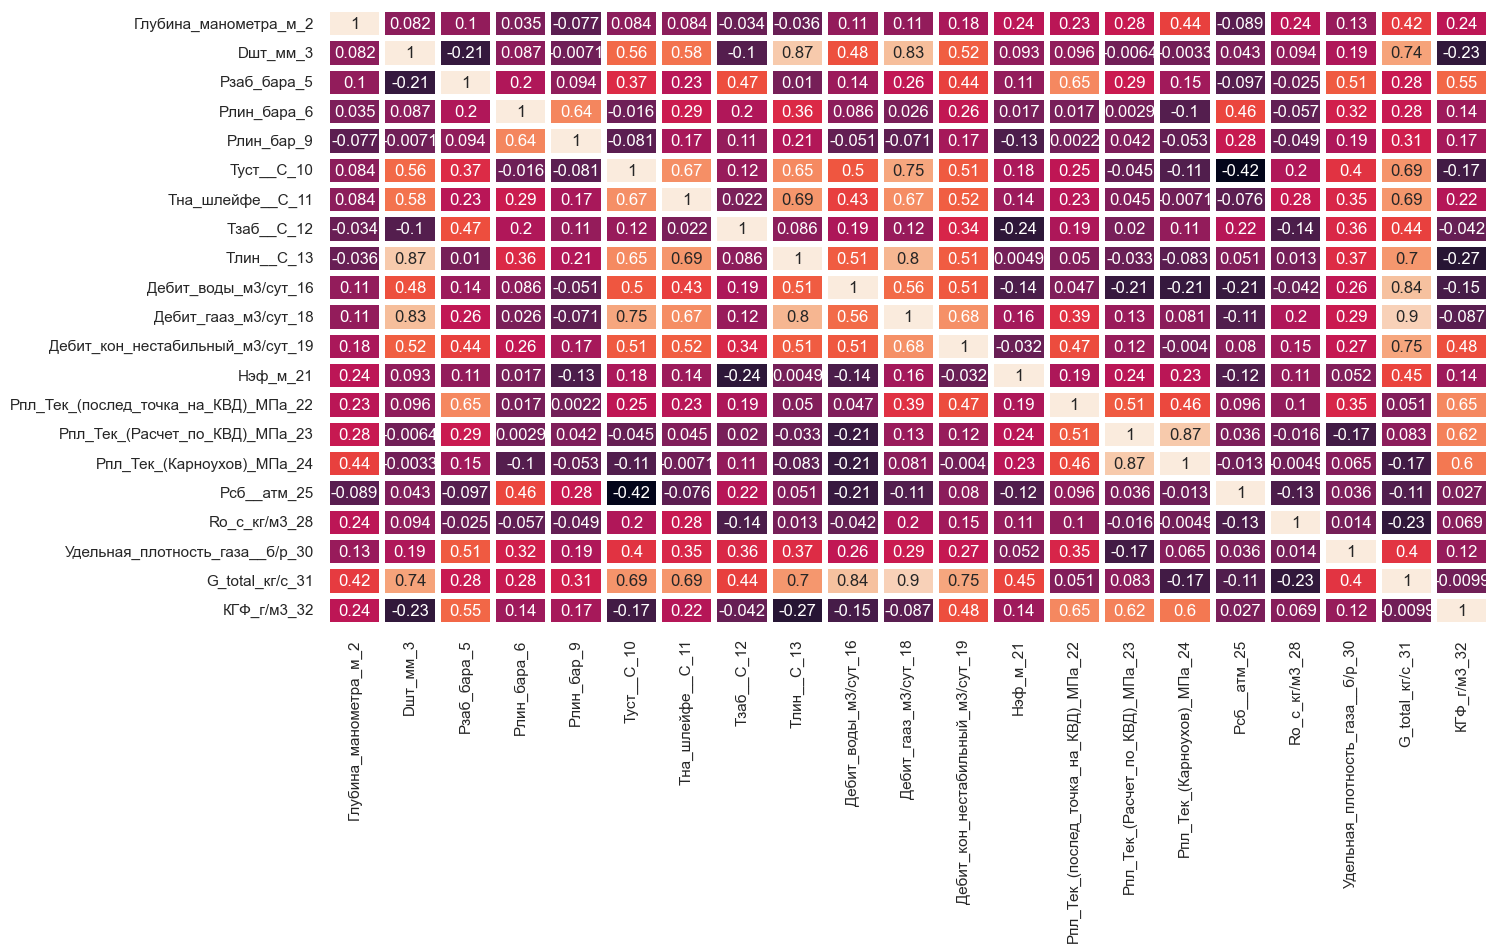

In [102]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_with_nans.corr(), annot=True, linewidths=3, cbar=False)

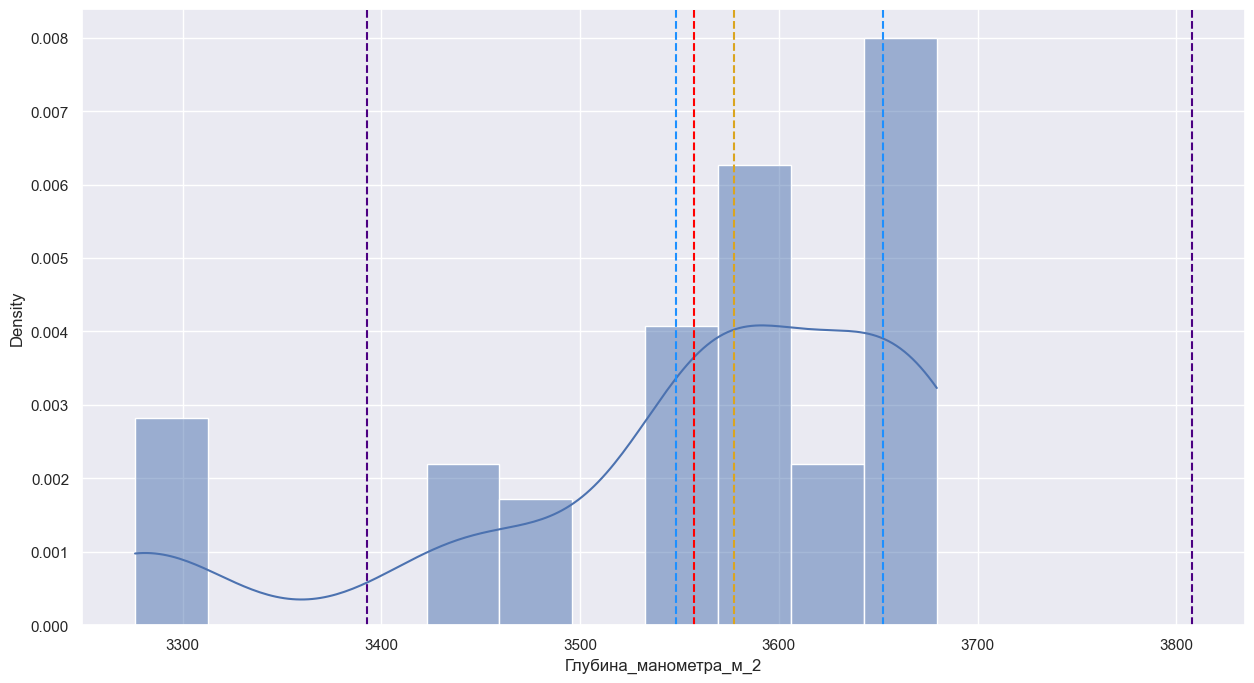

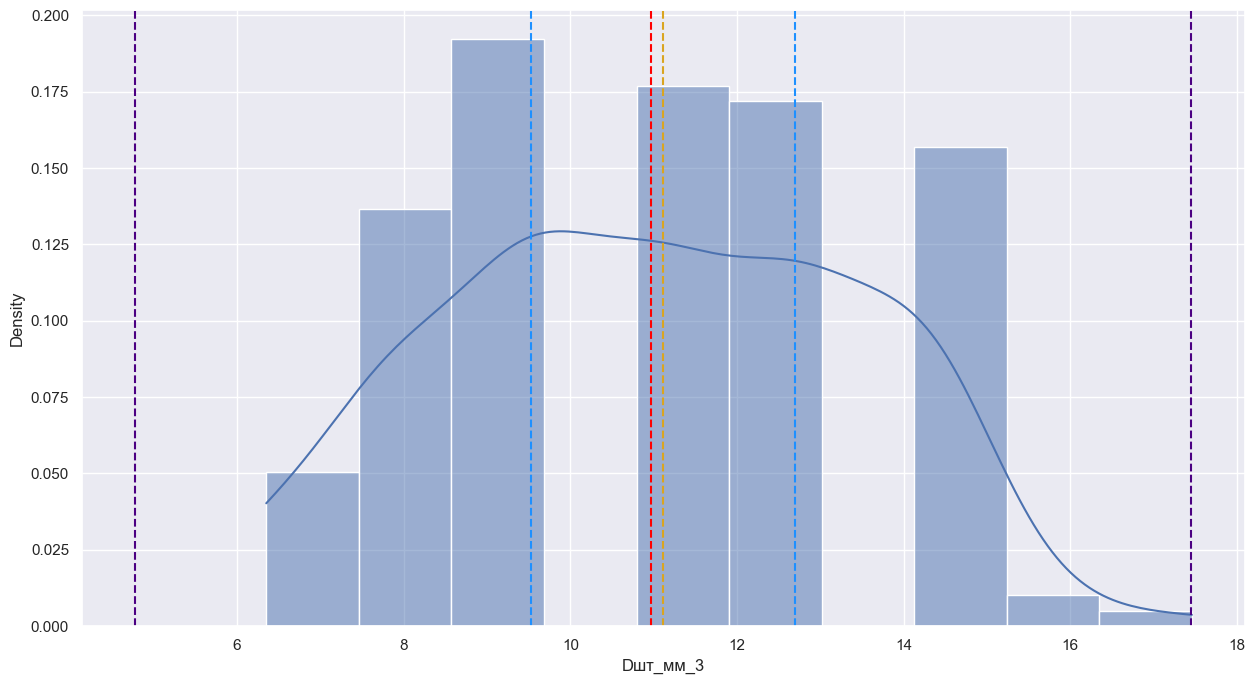

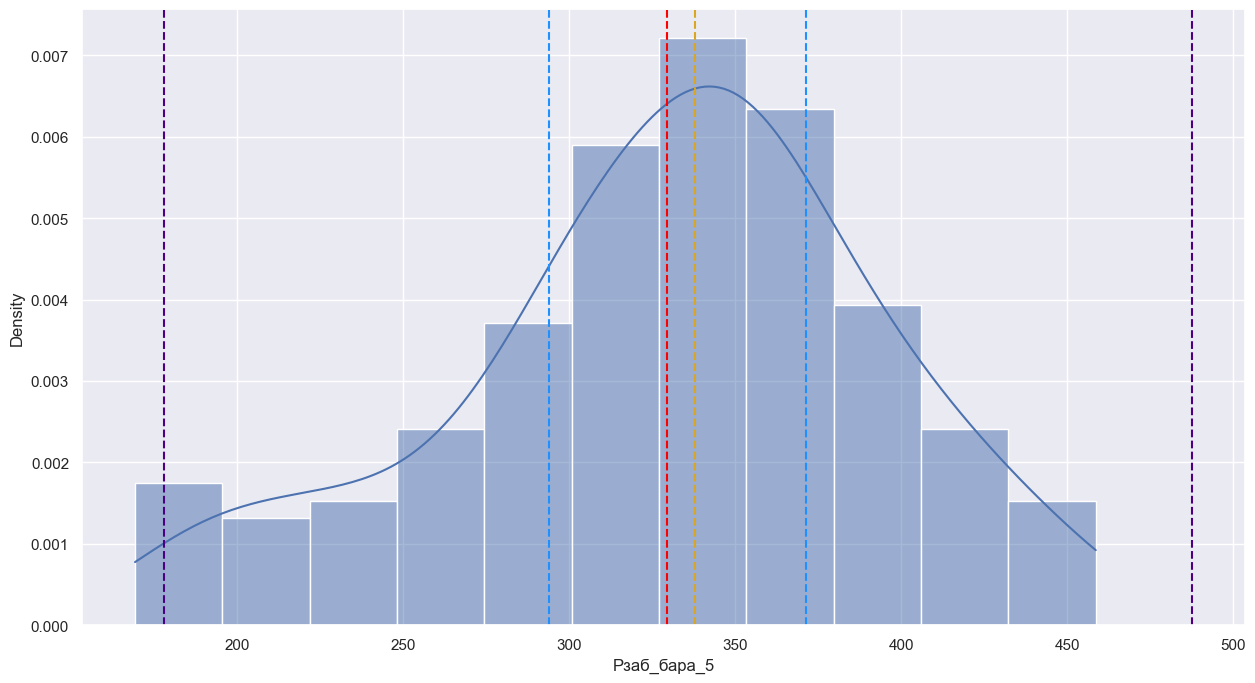

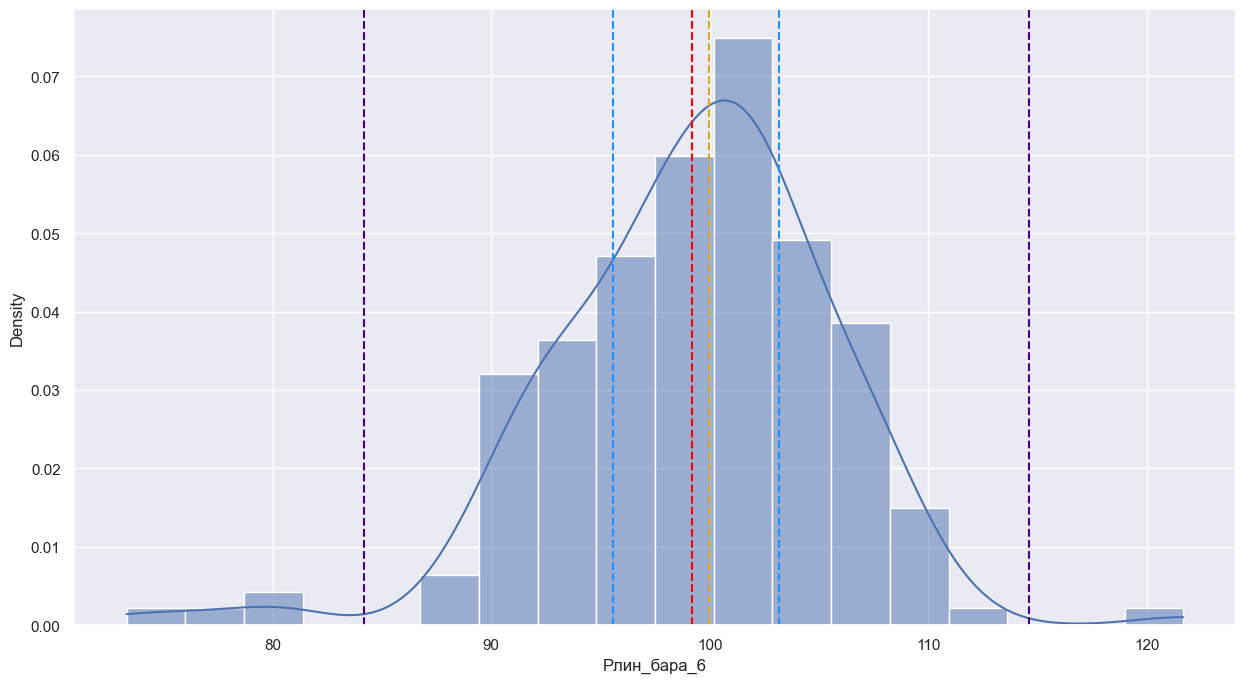

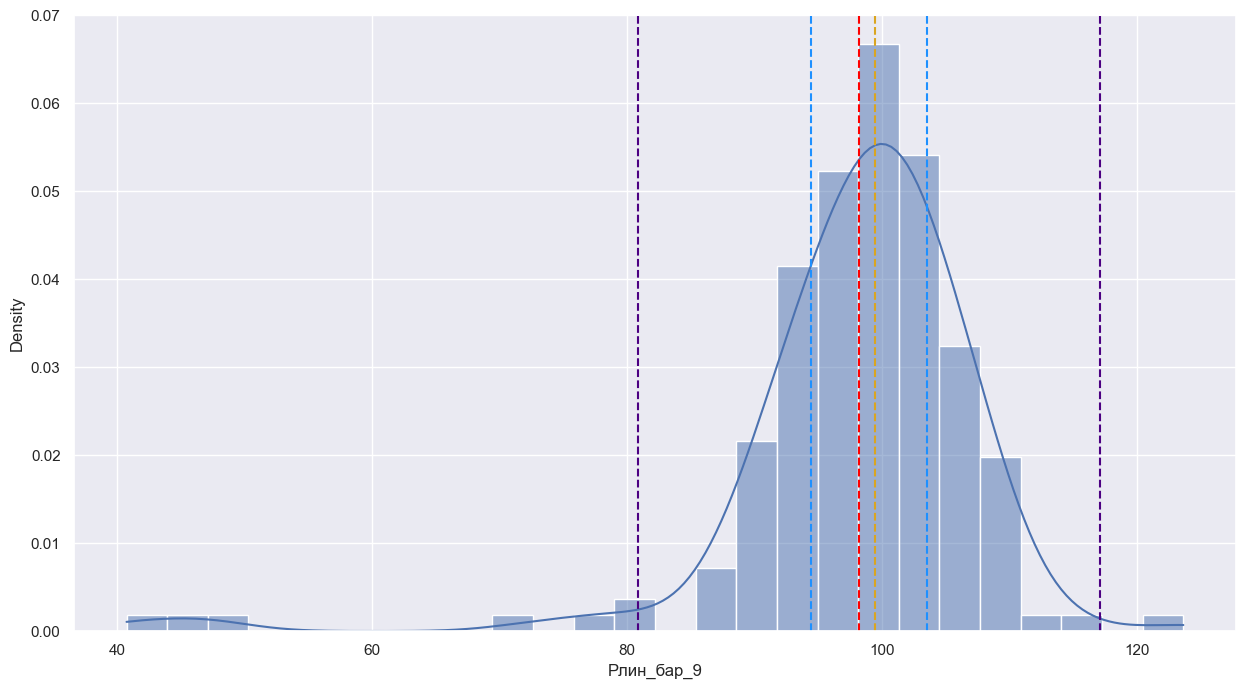

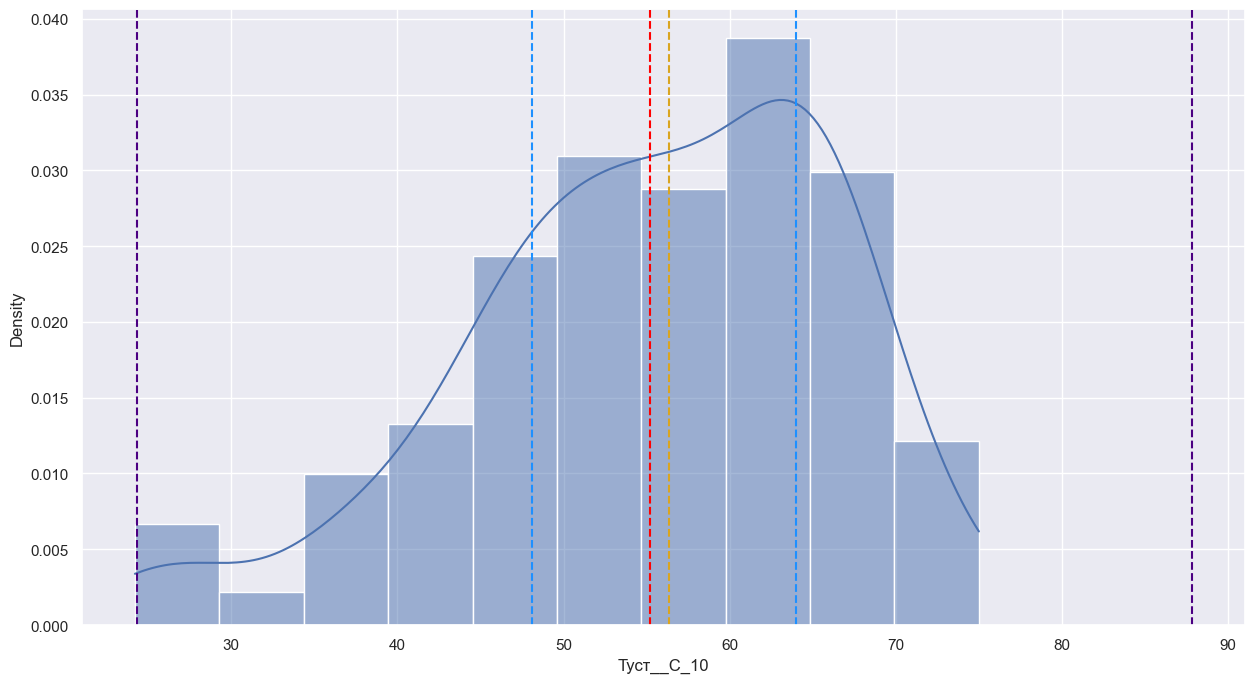

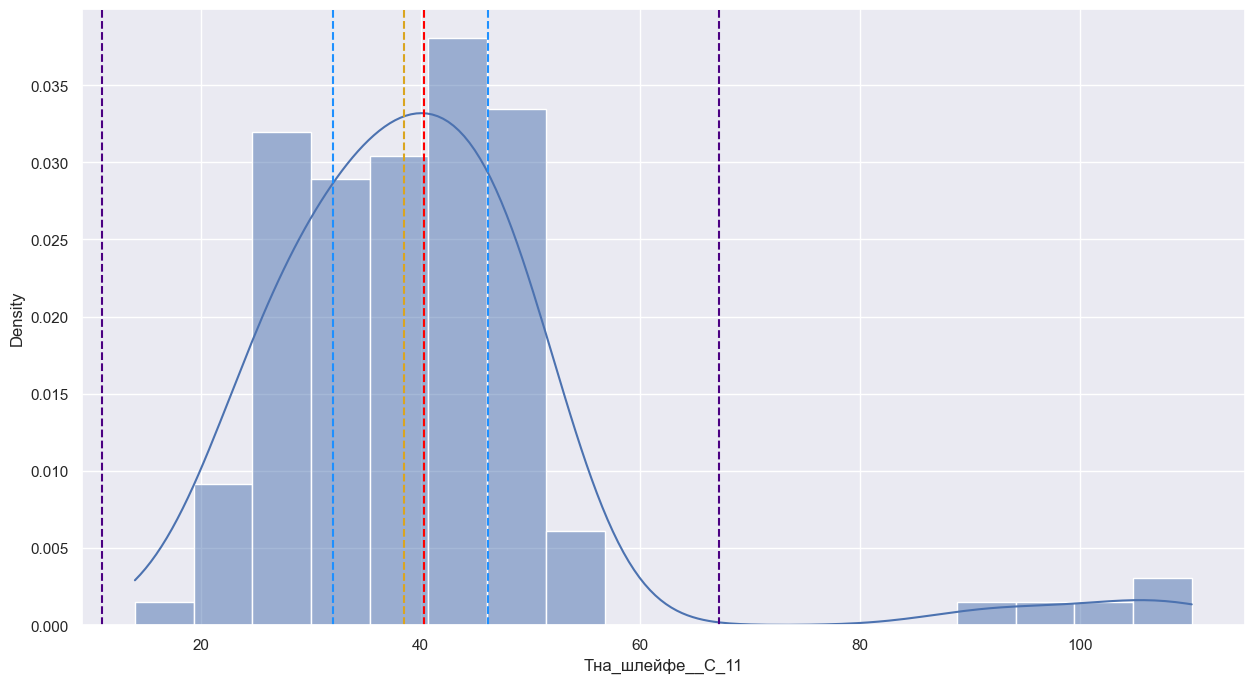

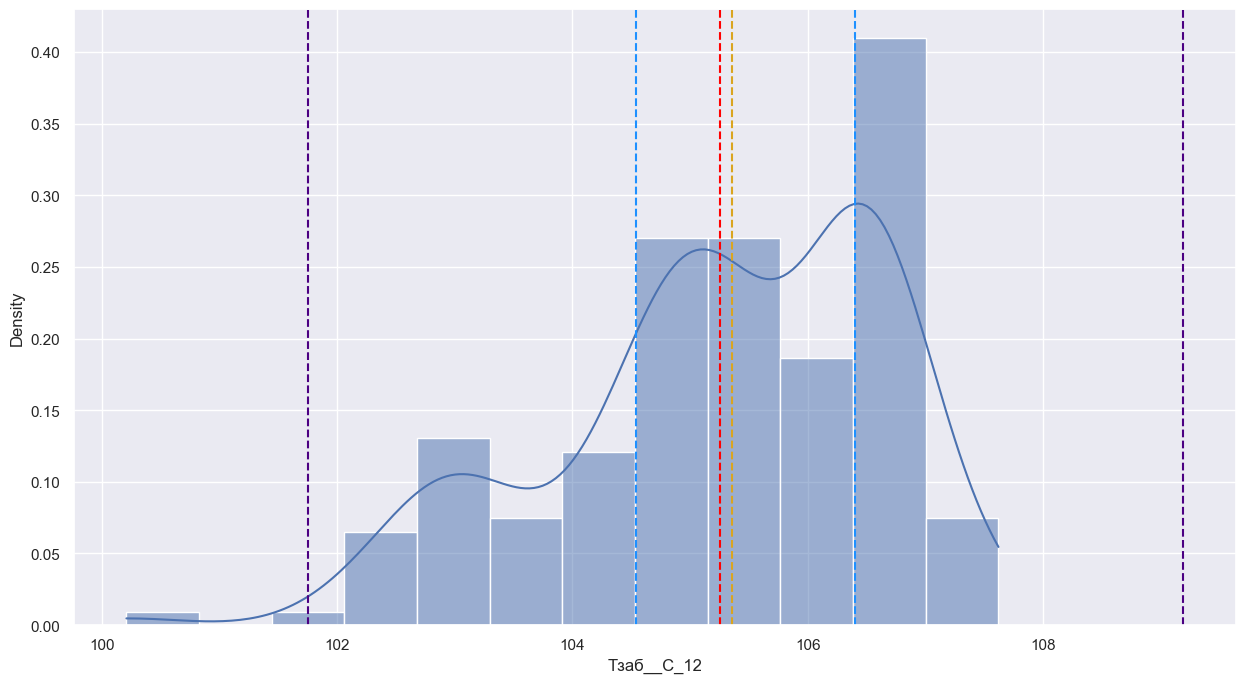

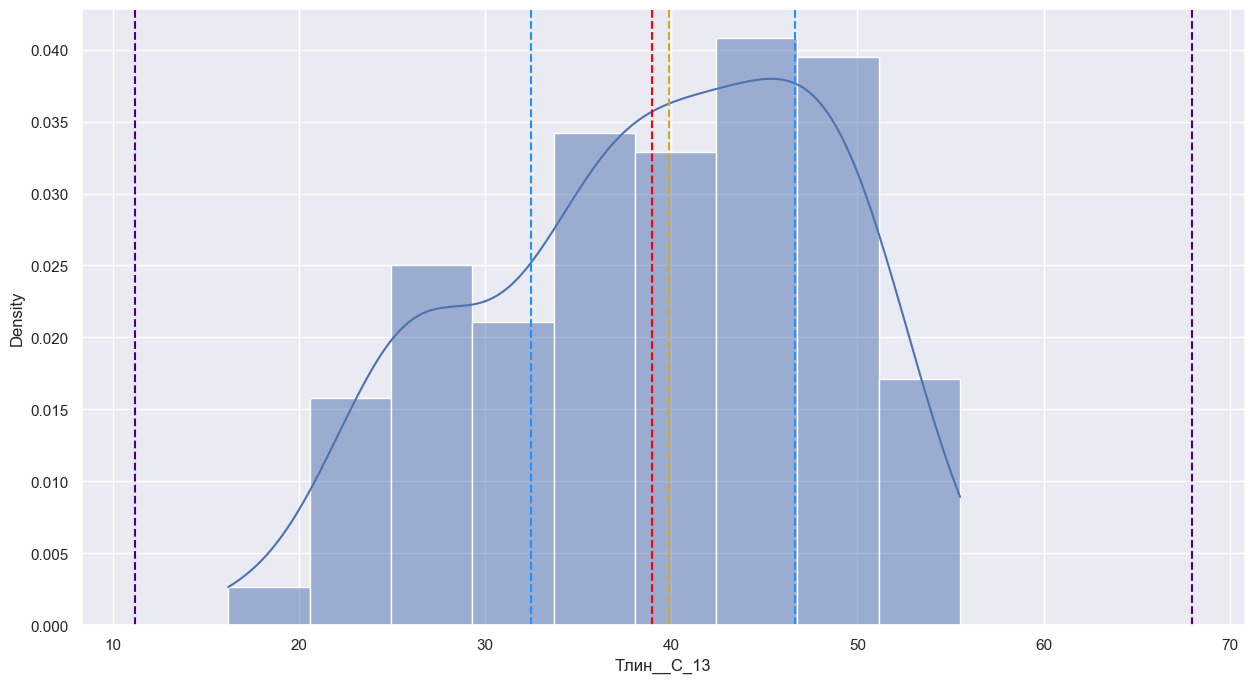

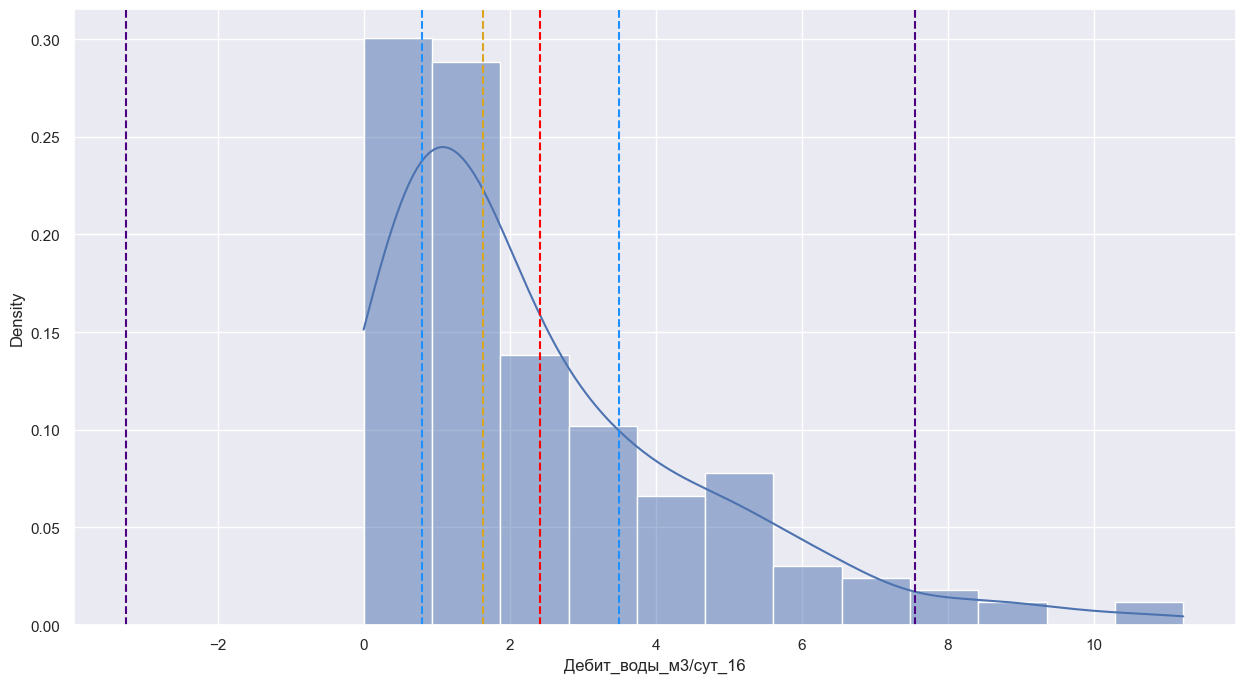

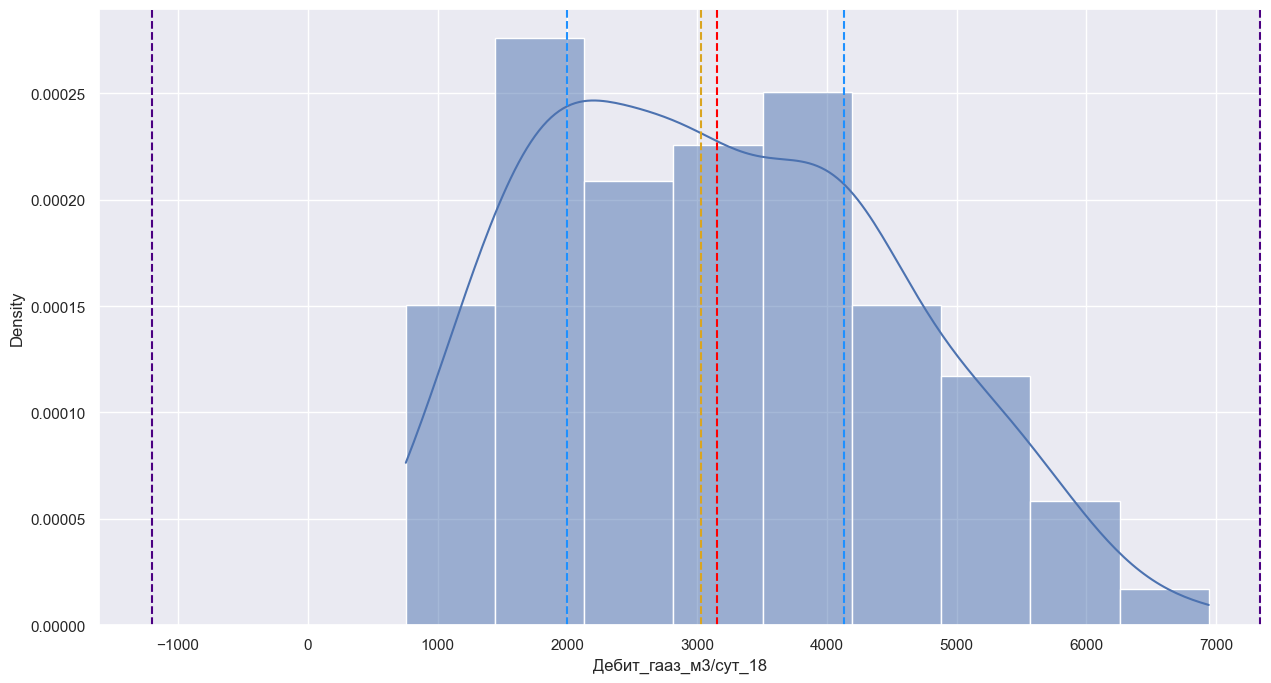

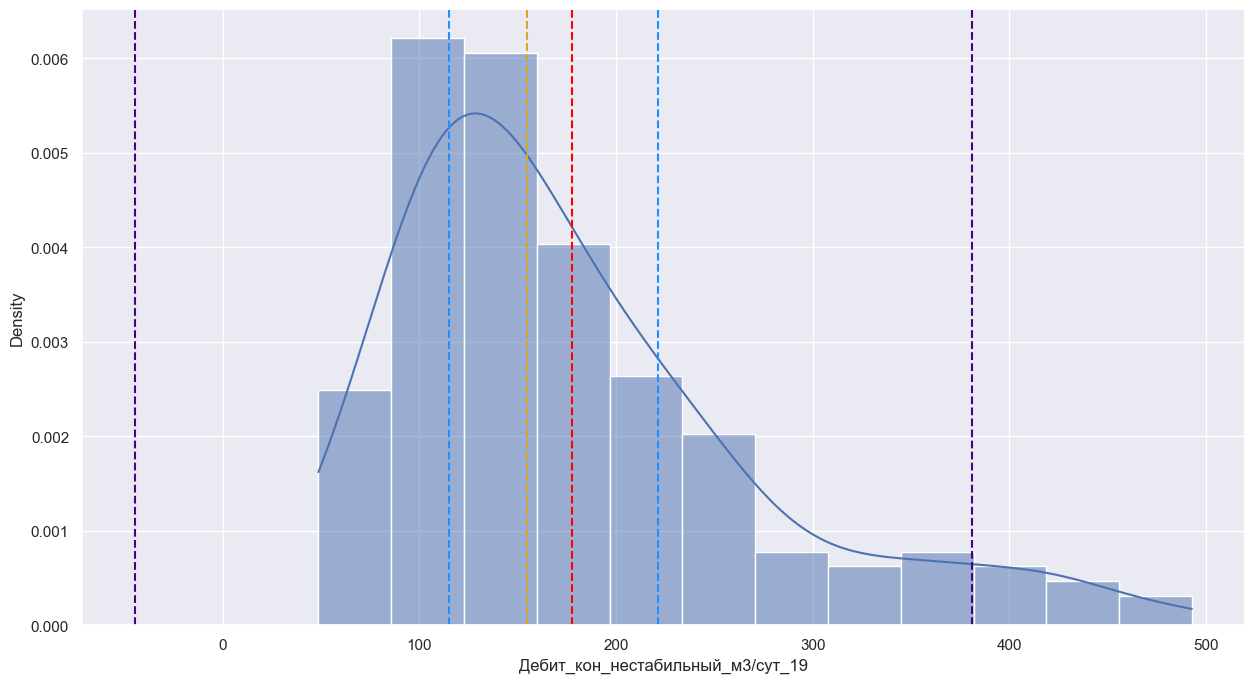

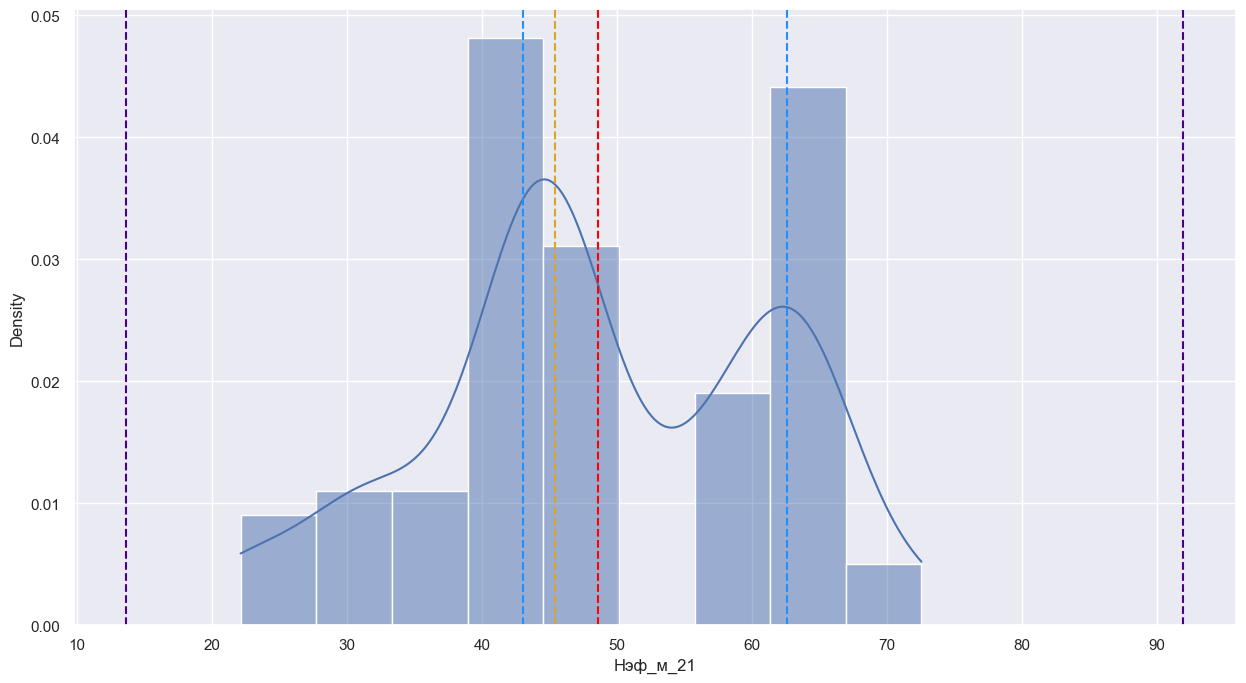

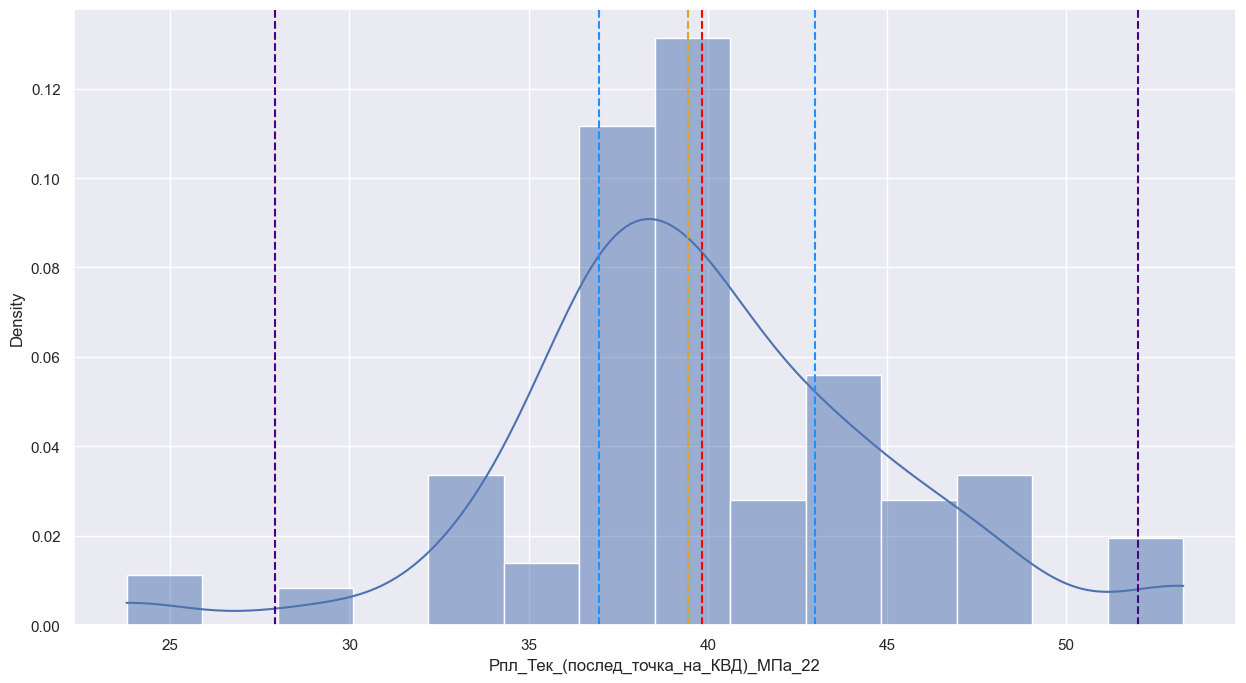

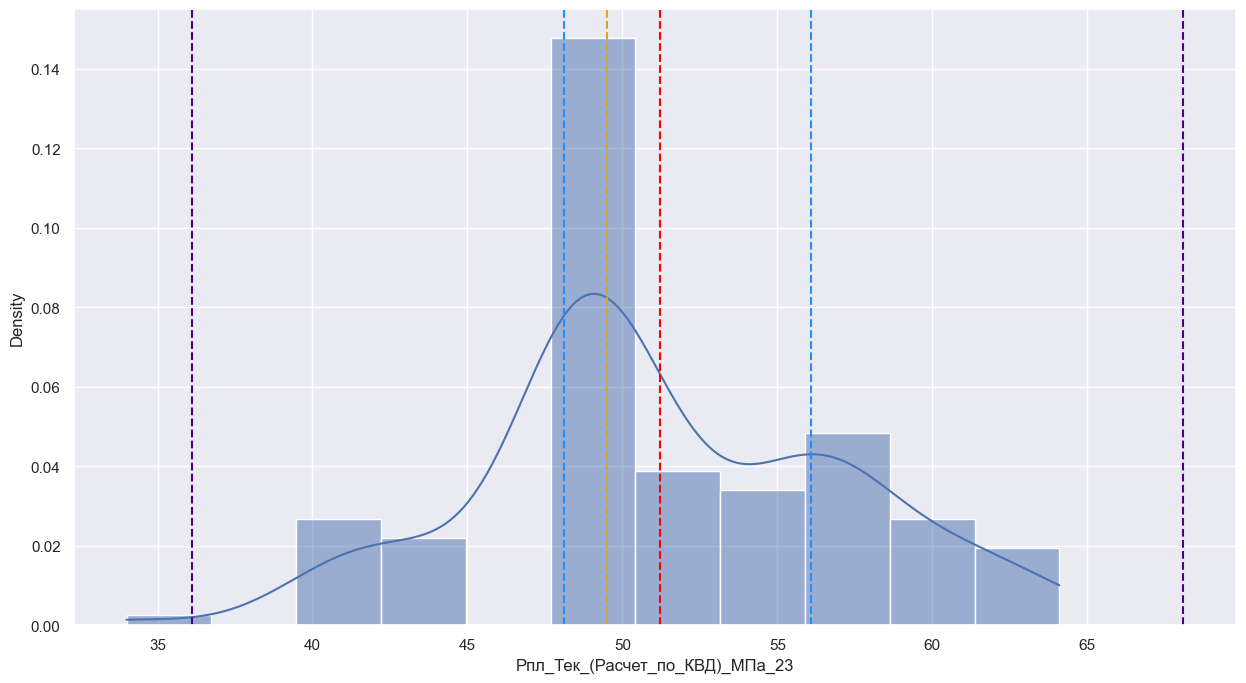

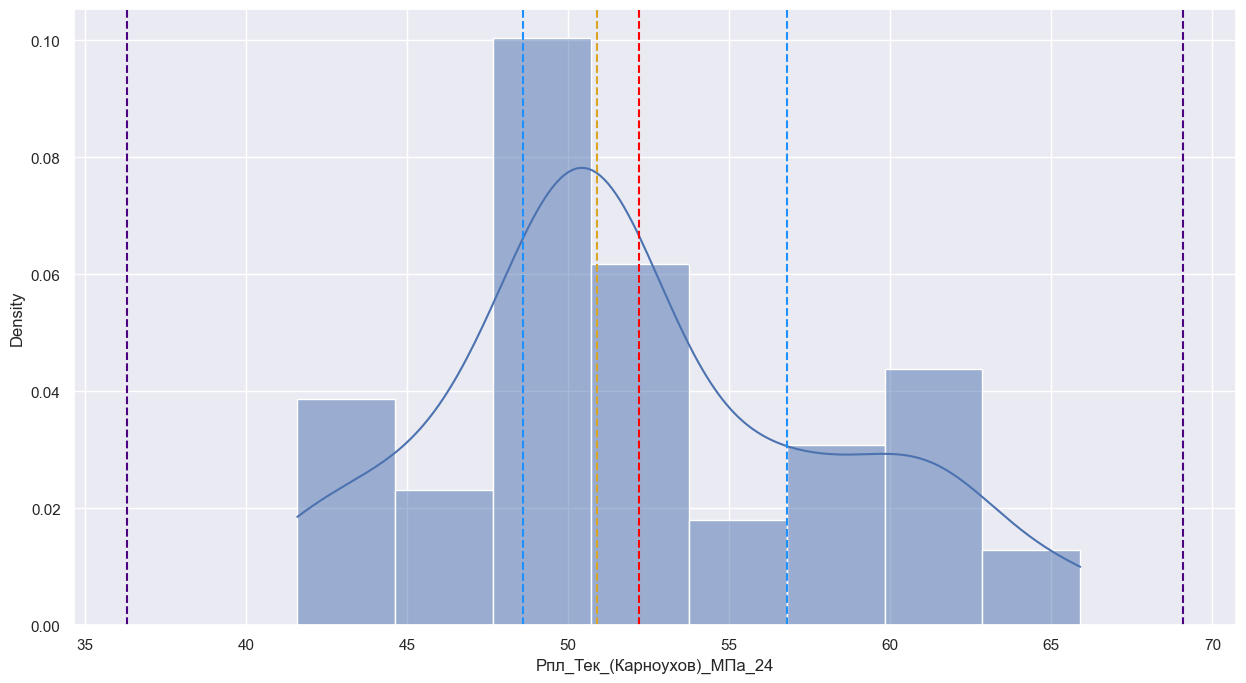

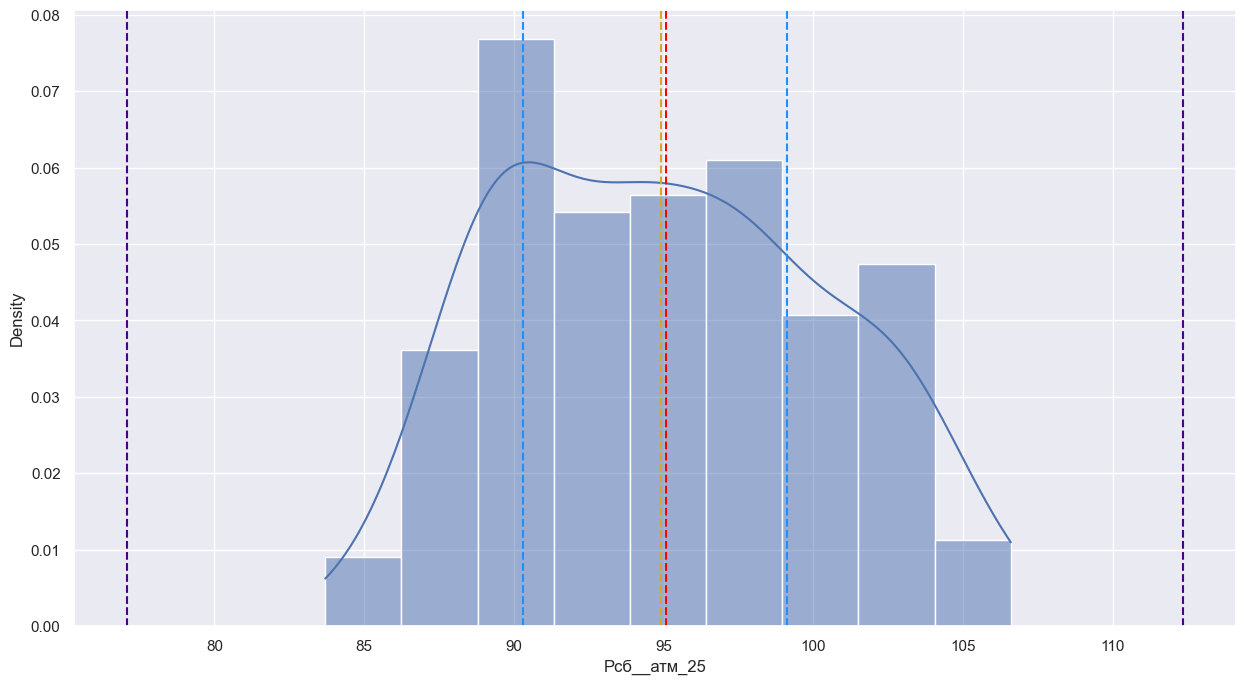

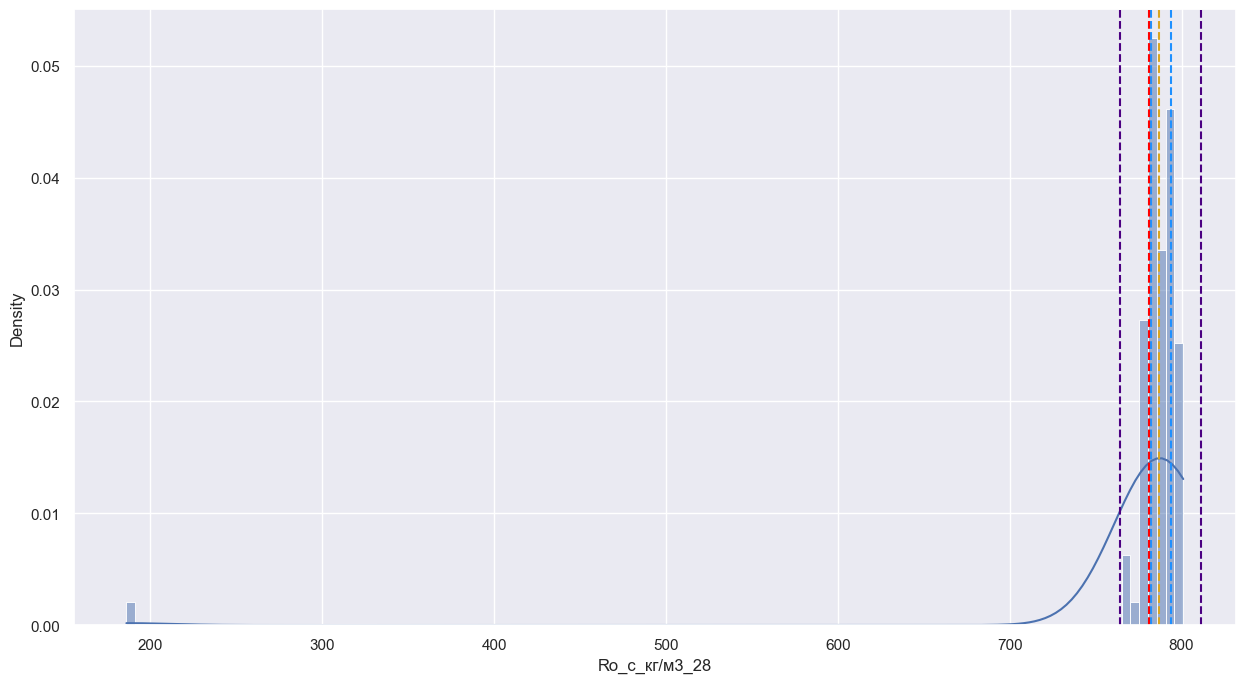

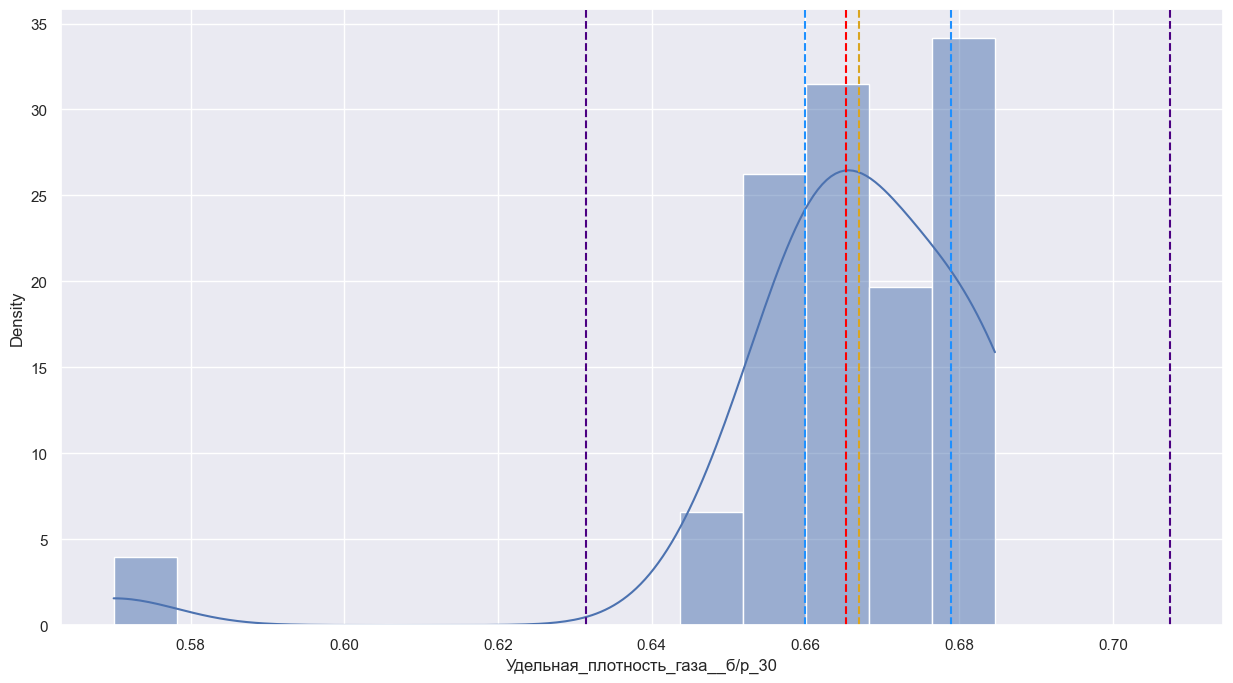

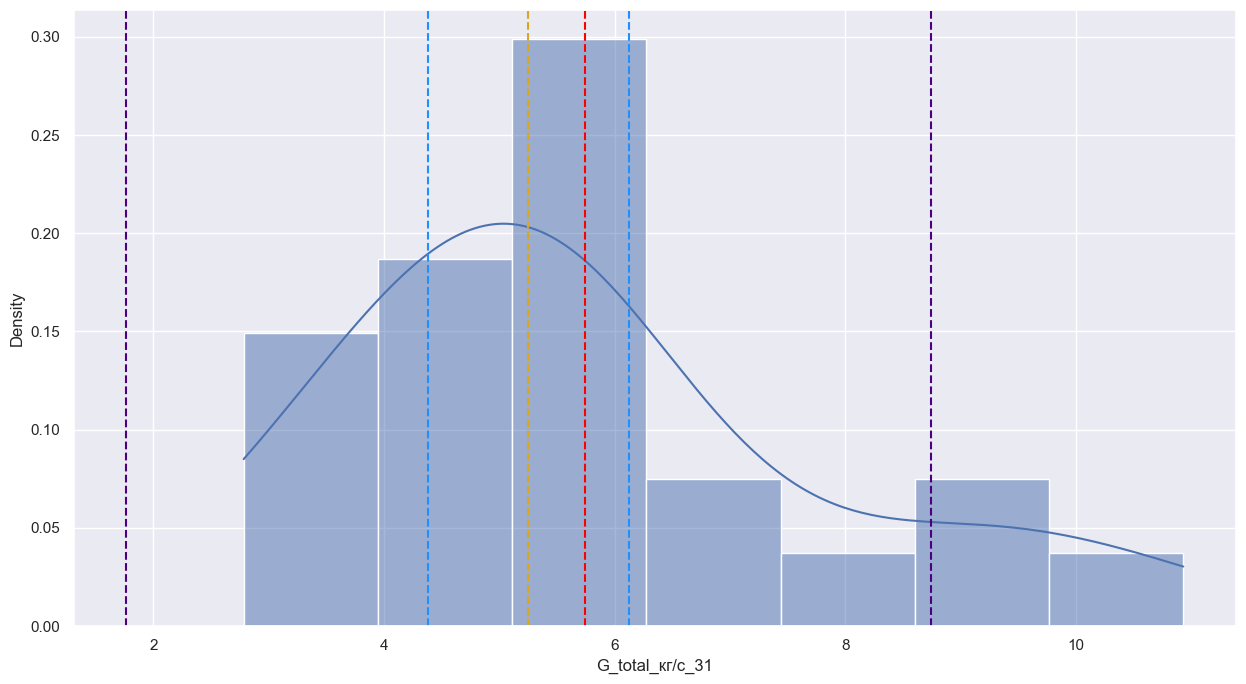

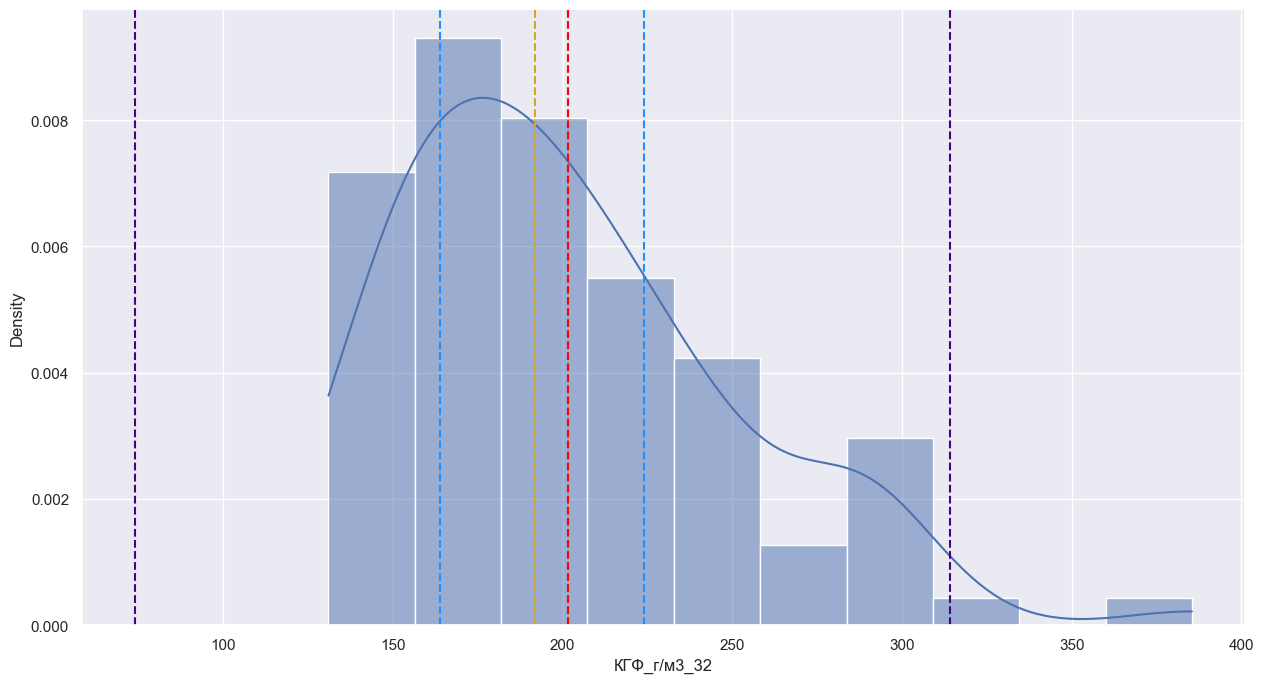

In [103]:
show_statistics(df_with_nans)

In [104]:
df_no_nans

Глубина_манометра_м_2  Dшт_мм_3  Рзаб_бара_5  Pлин_бара_6  Руст_бар_7  \
0                   3576.3      7.94        370.1   101.800000       249.0   
1                   3576.3      9.53        364.6   101.300000       231.0   
2                   3576.3     11.11        357.1   101.600000       211.0   
3                   3576.3     12.70        347.4    98.400000       187.0   
4                   3576.3     14.29        337.7    99.200000       169.0   
..                     ...       ...          ...          ...         ...   
163                 3284.0     12.70        307.8    98.600000       215.0   
164                 3284.0     14.29        293.6    98.500000       197.0   
165                 3288.6      7.94        309.1    92.600000       230.0   
166                 3288.6     11.11        293.9    93.100000       215.0   
167                 3289.8      9.53        271.0    95.945951       199.0   

     Рлин_бар_9  Туст__С_10  Тна_шлейфе__С_11  Тзаб__С_12  Tлин__С_13  ...  \
0       101.800        53.0              31.7      103.20   32.500000  ...   
1       102.400        58.8              37.6      103.00   38.600000  ...   
2       100.600        63.6              42.8      102.60   43.400000  ...   
3        99.000        64.7              46.2      102.00   46.100000  ...   
4        99.500        64.0              49.4      104.40   49.900000  ...   
..          ...         ...               ...         ...         ...  ...   
163      97.200        65.0              45.8      104.78   46.300000  ...   
164      98.400        66.9              49.8      104.63   50.500000  ...   
165      92.700        51.0               NaN      104.40   28.100000  ...   
166      93.300        60.0               NaN      104.60   41.300000  ...   
167      94.637        56.0               NaN      103.90   36.161547  ...   

     Дебит_воды_м3/сут_20  Нэф_м_21  Рпл_Тек_(послед_точка_на_КВД)_МПа_22  \
0                     0.4   56.8000                                 45.25   
1                     1.4   56.8000                                 45.25   
2                     1.9   56.8000                                 45.25   
3                     3.3   56.8000                                 45.25   
4                     4.7   56.8000                                 45.25   
..                    ...       ...                                   ...   
163                   4.8   44.5000                                 35.28   
164                   6.5   44.5000                                 35.28   
165                   0.4   48.3747                                 33.21   
166                   1.6   48.3747                                 33.21   
167                   1.1   48.4000                                   NaN   

     Рпл_Тек_(Расчет_по_КВД)_МПа_23  Рпл_Тек_(Карноухов)_МПа_24  Pсб__атм_25  \
0                              56.5                         NaN         93.6   
1                              56.5                         NaN         92.9   
2                              56.5                         NaN         91.4   
3                              56.5                         NaN         89.2   
4                              56.5                         NaN         89.7   
..                              ...                         ...          ...   
163                            40.5                        41.6         94.4   
164                            40.5                        41.6         94.0   
165                             NaN                         NaN         89.9   
166                             NaN                         NaN         90.8   
167                            39.9                         NaN         94.0   

     Ro_c_кг/м3_28  Удельная_плотность_газа__б/р_30  G_total_кг/с_31  \
0            801.0                         0.669449         2.782623   
1            801.0                         0.669449         3.697781   
2            801.0           

In [105]:
df_with_nans

Глубина_манометра_м_2  Dшт_мм_3  Рзаб_бара_5  Pлин_бара_6  Рлин_бар_9  \
0                   3576.3      7.94     370.1000   101.800000  101.800000   
1                   3576.3      9.53     364.6000   101.300000  102.400000   
2                   3576.3     11.11     357.1000   101.600000  100.600000   
3                   3576.3     12.70     347.4000    98.400000   99.000000   
4                   3576.3     14.29     337.7000    99.200000   99.500000   
..                     ...       ...          ...          ...         ...   
180                 3678.0     12.70     271.5860    93.255111   92.702141   
181                 3678.0     14.29     249.0760    96.472143  100.060417   
182                 3679.5      7.94     289.3877    91.131226   91.304642   
183                 3679.5      9.53     282.8709    91.173008   91.616821   
184                 3679.5     11.11     267.4787    91.530262   89.507935   

     Туст__С_10  Тна_шлейфе__С_11  Тзаб__С_12  Tлин__С_13  \
0          53.0              31.7     103.200   32.500000   
1          58.8              37.6     103.000   38.600000   
2          63.6              42.8     102.600   43.400000   
3          64.7              46.2     102.000   46.100000   
4          64.0              49.4     104.400   49.900000   
..          ...               ...         ...         ...   
180        55.6              41.8     104.910   41.832731   
181        56.7              47.6     104.500   47.715357   
182        47.0              24.4     104.903   24.841650   
183        48.9              26.7     104.882   31.580440   
184        53.5              33.3     104.689   37.478664   

     Дебит_воды_м3/сут_16  ...  Дебит_кон_нестабильный_м3/сут_19  Нэф_м_21  \
0                   0.400  ...                             131.3   56.8000   
1                   1.400  ...                             158.5   56.8000   
2                   1.900  ...                             172.3   56.8000   
3                   3.300  ...                             181.5   56.8000   
4                   4.600  ...                             190.6   56.8000   
..                    ...  ...                               ...       ...   
180                 1.500  ...                             128.3   46.7435   
181                 1.700  ...                             135.9   46.7435   
182                 1.118  ...                              92.4   46.7435   
183                 4.748  ...                             108.9   46.7435   
184                 6.278  ...                             122.7   46.7435   

     Рпл_Тек_(послед_точка_на_КВД)_МПа_22  Рпл_Тек_(Расчет_по_КВД)_МПа_23  \
0                                45.25000                            56.5   
1                                45.25000                            56.5   
2                                45.25000                            56.5   
3                                45.25000                            56.5   
4                                45.25000                            56.5   
..                                    ...                             ...   
180                              36.96000                            60.9   
181                              36.96000                            60.9   
182                              38.65317                            64.1   
183                              38.65317                            64.1   
184                              38.65317                            64.1   

     Рпл_Тек_(Карноухов)_МПа_24  Pсб__атм_25  Ro_c_кг/м3_28  \
0                           NaN         93.6          801.0   
1                           NaN         92.9          801.0   
2                           NaN         91.4          801.0   
3                           NaN         89.2          801.0   
4                           NaN         89.7          801.0   
..                          ...          ...            ...   
180                        60.8 